In [1]:
import sciann as sn 
import numpy as np 
import matplotlib.pyplot as plt 

---------------------- SCIANN 0.5.3.4 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



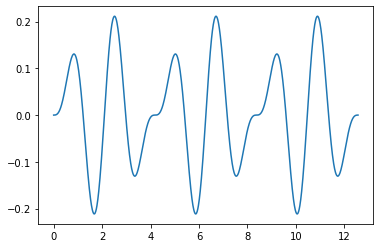

In [2]:
Omega = 3
OmegaBar = Omega*1.5
F0 = 1
A0 = F0/(Omega**2 - OmegaBar**2)
Beta = OmegaBar/Omega

_response = lambda t: A0*(np.sin(OmegaBar*t) - Beta*np.sin(Omega*t))

t_data = np.concatenate([np.linspace(0, 0., 1000), np.linspace(0, 4*np.pi, 1000)])
u_data = _response(t_data)

plt.plot(t_data, u_data)

In [3]:
sn.clear_session()
t = sn.Variable('t')
u = sn.Functional('u', t, 4*[20], 'tanh')
OmegaParam = sn.Parameter(np.random.rand(), inputs=t, name='OmegaParam' )
L1 = sn.diff(u, t, order=2) + OmegaParam**2*u - F0*sn.sin(OmegaBar*t)

In [4]:
model = sn.SciModel([t], [sn.Data(u), sn.PDE(L1)], optimizer='adam')

In [5]:
h = model.train(
    t_data, 
    [u_data, 'zeros'], 
    epochs=10000, 
    adaptive_weights=100, 
    batch_size=100,
    verbose=1,
    log_parameters=[OmegaParam]
)


Train on 2000 samples

+ adaptive_weights at epoch 0: [2.1235733, 1.0]
Epoch 1/10000
2000/2000 [==============================] - 0s 29us/sample - loss: 0.2755 - u_loss: 0.0107 - sub_loss: 0.2528
Epoch 2/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2634 - u_loss: 0.0067 - sub_loss: 0.2491
Epoch 3/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2620 - u_loss: 0.0067 - sub_loss: 0.2478
Epoch 4/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2609 - u_loss: 0.0068 - sub_loss: 0.2465
Epoch 5/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2584 - u_loss: 0.0068 - sub_loss: 0.2441
Epoch 6/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2553 - u_loss: 0.0077 - sub_loss: 0.2388
Epoch 7/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2503 - u_loss: 0.0070 - sub_loss: 0.2354
Epoch 8/10000
2000/2000 [=============================

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1932 - u_loss: 0.0064 - sub_loss: 0.1796
Epoch 66/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1911 - u_loss: 0.0062 - sub_loss: 0.1780
Epoch 67/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1903 - u_loss: 0.0062 - sub_loss: 0.1771
Epoch 68/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1903 - u_loss: 0.0062 - sub_loss: 0.1771
Epoch 69/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1896 - u_loss: 0.0064 - sub_loss: 0.1760
Epoch 70/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1900 - u_loss: 0.0064 - sub_loss: 0.1765
Epoch 71/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1884 - u_loss: 0.0062 - sub_loss: 0.1752
Epoch 72/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1882 - u_loss: 0.0064 - sub_loss: 0.1745
Epoch 7

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1761 - u_loss: 0.0067 - sub_loss: 0.1564
Epoch 129/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1747 - u_loss: 0.0067 - sub_loss: 0.1550
Epoch 130/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1757 - u_loss: 0.0065 - sub_loss: 0.1566
Epoch 131/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1775 - u_loss: 0.0072 - sub_loss: 0.1562
Epoch 132/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1745 - u_loss: 0.0063 - sub_loss: 0.1561
Epoch 133/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1742 - u_loss: 0.0063 - sub_loss: 0.1556
Epoch 134/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1744 - u_loss: 0.0064 - sub_loss: 0.1556
Epoch 135/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1748 - u_loss: 0.0064 - sub_loss: 0.1558


2000/2000 [==============================] - 0s 18us/sample - loss: 0.1711 - u_loss: 0.0064 - sub_loss: 0.1523
Epoch 193/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1710 - u_loss: 0.0063 - sub_loss: 0.1526
Epoch 194/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1715 - u_loss: 0.0065 - sub_loss: 0.1525
Epoch 195/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1732 - u_loss: 0.0065 - sub_loss: 0.1541
Epoch 196/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1711 - u_loss: 0.0064 - sub_loss: 0.1523
Epoch 197/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1711 - u_loss: 0.0063 - sub_loss: 0.1525
Epoch 198/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1710 - u_loss: 0.0066 - sub_loss: 0.1517
Epoch 199/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1710 - u_loss: 0.0067 - sub_loss: 0.1513


2000/2000 [==============================] - 0s 13us/sample - loss: 0.2092 - u_loss: 0.0058 - sub_loss: 0.1484
Epoch 256/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2079 - u_loss: 0.0058 - sub_loss: 0.1471
Epoch 257/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2080 - u_loss: 0.0059 - sub_loss: 0.1466
Epoch 258/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2077 - u_loss: 0.0058 - sub_loss: 0.1474
Epoch 259/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2099 - u_loss: 0.0059 - sub_loss: 0.1482
Epoch 260/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2082 - u_loss: 0.0058 - sub_loss: 0.1474
Epoch 261/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2082 - u_loss: 0.0058 - sub_loss: 0.1479
Epoch 262/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2090 - u_loss: 0.0059 - sub_loss: 0.1475


2000/2000 [==============================] - 0s 11us/sample - loss: 0.2121 - u_loss: 0.0056 - sub_loss: 0.1436
Epoch 319/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2104 - u_loss: 0.0054 - sub_loss: 0.1434
Epoch 320/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2120 - u_loss: 0.0056 - sub_loss: 0.1430
Epoch 321/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2113 - u_loss: 0.0056 - sub_loss: 0.1423
Epoch 322/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2103 - u_loss: 0.0055 - sub_loss: 0.1425
Epoch 323/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2117 - u_loss: 0.0057 - sub_loss: 0.1420
Epoch 324/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2093 - u_loss: 0.0055 - sub_loss: 0.1412
Epoch 325/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2077 - u_loss: 0.0055 - sub_loss: 0.1405


2000/2000 [==============================] - 0s 11us/sample - loss: 0.1917 - u_loss: 0.0049 - sub_loss: 0.1308
Epoch 383/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1928 - u_loss: 0.0050 - sub_loss: 0.1317
Epoch 384/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1926 - u_loss: 0.0050 - sub_loss: 0.1313
Epoch 385/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1933 - u_loss: 0.0050 - sub_loss: 0.1312
Epoch 386/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1937 - u_loss: 0.0050 - sub_loss: 0.1325
Epoch 387/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1911 - u_loss: 0.0049 - sub_loss: 0.1303
Epoch 388/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1896 - u_loss: 0.0049 - sub_loss: 0.1292
Epoch 389/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1913 - u_loss: 0.0050 - sub_loss: 0.1299


2000/2000 [==============================] - 0s 11us/sample - loss: 0.1858 - u_loss: 0.0045 - sub_loss: 0.1284
Epoch 446/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1857 - u_loss: 0.0045 - sub_loss: 0.1276
Epoch 447/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1866 - u_loss: 0.0045 - sub_loss: 0.1295
Epoch 448/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1912 - u_loss: 0.0046 - sub_loss: 0.1328
Epoch 449/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1876 - u_loss: 0.0045 - sub_loss: 0.1301
Epoch 450/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1861 - u_loss: 0.0046 - sub_loss: 0.1277
Epoch 451/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1847 - u_loss: 0.0045 - sub_loss: 0.1277
Epoch 452/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1860 - u_loss: 0.0045 - sub_loss: 0.1282


2000/2000 [==============================] - 0s 11us/sample - loss: 0.1982 - u_loss: 0.0040 - sub_loss: 0.1296
Epoch 509/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2025 - u_loss: 0.0040 - sub_loss: 0.1332
Epoch 510/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2073 - u_loss: 0.0041 - sub_loss: 0.1360
Epoch 511/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1987 - u_loss: 0.0040 - sub_loss: 0.1292
Epoch 512/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1955 - u_loss: 0.0039 - sub_loss: 0.1274
Epoch 513/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1954 - u_loss: 0.0039 - sub_loss: 0.1278
Epoch 514/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1957 - u_loss: 0.0039 - sub_loss: 0.1279
Epoch 515/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1936 - u_loss: 0.0039 - sub_loss: 0.1260


2000/2000 [==============================] - 0s 13us/sample - loss: 0.1756 - u_loss: 0.0034 - sub_loss: 0.1176
Epoch 573/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1741 - u_loss: 0.0033 - sub_loss: 0.1169
Epoch 574/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1745 - u_loss: 0.0033 - sub_loss: 0.1169
Epoch 575/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1729 - u_loss: 0.0033 - sub_loss: 0.1162
Epoch 576/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1725 - u_loss: 0.0033 - sub_loss: 0.1161
Epoch 577/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1722 - u_loss: 0.0033 - sub_loss: 0.1156
Epoch 578/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1713 - u_loss: 0.0033 - sub_loss: 0.1151
Epoch 579/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.1734 - u_loss: 0.0033 - sub_loss: 0.1169


2000/2000 [==============================] - 0s 15us/sample - loss: 0.1421 - u_loss: 0.0025 - sub_loss: 0.0996
Epoch 636/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1406 - u_loss: 0.0024 - sub_loss: 0.0986
Epoch 637/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1399 - u_loss: 0.0024 - sub_loss: 0.0979
Epoch 638/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1400 - u_loss: 0.0024 - sub_loss: 0.0986
Epoch 639/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.1395 - u_loss: 0.0024 - sub_loss: 0.0978
Epoch 640/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.1439 - u_loss: 0.0025 - sub_loss: 0.1015
Epoch 641/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.1445 - u_loss: 0.0025 - sub_loss: 0.1018
Epoch 642/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1395 - u_loss: 0.0024 - sub_loss: 0.0986


2000/2000 [==============================] - 0s 15us/sample - loss: 0.1254 - u_loss: 0.0021 - sub_loss: 0.0887
Epoch 700/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1208 - u_loss: 0.0026 - sub_loss: 0.0761
+ adaptive_weights at epoch 699: [19.152676, 1.0]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.1248 - u_loss: 0.0021 - sub_loss: 0.0885
Epoch 701/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1279 - u_loss: 0.0021 - sub_loss: 0.0877
Epoch 702/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1308 - u_loss: 0.0021 - sub_loss: 0.0905
Epoch 703/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1284 - u_loss: 0.0021 - sub_loss: 0.0880
Epoch 704/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1332 - u_loss: 0.0021 - sub_loss: 0.0923
Epoch 705/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1325 - u_loss:

2000/2000 [==============================] - 0s 16us/sample - loss: 0.1238 - u_loss: 0.0021 - sub_loss: 0.0833
Epoch 763/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1233 - u_loss: 0.0021 - sub_loss: 0.0832
Epoch 764/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1226 - u_loss: 0.0021 - sub_loss: 0.0821
Epoch 765/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1246 - u_loss: 0.0021 - sub_loss: 0.0842
Epoch 766/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1212 - u_loss: 0.0021 - sub_loss: 0.0811
Epoch 767/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1223 - u_loss: 0.0021 - sub_loss: 0.0817
Epoch 768/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1247 - u_loss: 0.0021 - sub_loss: 0.0836
Epoch 769/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1227 - u_loss: 0.0021 - sub_loss: 0.0822


2000/2000 [==============================] - 0s 12us/sample - loss: 0.1247 - u_loss: 0.0021 - sub_loss: 0.0798
Epoch 826/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1243 - u_loss: 0.0021 - sub_loss: 0.0789
Epoch 827/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1257 - u_loss: 0.0021 - sub_loss: 0.0803
Epoch 828/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1255 - u_loss: 0.0021 - sub_loss: 0.0802
Epoch 829/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1277 - u_loss: 0.0021 - sub_loss: 0.0819
Epoch 830/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1256 - u_loss: 0.0021 - sub_loss: 0.0801
Epoch 831/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1266 - u_loss: 0.0021 - sub_loss: 0.0812
Epoch 832/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1271 - u_loss: 0.0021 - sub_loss: 0.0813


2000/2000 [==============================] - 0s 12us/sample - loss: 0.1263 - u_loss: 0.0022 - sub_loss: 0.0803
Epoch 890/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1248 - u_loss: 0.0022 - sub_loss: 0.0790
Epoch 891/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1282 - u_loss: 0.0022 - sub_loss: 0.0821
Epoch 892/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1243 - u_loss: 0.0022 - sub_loss: 0.0785
Epoch 893/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1248 - u_loss: 0.0021 - sub_loss: 0.0792
Epoch 894/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1253 - u_loss: 0.0021 - sub_loss: 0.0798
Epoch 895/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1262 - u_loss: 0.0022 - sub_loss: 0.0799
Epoch 896/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1255 - u_loss: 0.0021 - sub_loss: 0.0800


2000/2000 [==============================] - 0s 14us/sample - loss: 0.1281 - u_loss: 0.0022 - sub_loss: 0.0775
Epoch 953/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1275 - u_loss: 0.0022 - sub_loss: 0.0768
Epoch 954/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1275 - u_loss: 0.0022 - sub_loss: 0.0773
Epoch 955/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1295 - u_loss: 0.0022 - sub_loss: 0.0783
Epoch 956/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1270 - u_loss: 0.0021 - sub_loss: 0.0771
Epoch 957/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1280 - u_loss: 0.0021 - sub_loss: 0.0782
Epoch 958/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1307 - u_loss: 0.0022 - sub_loss: 0.0791
Epoch 959/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1284 - u_loss: 0.0022 - sub_loss: 0.0780


2000/2000 [==============================] - 0s 15us/sample - loss: 0.1356 - u_loss: 0.0022 - sub_loss: 0.0787
Epoch 1016/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1325 - u_loss: 0.0022 - sub_loss: 0.0759
Epoch 1017/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1346 - u_loss: 0.0022 - sub_loss: 0.0775
Epoch 1018/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1340 - u_loss: 0.0022 - sub_loss: 0.0771
Epoch 1019/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1335 - u_loss: 0.0022 - sub_loss: 0.0771
Epoch 1020/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1321 - u_loss: 0.0022 - sub_loss: 0.0759
Epoch 1021/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1337 - u_loss: 0.0022 - sub_loss: 0.0773
Epoch 1022/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1326 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1320 - u_loss: 0.0022 - sub_loss: 0.0752
Epoch 1080/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1320 - u_loss: 0.0022 - sub_loss: 0.0751
Epoch 1081/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1325 - u_loss: 0.0022 - sub_loss: 0.0755
Epoch 1082/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1322 - u_loss: 0.0022 - sub_loss: 0.0750
Epoch 1083/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1322 - u_loss: 0.0022 - sub_loss: 0.0755
Epoch 1084/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1315 - u_loss: 0.0022 - sub_loss: 0.0746
Epoch 1085/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1330 - u_loss: 0.0022 - sub_loss: 0.0759
Epoch 1086/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1354 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1362 - u_loss: 0.0022 - sub_loss: 0.0780
Epoch 1142/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1334 - u_loss: 0.0022 - sub_loss: 0.0749
Epoch 1143/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1339 - u_loss: 0.0022 - sub_loss: 0.0746
Epoch 1144/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1337 - u_loss: 0.0022 - sub_loss: 0.0757
Epoch 1145/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1315 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1146/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1332 - u_loss: 0.0022 - sub_loss: 0.0739
Epoch 1147/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1377 - u_loss: 0.0022 - sub_loss: 0.0787
Epoch 1148/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1332 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1330 - u_loss: 0.0022 - sub_loss: 0.0750
Epoch 1204/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1324 - u_loss: 0.0022 - sub_loss: 0.0734
Epoch 1205/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1338 - u_loss: 0.0022 - sub_loss: 0.0747
Epoch 1206/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1334 - u_loss: 0.0023 - sub_loss: 0.0737
Epoch 1207/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1337 - u_loss: 0.0022 - sub_loss: 0.0745
Epoch 1208/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1329 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1209/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1317 - u_loss: 0.0022 - sub_loss: 0.0734
Epoch 1210/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1316 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1330 - u_loss: 0.0022 - sub_loss: 0.0737
Epoch 1268/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1331 - u_loss: 0.0023 - sub_loss: 0.0734
Epoch 1269/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1337 - u_loss: 0.0022 - sub_loss: 0.0748
Epoch 1270/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1322 - u_loss: 0.0022 - sub_loss: 0.0731
Epoch 1271/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1305 - u_loss: 0.0022 - sub_loss: 0.0720
Epoch 1272/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1318 - u_loss: 0.0022 - sub_loss: 0.0730
Epoch 1273/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1316 - u_loss: 0.0022 - sub_loss: 0.0725
Epoch 1274/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1336 - u_loss: 0.0023 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1390 - u_loss: 0.0022 - sub_loss: 0.0736
Epoch 1330/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1372 - u_loss: 0.0022 - sub_loss: 0.0723
Epoch 1331/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1374 - u_loss: 0.0022 - sub_loss: 0.0728
Epoch 1332/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1370 - u_loss: 0.0022 - sub_loss: 0.0718
Epoch 1333/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1389 - u_loss: 0.0023 - sub_loss: 0.0731
Epoch 1334/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1394 - u_loss: 0.0022 - sub_loss: 0.0743
Epoch 1335/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1374 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1336/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1375 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 10us/sample - loss: 0.1373 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1394/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1383 - u_loss: 0.0022 - sub_loss: 0.0736
Epoch 1395/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1379 - u_loss: 0.0022 - sub_loss: 0.0733
Epoch 1396/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1390 - u_loss: 0.0022 - sub_loss: 0.0741
Epoch 1397/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1391 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1398/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1374 - u_loss: 0.0022 - sub_loss: 0.0725
Epoch 1399/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.1369 - u_loss: 0.0022 - sub_loss: 0.0726
Epoch 1400/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1266 - u_loss: 0.0024 - sub_loss: 0.0576


2000/2000 [==============================] - 0s 11us/sample - loss: 0.1449 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1456/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1453 - u_loss: 0.0022 - sub_loss: 0.0736
Epoch 1457/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1442 - u_loss: 0.0022 - sub_loss: 0.0735
Epoch 1458/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1450 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1459/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1435 - u_loss: 0.0022 - sub_loss: 0.0725
Epoch 1460/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1461 - u_loss: 0.0022 - sub_loss: 0.0741
Epoch 1461/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1463 - u_loss: 0.0022 - sub_loss: 0.0751
Epoch 1462/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1455 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 10us/sample - loss: 0.1412 - u_loss: 0.0022 - sub_loss: 0.0728
Epoch 1518/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1409 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1519/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1412 - u_loss: 0.0022 - sub_loss: 0.0727
Epoch 1520/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1418 - u_loss: 0.0022 - sub_loss: 0.0728
Epoch 1521/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1439 - u_loss: 0.0023 - sub_loss: 0.0744
Epoch 1522/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1435 - u_loss: 0.0022 - sub_loss: 0.0746
Epoch 1523/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1421 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1524/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1418 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.1427 - u_loss: 0.0022 - sub_loss: 0.0739
Epoch 1582/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1445 - u_loss: 0.0022 - sub_loss: 0.0759
Epoch 1583/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1410 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1584/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1444 - u_loss: 0.0022 - sub_loss: 0.0761
Epoch 1585/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1431 - u_loss: 0.0022 - sub_loss: 0.0744
Epoch 1586/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1405 - u_loss: 0.0022 - sub_loss: 0.0723
Epoch 1587/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 0.1403 - u_loss: 0.0022 - sub_loss: 0.0722
Epoch 1588/10000
2000/2000 [==============================] - 0s 25us/sample - loss: 0.1418 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1390 - u_loss: 0.0022 - sub_loss: 0.0736
Epoch 1644/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1375 - u_loss: 0.0022 - sub_loss: 0.0725
Epoch 1645/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1379 - u_loss: 0.0022 - sub_loss: 0.0724
Epoch 1646/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1387 - u_loss: 0.0022 - sub_loss: 0.0729
Epoch 1647/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1399 - u_loss: 0.0023 - sub_loss: 0.0733
Epoch 1648/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1398 - u_loss: 0.0022 - sub_loss: 0.0742
Epoch 1649/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1375 - u_loss: 0.0022 - sub_loss: 0.0724
Epoch 1650/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1377 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1357 - u_loss: 0.0022 - sub_loss: 0.0725
Epoch 1706/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1349 - u_loss: 0.0022 - sub_loss: 0.0720
Epoch 1707/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1372 - u_loss: 0.0022 - sub_loss: 0.0738
Epoch 1708/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1366 - u_loss: 0.0022 - sub_loss: 0.0732
Epoch 1709/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1354 - u_loss: 0.0022 - sub_loss: 0.0722
Epoch 1710/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1358 - u_loss: 0.0022 - sub_loss: 0.0726
Epoch 1711/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1347 - u_loss: 0.0022 - sub_loss: 0.0720
Epoch 1712/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1355 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 17us/sample - loss: 0.1362 - u_loss: 0.0022 - sub_loss: 0.0731
Epoch 1770/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1354 - u_loss: 0.0022 - sub_loss: 0.0723
Epoch 1771/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1367 - u_loss: 0.0022 - sub_loss: 0.0733
Epoch 1772/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1367 - u_loss: 0.0023 - sub_loss: 0.0724
Epoch 1773/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1354 - u_loss: 0.0022 - sub_loss: 0.0723
Epoch 1774/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1355 - u_loss: 0.0022 - sub_loss: 0.0727
Epoch 1775/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1356 - u_loss: 0.0022 - sub_loss: 0.0726
Epoch 1776/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1361 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1400 - u_loss: 0.0022 - sub_loss: 0.0718
Epoch 1831/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1393 - u_loss: 0.0022 - sub_loss: 0.0714
Epoch 1832/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1391 - u_loss: 0.0022 - sub_loss: 0.0714
Epoch 1833/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1398 - u_loss: 0.0022 - sub_loss: 0.0717
Epoch 1834/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1395 - u_loss: 0.0022 - sub_loss: 0.0710
Epoch 1835/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1394 - u_loss: 0.0022 - sub_loss: 0.0714
Epoch 1836/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1399 - u_loss: 0.0022 - sub_loss: 0.0716
Epoch 1837/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1384 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.1396 - u_loss: 0.0022 - sub_loss: 0.0714
Epoch 1895/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1400 - u_loss: 0.0022 - sub_loss: 0.0718
Epoch 1896/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1392 - u_loss: 0.0022 - sub_loss: 0.0712
Epoch 1897/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1395 - u_loss: 0.0022 - sub_loss: 0.0715
Epoch 1898/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1389 - u_loss: 0.0022 - sub_loss: 0.0708
Epoch 1899/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1400 - u_loss: 0.0022 - sub_loss: 0.0721
Epoch 1900/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1186 - u_loss: 0.0021 - sub_loss: 0.0537
+ adaptive_weights at epoch 1899: [28.65362, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 0.1388 - u

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1340 - u_loss: 0.0022 - sub_loss: 0.0704
Epoch 1957/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1344 - u_loss: 0.0022 - sub_loss: 0.0710
Epoch 1958/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1339 - u_loss: 0.0022 - sub_loss: 0.0707
Epoch 1959/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1349 - u_loss: 0.0022 - sub_loss: 0.0719
Epoch 1960/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1350 - u_loss: 0.0022 - sub_loss: 0.0718
Epoch 1961/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1342 - u_loss: 0.0022 - sub_loss: 0.0707
Epoch 1962/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1343 - u_loss: 0.0022 - sub_loss: 0.0709
Epoch 1963/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1332 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1295 - u_loss: 0.0022 - sub_loss: 0.0703
Epoch 2019/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1298 - u_loss: 0.0022 - sub_loss: 0.0706
Epoch 2020/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1289 - u_loss: 0.0022 - sub_loss: 0.0698
Epoch 2021/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1290 - u_loss: 0.0022 - sub_loss: 0.0700
Epoch 2022/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1291 - u_loss: 0.0022 - sub_loss: 0.0699
Epoch 2023/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1295 - u_loss: 0.0022 - sub_loss: 0.0703
Epoch 2024/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1301 - u_loss: 0.0022 - sub_loss: 0.0710
Epoch 2025/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1311 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.1294 - u_loss: 0.0022 - sub_loss: 0.0700
Epoch 2083/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1286 - u_loss: 0.0022 - sub_loss: 0.0695
Epoch 2084/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1286 - u_loss: 0.0022 - sub_loss: 0.0693
Epoch 2085/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1284 - u_loss: 0.0022 - sub_loss: 0.0693
Epoch 2086/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1295 - u_loss: 0.0022 - sub_loss: 0.0706
Epoch 2087/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1291 - u_loss: 0.0022 - sub_loss: 0.0695
Epoch 2088/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1288 - u_loss: 0.0022 - sub_loss: 0.0698
Epoch 2089/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1291 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1260 - u_loss: 0.0022 - sub_loss: 0.0696
Epoch 2145/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1258 - u_loss: 0.0022 - sub_loss: 0.0695
Epoch 2146/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1261 - u_loss: 0.0022 - sub_loss: 0.0695
Epoch 2147/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1262 - u_loss: 0.0022 - sub_loss: 0.0701
Epoch 2148/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1265 - u_loss: 0.0022 - sub_loss: 0.0699
Epoch 2149/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1258 - u_loss: 0.0022 - sub_loss: 0.0691
Epoch 2150/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1283 - u_loss: 0.0022 - sub_loss: 0.0719
Epoch 2151/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1265 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1238 - u_loss: 0.0022 - sub_loss: 0.0696
Epoch 2207/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1234 - u_loss: 0.0022 - sub_loss: 0.0697
Epoch 2208/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1242 - u_loss: 0.0022 - sub_loss: 0.0703
Epoch 2209/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1236 - u_loss: 0.0022 - sub_loss: 0.0695
Epoch 2210/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1233 - u_loss: 0.0022 - sub_loss: 0.0692
Epoch 2211/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1231 - u_loss: 0.0022 - sub_loss: 0.0688
Epoch 2212/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1229 - u_loss: 0.0022 - sub_loss: 0.0692
Epoch 2213/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1228 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1229 - u_loss: 0.0022 - sub_loss: 0.0692
Epoch 2271/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1230 - u_loss: 0.0022 - sub_loss: 0.0691
Epoch 2272/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1222 - u_loss: 0.0022 - sub_loss: 0.0686
Epoch 2273/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1221 - u_loss: 0.0022 - sub_loss: 0.0686
Epoch 2274/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1231 - u_loss: 0.0022 - sub_loss: 0.0693
Epoch 2275/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1226 - u_loss: 0.0022 - sub_loss: 0.0687
Epoch 2276/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1224 - u_loss: 0.0022 - sub_loss: 0.0685
Epoch 2277/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1223 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1232 - u_loss: 0.0022 - sub_loss: 0.0693
Epoch 2333/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1228 - u_loss: 0.0022 - sub_loss: 0.0691
Epoch 2334/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1230 - u_loss: 0.0022 - sub_loss: 0.0692
Epoch 2335/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1230 - u_loss: 0.0022 - sub_loss: 0.0694
Epoch 2336/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1221 - u_loss: 0.0022 - sub_loss: 0.0687
Epoch 2337/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1214 - u_loss: 0.0022 - sub_loss: 0.0682
Epoch 2338/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1218 - u_loss: 0.0022 - sub_loss: 0.0685
Epoch 2339/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1212 - u_loss: 0.0022 - sub_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 0.1158 - u_loss: 0.0020 - sub_loss: 0.0657
Epoch 2397/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1147 - u_loss: 0.0020 - sub_loss: 0.0655
Epoch 2398/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1157 - u_loss: 0.0020 - sub_loss: 0.0663
Epoch 2399/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1159 - u_loss: 0.0020 - sub_loss: 0.0664
Epoch 2400/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1022 - u_loss: 0.0017 - sub_loss: 0.0596
+ adaptive_weights at epoch 2399: [23.057053, 1.0]
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1147 - u_loss: 0.0020 - sub_loss: 0.0658
Epoch 2401/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1102 - u_loss: 0.0020 - sub_loss: 0.0649
Epoch 2402/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.1103 - 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0792 - u_loss: 0.0012 - sub_loss: 0.0518
Epoch 2459/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0791 - u_loss: 0.0012 - sub_loss: 0.0515
Epoch 2460/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0771 - u_loss: 0.0012 - sub_loss: 0.0502
Epoch 2461/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0773 - u_loss: 0.0011 - sub_loss: 0.0511
Epoch 2462/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0787 - u_loss: 0.0012 - sub_loss: 0.0519
Epoch 2463/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0762 - u_loss: 0.0011 - sub_loss: 0.0499
Epoch 2464/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0753 - u_loss: 0.0011 - sub_loss: 0.0498
Epoch 2465/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0760 - u_loss: 0.0011 - sub_loss: 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0670 - u_loss: 7.8650e-04 - sub_loss: 0.0473
Epoch 2520/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0670 - u_loss: 7.9539e-04 - sub_loss: 0.0471
Epoch 2521/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0655 - u_loss: 8.0782e-04 - sub_loss: 0.0453
Epoch 2522/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0637 - u_loss: 7.7666e-04 - sub_loss: 0.0443
Epoch 2523/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0638 - u_loss: 7.6892e-04 - sub_loss: 0.0446
Epoch 2524/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0645 - u_loss: 7.7909e-04 - sub_loss: 0.0450
Epoch 2525/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0634 - u_loss: 7.8130e-04 - sub_loss: 0.0439
Epoch 2526/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0634 -

2000/2000 [==============================] - 0s 18us/sample - loss: 0.0495 - u_loss: 6.4287e-04 - sub_loss: 0.0335
Epoch 2582/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 0.0513 - u_loss: 6.5133e-04 - sub_loss: 0.0350
Epoch 2583/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0491 - u_loss: 6.3281e-04 - sub_loss: 0.0333
Epoch 2584/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0476 - u_loss: 6.2460e-04 - sub_loss: 0.0320
Epoch 2585/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0503 - u_loss: 6.3923e-04 - sub_loss: 0.0343
Epoch 2586/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0493 - u_loss: 6.4726e-04 - sub_loss: 0.0331
Epoch 2587/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0501 - u_loss: 6.3542e-04 - sub_loss: 0.0342
Epoch 2588/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0497 -

Epoch 2642/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0436 - u_loss: 6.1177e-04 - sub_loss: 0.0271
Epoch 2643/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0447 - u_loss: 6.2984e-04 - sub_loss: 0.0276
Epoch 2644/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0440 - u_loss: 6.0051e-04 - sub_loss: 0.0277
Epoch 2645/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0447 - u_loss: 6.1320e-04 - sub_loss: 0.0281
Epoch 2646/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0421 - u_loss: 6.0261e-04 - sub_loss: 0.0259
Epoch 2647/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0422 - u_loss: 5.8733e-04 - sub_loss: 0.0263
Epoch 2648/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0421 - u_loss: 6.0414e-04 - sub_loss: 0.0258
Epoch 2649/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0406 - u_loss: 6.3730e-04 - sub_loss: 0.0248
Epoch 2703/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0414 - u_loss: 6.4446e-04 - sub_loss: 0.0254
Epoch 2704/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0436 - u_loss: 6.5886e-04 - sub_loss: 0.0272
Epoch 2705/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0401 - u_loss: 6.1326e-04 - sub_loss: 0.0248
Epoch 2706/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0389 - u_loss: 6.4476e-04 - sub_loss: 0.0229
Epoch 2707/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0403 - u_loss: 6.1647e-04 - sub_loss: 0.0250
Epoch 2708/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0428 - u_loss: 6.5447e-04 - sub_loss: 0.0265
Epoch 2709/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0403 -

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0379 - u_loss: 6.1424e-04 - sub_loss: 0.0226
Epoch 2765/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0374 - u_loss: 6.2348e-04 - sub_loss: 0.0219
Epoch 2766/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0379 - u_loss: 6.2077e-04 - sub_loss: 0.0225
Epoch 2767/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0381 - u_loss: 6.4807e-04 - sub_loss: 0.0220
Epoch 2768/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0372 - u_loss: 6.0825e-04 - sub_loss: 0.0221
Epoch 2769/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0373 - u_loss: 6.2489e-04 - sub_loss: 0.0218
Epoch 2770/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0372 - u_loss: 6.3388e-04 - sub_loss: 0.0214
Epoch 2771/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0390 -

Epoch 2825/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0403 - u_loss: 5.9640e-04 - sub_loss: 0.0226
Epoch 2826/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0391 - u_loss: 5.9354e-04 - sub_loss: 0.0215
Epoch 2827/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0392 - u_loss: 6.2486e-04 - sub_loss: 0.0207
Epoch 2828/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0425 - u_loss: 6.3592e-04 - sub_loss: 0.0237
Epoch 2829/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0426 - u_loss: 6.4205e-04 - sub_loss: 0.0236
Epoch 2830/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0393 - u_loss: 5.9564e-04 - sub_loss: 0.0216
Epoch 2831/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0392 - u_loss: 6.0578e-04 - sub_loss: 0.0212
Epoch 2832/10000
2000/2000 [==============================] - 0s 13us/sample

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0430 - u_loss: 6.4715e-04 - sub_loss: 0.0238
Epoch 2888/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0409 - u_loss: 6.2526e-04 - sub_loss: 0.0223
Epoch 2889/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0378 - u_loss: 5.8085e-04 - sub_loss: 0.0206
Epoch 2890/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0396 - u_loss: 6.2700e-04 - sub_loss: 0.0210
Epoch 2891/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0391 - u_loss: 6.1550e-04 - sub_loss: 0.0209
Epoch 2892/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0380 - u_loss: 6.0189e-04 - sub_loss: 0.0202
Epoch 2893/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0377 - u_loss: 5.9797e-04 - sub_loss: 0.0199
Epoch 2894/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0390 -

Epoch 2948/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0388 - u_loss: 6.4302e-04 - sub_loss: 0.0213
Epoch 2949/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0373 - u_loss: 6.0382e-04 - sub_loss: 0.0209
Epoch 2950/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0367 - u_loss: 6.1822e-04 - sub_loss: 0.0199
Epoch 2951/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0372 - u_loss: 6.2607e-04 - sub_loss: 0.0201
Epoch 2952/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0359 - u_loss: 6.0411e-04 - sub_loss: 0.0195
Epoch 2953/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0371 - u_loss: 6.1408e-04 - sub_loss: 0.0204
Epoch 2954/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0386 - u_loss: 6.2225e-04 - sub_loss: 0.0217
Epoch 2955/10000
2000/2000 [==============================] - 0s 13us/sample

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0364 - u_loss: 5.9969e-04 - sub_loss: 0.0200
Epoch 3009/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0359 - u_loss: 6.1336e-04 - sub_loss: 0.0191
Epoch 3010/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0372 - u_loss: 6.1196e-04 - sub_loss: 0.0204
Epoch 3011/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0384 - u_loss: 6.2224e-04 - sub_loss: 0.0213
Epoch 3012/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0371 - u_loss: 5.9762e-04 - sub_loss: 0.0207
Epoch 3013/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0351 - u_loss: 5.9280e-04 - sub_loss: 0.0188
Epoch 3014/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0367 - u_loss: 6.2078e-04 - sub_loss: 0.0197
Epoch 3015/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0368 -

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0382 - u_loss: 5.9898e-04 - sub_loss: 0.0218
Epoch 3071/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0366 - u_loss: 6.0358e-04 - sub_loss: 0.0200
Epoch 3072/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0357 - u_loss: 5.9870e-04 - sub_loss: 0.0193
Epoch 3073/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0367 - u_loss: 6.0304e-04 - sub_loss: 0.0202
Epoch 3074/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0360 - u_loss: 6.1208e-04 - sub_loss: 0.0192
Epoch 3075/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0363 - u_loss: 6.0900e-04 - sub_loss: 0.0196
Epoch 3076/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0365 - u_loss: 6.0605e-04 - sub_loss: 0.0199
Epoch 3077/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0370 -

Epoch 3131/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0359 - u_loss: 5.8421e-04 - sub_loss: 0.0202
Epoch 3132/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0389 - u_loss: 6.2608e-04 - sub_loss: 0.0221
Epoch 3133/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0348 - u_loss: 6.0421e-04 - sub_loss: 0.0186
Epoch 3134/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0357 - u_loss: 6.0896e-04 - sub_loss: 0.0194
Epoch 3135/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0363 - u_loss: 6.2000e-04 - sub_loss: 0.0197
Epoch 3136/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0351 - u_loss: 5.9168e-04 - sub_loss: 0.0193
Epoch 3137/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0365 - u_loss: 6.0251e-04 - sub_loss: 0.0204
Epoch 3138/10000
2000/2000 [==============================] - 0s 14us/sample

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0361 - u_loss: 5.8352e-04 - sub_loss: 0.0204
Epoch 3194/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0345 - u_loss: 5.9619e-04 - sub_loss: 0.0185
Epoch 3195/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0351 - u_loss: 5.8958e-04 - sub_loss: 0.0193
Epoch 3196/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0354 - u_loss: 5.7597e-04 - sub_loss: 0.0200
Epoch 3197/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0373 - u_loss: 6.0846e-04 - sub_loss: 0.0210
Epoch 3198/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0363 - u_loss: 6.1790e-04 - sub_loss: 0.0197
Epoch 3199/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0336 - u_loss: 5.7496e-04 - sub_loss: 0.0182
Epoch 3200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0490 - u_loss

Epoch 3254/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0356 - u_loss: 5.6366e-04 - sub_loss: 0.0189
Epoch 3255/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0354 - u_loss: 5.6024e-04 - sub_loss: 0.0188
Epoch 3256/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0367 - u_loss: 5.7678e-04 - sub_loss: 0.0196
Epoch 3257/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0355 - u_loss: 5.7341e-04 - sub_loss: 0.0185
Epoch 3258/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0370 - u_loss: 5.7188e-04 - sub_loss: 0.0200
Epoch 3259/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0394 - u_loss: 6.2441e-04 - sub_loss: 0.0209
Epoch 3260/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0410 - u_loss: 6.0732e-04 - sub_loss: 0.0230
Epoch 3261/10000
2000/2000 [==============================] - 0s 13us/sample

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0385 - u_loss: 5.3103e-04 - sub_loss: 0.0191
Epoch 3315/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0404 - u_loss: 5.4101e-04 - sub_loss: 0.0206
Epoch 3316/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0410 - u_loss: 5.4232e-04 - sub_loss: 0.0212
Epoch 3317/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0402 - u_loss: 5.5658e-04 - sub_loss: 0.0199
Epoch 3318/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0406 - u_loss: 5.4498e-04 - sub_loss: 0.0207
Epoch 3319/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0401 - u_loss: 5.5374e-04 - sub_loss: 0.0199
Epoch 3320/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0389 - u_loss: 5.3678e-04 - sub_loss: 0.0193
Epoch 3321/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0402 -

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0375 - u_loss: 5.0953e-04 - sub_loss: 0.0190
Epoch 3377/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0380 - u_loss: 5.3311e-04 - sub_loss: 0.0186
Epoch 3378/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0385 - u_loss: 5.1372e-04 - sub_loss: 0.0198
Epoch 3379/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0389 - u_loss: 5.3680e-04 - sub_loss: 0.0193
Epoch 3380/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0396 - u_loss: 5.3235e-04 - sub_loss: 0.0202
Epoch 3381/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0398 - u_loss: 5.4125e-04 - sub_loss: 0.0200
Epoch 3382/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0378 - u_loss: 5.2785e-04 - sub_loss: 0.0185
Epoch 3383/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0410 -

Epoch 3437/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0366 - u_loss: 5.1979e-04 - sub_loss: 0.0193
Epoch 3438/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0354 - u_loss: 5.1264e-04 - sub_loss: 0.0184
Epoch 3439/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0361 - u_loss: 5.1513e-04 - sub_loss: 0.0191
Epoch 3440/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0372 - u_loss: 5.5474e-04 - sub_loss: 0.0188
Epoch 3441/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0369 - u_loss: 5.3664e-04 - sub_loss: 0.0191
Epoch 3442/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0360 - u_loss: 5.1397e-04 - sub_loss: 0.0190
Epoch 3443/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0359 - u_loss: 5.3500e-04 - sub_loss: 0.0182
Epoch 3444/10000
2000/2000 [==============================] - 0s 12us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0345 - u_loss: 5.0157e-04 - sub_loss: 0.0179
Epoch 3500/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0221 - u_loss: 2.9563e-04 - sub_loss: 0.0123
+ adaptive_weights at epoch 3499: [35.203026, 1.0]
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0352 - u_loss: 5.0655e-04 - sub_loss: 0.0184
Epoch 3501/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0359 - u_loss: 5.1012e-04 - sub_loss: 0.0180
Epoch 3502/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0363 - u_loss: 5.0003e-04 - sub_loss: 0.0187
Epoch 3503/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0372 - u_loss: 5.0860e-04 - sub_loss: 0.0193
Epoch 3504/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0365 - u_loss: 4.8862e-04 - sub_loss: 0.0193
Epoch 3505/10000
2000/2000 [==============================] - 0s 1

Epoch 3560/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0347 - u_loss: 4.8543e-04 - sub_loss: 0.0177
Epoch 3561/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0347 - u_loss: 4.9577e-04 - sub_loss: 0.0173
Epoch 3562/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0360 - u_loss: 4.9136e-04 - sub_loss: 0.0187
Epoch 3563/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0379 - u_loss: 5.1614e-04 - sub_loss: 0.0197
Epoch 3564/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0348 - u_loss: 4.8648e-04 - sub_loss: 0.0177
Epoch 3565/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0355 - u_loss: 4.9349e-04 - sub_loss: 0.0181
Epoch 3566/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0350 - u_loss: 4.9304e-04 - sub_loss: 0.0177
Epoch 3567/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0329 - u_loss: 4.8777e-04 - sub_loss: 0.0173
Epoch 3621/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0325 - u_loss: 4.8619e-04 - sub_loss: 0.0170
Epoch 3622/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0332 - u_loss: 5.0413e-04 - sub_loss: 0.0171
Epoch 3623/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0349 - u_loss: 5.1609e-04 - sub_loss: 0.0184
Epoch 3624/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0324 - u_loss: 4.7961e-04 - sub_loss: 0.0171
Epoch 3625/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0328 - u_loss: 4.8281e-04 - sub_loss: 0.0174
Epoch 3626/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0327 - u_loss: 4.8773e-04 - sub_loss: 0.0171
Epoch 3627/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0331 -

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0321 - u_loss: 4.7823e-04 - sub_loss: 0.0168
Epoch 3683/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0312 - u_loss: 4.6242e-04 - sub_loss: 0.0165
Epoch 3684/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0309 - u_loss: 4.6948e-04 - sub_loss: 0.0159
Epoch 3685/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0313 - u_loss: 4.8106e-04 - sub_loss: 0.0160
Epoch 3686/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0323 - u_loss: 4.8163e-04 - sub_loss: 0.0168
Epoch 3687/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0319 - u_loss: 4.8247e-04 - sub_loss: 0.0164
Epoch 3688/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0322 - u_loss: 4.7160e-04 - sub_loss: 0.0172
Epoch 3689/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0321 -

Epoch 3743/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0342 - u_loss: 4.4136e-04 - sub_loss: 0.0164
Epoch 3744/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0340 - u_loss: 4.3868e-04 - sub_loss: 0.0163
Epoch 3745/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0344 - u_loss: 4.4161e-04 - sub_loss: 0.0166
Epoch 3746/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0352 - u_loss: 4.4958e-04 - sub_loss: 0.0171
Epoch 3747/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0376 - u_loss: 4.7696e-04 - sub_loss: 0.0184
Epoch 3748/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0362 - u_loss: 4.5423e-04 - sub_loss: 0.0179
Epoch 3749/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0337 - u_loss: 4.4629e-04 - sub_loss: 0.0157
Epoch 3750/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0343 - u_loss: 4.5866e-04 - sub_loss: 0.0166
Epoch 3804/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0322 - u_loss: 4.3109e-04 - sub_loss: 0.0156
Epoch 3805/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0321 - u_loss: 4.3006e-04 - sub_loss: 0.0155
Epoch 3806/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0318 - u_loss: 4.1568e-04 - sub_loss: 0.0158
Epoch 3807/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0329 - u_loss: 4.3411e-04 - sub_loss: 0.0161
Epoch 3808/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0315 - u_loss: 4.2021e-04 - sub_loss: 0.0153
Epoch 3809/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0316 - u_loss: 4.1433e-04 - sub_loss: 0.0156
Epoch 3810/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0314 -

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0313 - u_loss: 4.0319e-04 - sub_loss: 0.0158
Epoch 3866/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0318 - u_loss: 4.1593e-04 - sub_loss: 0.0158
Epoch 3867/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0307 - u_loss: 4.1117e-04 - sub_loss: 0.0148
Epoch 3868/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0317 - u_loss: 4.2325e-04 - sub_loss: 0.0154
Epoch 3869/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0310 - u_loss: 4.1305e-04 - sub_loss: 0.0151
Epoch 3870/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0304 - u_loss: 4.0954e-04 - sub_loss: 0.0146
Epoch 3871/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0326 - u_loss: 4.2815e-04 - sub_loss: 0.0161
Epoch 3872/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0323 -

Epoch 3926/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0299 - u_loss: 4.0976e-04 - sub_loss: 0.0151
Epoch 3927/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0304 - u_loss: 4.1739e-04 - sub_loss: 0.0152
Epoch 3928/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0303 - u_loss: 4.0950e-04 - sub_loss: 0.0154
Epoch 3929/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0301 - u_loss: 4.0251e-04 - sub_loss: 0.0155
Epoch 3930/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0316 - u_loss: 4.2450e-04 - sub_loss: 0.0162
Epoch 3931/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0298 - u_loss: 4.0821e-04 - sub_loss: 0.0149
Epoch 3932/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0296 - u_loss: 3.9875e-04 - sub_loss: 0.0151
Epoch 3933/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0293 - u_loss: 3.8669e-04 - sub_loss: 0.0152
Epoch 3989/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0292 - u_loss: 3.8103e-04 - sub_loss: 0.0154
Epoch 3990/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0289 - u_loss: 3.8670e-04 - sub_loss: 0.0149
Epoch 3991/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0294 - u_loss: 3.9661e-04 - sub_loss: 0.0150
Epoch 3992/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0287 - u_loss: 3.8887e-04 - sub_loss: 0.0145
Epoch 3993/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0280 - u_loss: 3.8324e-04 - sub_loss: 0.0140
Epoch 3994/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0289 - u_loss: 3.8393e-04 - sub_loss: 0.0149
Epoch 3995/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0281 -

Epoch 4049/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0231 - u_loss: 3.1057e-04 - sub_loss: 0.0128
Epoch 4050/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0232 - u_loss: 3.1295e-04 - sub_loss: 0.0128
Epoch 4051/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0256 - u_loss: 3.4403e-04 - sub_loss: 0.0142
Epoch 4052/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0235 - u_loss: 3.2451e-04 - sub_loss: 0.0127
Epoch 4053/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0232 - u_loss: 3.1228e-04 - sub_loss: 0.0129
Epoch 4054/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0227 - u_loss: 3.1047e-04 - sub_loss: 0.0124
Epoch 4055/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0230 - u_loss: 3.0593e-04 - sub_loss: 0.0129
Epoch 4056/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0174 - u_loss: 2.1015e-04 - sub_loss: 0.0106
Epoch 4110/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0179 - u_loss: 2.1080e-04 - sub_loss: 0.0112
Epoch 4111/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0183 - u_loss: 2.1510e-04 - sub_loss: 0.0113
Epoch 4112/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.0185 - u_loss: 2.2127e-04 - sub_loss: 0.0113
Epoch 4113/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.0178 - u_loss: 2.0196e-04 - sub_loss: 0.0114
Epoch 4114/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0181 - u_loss: 2.1125e-04 - sub_loss: 0.0113
Epoch 4115/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0177 - u_loss: 2.1133e-04 - sub_loss: 0.0109
Epoch 4116/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0182 -

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0110 - u_loss: 9.8318e-05 - sub_loss: 0.0079
Epoch 4172/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0111 - u_loss: 1.0816e-04 - sub_loss: 0.0076
Epoch 4173/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0108 - u_loss: 9.4979e-05 - sub_loss: 0.0078
Epoch 4174/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0117 - u_loss: 1.0001e-04 - sub_loss: 0.0085
Epoch 4175/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0130 - u_loss: 1.1497e-04 - sub_loss: 0.0093
Epoch 4176/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0110 - u_loss: 9.7406e-05 - sub_loss: 0.0079
Epoch 4177/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0097 - u_loss: 8.3560e-05 - sub_loss: 0.0070
Epoch 4178/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0100 -

Epoch 4232/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0081 - u_loss: 6.1108e-05 - sub_loss: 0.0060
Epoch 4233/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0070 - u_loss: 5.4356e-05 - sub_loss: 0.0052
Epoch 4234/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0070 - u_loss: 4.6303e-05 - sub_loss: 0.0054
Epoch 4235/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0074 - u_loss: 5.8296e-05 - sub_loss: 0.0055
Epoch 4236/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0064 - u_loss: 4.9119e-05 - sub_loss: 0.0047
Epoch 4237/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0066 - u_loss: 4.8892e-05 - sub_loss: 0.0050
Epoch 4238/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0070 - u_loss: 5.2690e-05 - sub_loss: 0.0053
Epoch 4239/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 11us/sample - loss: 0.0044 - u_loss: 3.2188e-05 - sub_loss: 0.0033
Epoch 4295/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0046 - u_loss: 3.2691e-05 - sub_loss: 0.0035
Epoch 4296/10000
2000/2000 [==============================] - 0s 10us/sample - loss: 0.0046 - u_loss: 3.1402e-05 - sub_loss: 0.0036
Epoch 4297/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0047 - u_loss: 3.3955e-05 - sub_loss: 0.0036
Epoch 4298/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0049 - u_loss: 2.9858e-05 - sub_loss: 0.0039
Epoch 4299/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0055 - u_loss: 3.9125e-05 - sub_loss: 0.0042
Epoch 4300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0027 - u_loss: 2.6515e-05 - sub_loss: 0.0018
+ adaptive_weights at epoch 4299: [35.858387, 1.0]
2000/2000 [==============================] - 0s 1

Epoch 4355/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0037 - u_loss: 2.3591e-05 - sub_loss: 0.0029
Epoch 4356/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - u_loss: 2.4886e-05 - sub_loss: 0.0029
Epoch 4357/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0036 - u_loss: 2.2205e-05 - sub_loss: 0.0028
Epoch 4358/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - u_loss: 2.4462e-05 - sub_loss: 0.0029
Epoch 4359/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0040 - u_loss: 2.5336e-05 - sub_loss: 0.0031
Epoch 4360/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0036 - u_loss: 2.2867e-05 - sub_loss: 0.0028
Epoch 4361/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.0037 - u_loss: 2.1959e-05 - sub_loss: 0.0029
Epoch 4362/10000
2000/2000 [==============================] - 0s 11us/sample

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0033 - u_loss: 2.2801e-05 - sub_loss: 0.0025
Epoch 4416/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0034 - u_loss: 2.3870e-05 - sub_loss: 0.0026 
Epoch 4417/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0039 - u_loss: 2.9694e-05 - sub_loss: 0.0030
Epoch 4418/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0045 - u_loss: 3.7975e-05 - sub_loss: 0.0033
Epoch 4419/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0052 - u_loss: 4.4770e-05 - sub_loss: 0.0037
Epoch 4420/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0037 - u_loss: 2.6574e-05 - sub_loss: 0.0029
Epoch 4421/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0036 - u_loss: 2.7574e-05 - sub_loss: 0.0027
Epoch 4422/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0035 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - u_loss: 2.1062e-05 - sub_loss: 0.0025
Epoch 4478/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0036 - u_loss: 2.7200e-05 - sub_loss: 0.0027
Epoch 4479/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0028 - u_loss: 1.8854e-05 - sub_loss: 0.0022
Epoch 4480/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0028 - u_loss: 1.9796e-05 - sub_loss: 0.0021
Epoch 4481/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0029 - u_loss: 2.1691e-05 - sub_loss: 0.0022
Epoch 4482/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0027 - u_loss: 1.8521e-05 - sub_loss: 0.0021
Epoch 4483/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0027 - u_loss: 1.8296e-05 - sub_loss: 0.0021
Epoch 4484/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0027 -

Epoch 4538/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0026 - u_loss: 1.9491e-05 - sub_loss: 0.0020
Epoch 4539/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0026 - u_loss: 1.8485e-05 - sub_loss: 0.0020
Epoch 4540/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0027 - u_loss: 2.0351e-05 - sub_loss: 0.0021
Epoch 4541/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0028 - u_loss: 2.0581e-05 - sub_loss: 0.0021
Epoch 4542/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0027 - u_loss: 2.0149e-05 - sub_loss: 0.0021
Epoch 4543/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0031 - u_loss: 2.2856e-05 - sub_loss: 0.0024
Epoch 4544/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0027 - u_loss: 1.8915e-05 - sub_loss: 0.0021
Epoch 4545/10000
2000/2000 [==============================] - 0s 13us/sample

 100/2000 [>.............................] - ETA: 0s - loss: 0.0026 - u_loss: 3.0916e-05 - sub_loss: 0.0016
+ adaptive_weights at epoch 4599: [30.567825, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0023 - u_loss: 1.8565e-05 - sub_loss: 0.0018
Epoch 4601/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - u_loss: 1.6008e-05 - sub_loss: 0.0018
Epoch 4602/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0022 - u_loss: 1.6588e-05 - sub_loss: 0.0017
Epoch 4603/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - u_loss: 1.8014e-05 - sub_loss: 0.0017
Epoch 4604/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0023 - u_loss: 1.4814e-05 - sub_loss: 0.0018
Epoch 4605/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0022 - u_loss: 1.6416e-05 - sub_loss: 0.0017
Epoch 4606/10000
2000/2000 [==============================] - 0s 1

Epoch 4661/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.5346e-05 - sub_loss: 0.0017
Epoch 4662/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - u_loss: 1.6838e-05 - sub_loss: 0.0019
Epoch 4663/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0028 - u_loss: 2.2169e-05 - sub_loss: 0.0021
Epoch 4664/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0021 - u_loss: 1.6343e-05 - sub_loss: 0.0016
Epoch 4665/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - u_loss: 1.5847e-05 - sub_loss: 0.0016
Epoch 4666/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.1505e-05 - sub_loss: 0.0016
Epoch 4667/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.5057e-05 - sub_loss: 0.0017
Epoch 4668/10000
2000/2000 [==============================] - 0s 13us/sample

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - u_loss: 1.8049e-05 - sub_loss: 0.0016
Epoch 4722/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.7138e-05 - sub_loss: 0.0018
Epoch 4723/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - u_loss: 1.6110e-05 - sub_loss: 0.0017
Epoch 4724/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - u_loss: 1.6354e-05 - sub_loss: 0.0015
Epoch 4725/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.6179e-05 - sub_loss: 0.0017
Epoch 4726/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.2283e-05 - sub_loss: 0.0015
Epoch 4727/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.2578e-05 - sub_loss: 0.0014
Epoch 4728/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 -

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0029 - u_loss: 2.4541e-05 - sub_loss: 0.0022
Epoch 4784/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0026 - u_loss: 1.9961e-05 - sub_loss: 0.0020
Epoch 4785/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0026 - u_loss: 1.8246e-05 - sub_loss: 0.0021
Epoch 4786/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - u_loss: 1.8873e-05 - sub_loss: 0.0018
Epoch 4787/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0017 - u_loss: 1.2023e-05 - sub_loss: 0.0014
Epoch 4788/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.5576e-05 - sub_loss: 0.0014
Epoch 4789/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.2261e-05 - sub_loss: 0.0014
Epoch 4790/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 -

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0017 - u_loss: 1.3644e-05 - sub_loss: 0.0013
Epoch 4844/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.3590e-05 - sub_loss: 0.0014 
Epoch 4845/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.1824e-05 - sub_loss: 0.0015
Epoch 4846/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0025 - u_loss: 2.1645e-05 - sub_loss: 0.0019
Epoch 4847/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - u_loss: 2.1198e-05 - sub_loss: 0.0019
Epoch 4848/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.5133e-05 - sub_loss: 0.0015
Epoch 4849/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - u_loss: 1.8657e-05 - sub_loss: 0.0018 
Epoch 4850/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017

Epoch 4904/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0026 - u_loss: 1.9030e-05 - sub_loss: 0.0020
Epoch 4905/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - u_loss: 1.6910e-05 - sub_loss: 0.0018
Epoch 4906/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - u_loss: 1.1883e-05 - sub_loss: 0.0013
Epoch 4907/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - u_loss: 1.1535e-05 - sub_loss: 0.0013
Epoch 4908/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - u_loss: 1.0935e-05 - sub_loss: 0.0013
Epoch 4909/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - u_loss: 1.2101e-05 - sub_loss: 0.0014
Epoch 4910/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0025 - u_loss: 1.9972e-05 - sub_loss: 0.0019
Epoch 4911/10000
2000/2000 [==============================] - 0s 13us/sample

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - u_loss: 1.2044e-05 - sub_loss: 0.0016
Epoch 4967/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - u_loss: 1.1095e-05 - sub_loss: 0.0012
Epoch 4968/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.3916e-05 - sub_loss: 0.0015 
Epoch 4969/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - u_loss: 1.8201e-05 - sub_loss: 0.0018
Epoch 4970/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.4194e-05 - sub_loss: 0.0014 
Epoch 4971/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.5394e-05 - sub_loss: 0.0014
Epoch 4972/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - u_loss: 1.4982e-05 - sub_loss: 0.0015
Epoch 4973/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - u_loss: 1.4421e-05 - sub_loss: 0.0016
Epoch 5027/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - u_loss: 8.6948e-06 - sub_loss: 0.0012
Epoch 5028/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 7.9690e-06 - sub_loss: 0.0011
Epoch 5029/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.2149e-05 - sub_loss: 0.0012 
Epoch 5030/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - u_loss: 1.3720e-05 - sub_loss: 0.0015
Epoch 5031/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.1329e-05 - sub_loss: 0.0012
Epoch 5032/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0028 - u_loss: 2.3147e-05 - sub_loss: 0.0021
Epoch 5033/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - u_loss: 1.9795e-05 - sub_loss: 0.0018
Epoch 5089/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0035 - u_loss: 2.9448e-05 - sub_loss: 0.0025
Epoch 5090/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0021 - u_loss: 1.6398e-05 - sub_loss: 0.0016
Epoch 5091/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0021 - u_loss: 1.6618e-05 - sub_loss: 0.0016
Epoch 5092/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0017 - u_loss: 1.2271e-05 - sub_loss: 0.0013
Epoch 5093/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.0176e-05 - sub_loss: 0.0012
Epoch 5094/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - u_loss: 1.1024e-05 - sub_loss: 0.0011
Epoch 5095/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 -

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - u_loss: 1.0261e-05 - sub_loss: 0.0012 
Epoch 5149/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - u_loss: 1.8846e-05 - sub_loss: 0.0018
Epoch 5150/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - u_loss: 1.3553e-05 - sub_loss: 0.0014
Epoch 5151/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.0645e-05 - sub_loss: 0.0012 
Epoch 5152/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.1031e-05 - sub_loss: 0.0012
Epoch 5153/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 9.7561e-06 - sub_loss: 0.0011 
Epoch 5154/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 9.3658e-06 - sub_loss: 0.0011
Epoch 5155/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.001

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.6359e-05 - sub_loss: 0.0016
Epoch 5209/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.9505e-06 - sub_loss: 0.0011
Epoch 5210/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0021 - u_loss: 1.6095e-05 - sub_loss: 0.0015
Epoch 5211/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.2057e-05 - sub_loss: 0.0014
Epoch 5212/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - u_loss: 1.4310e-05 - sub_loss: 0.0012
Epoch 5213/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.7897e-06 - sub_loss: 0.0011
Epoch 5214/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 8.6072e-06 - sub_loss: 0.0012 
Epoch 5215/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 5.9136e-06 - sub_loss: 9.4061e-04
Epoch 5270/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 7.5206e-06 - sub_loss: 0.0010 
Epoch 5271/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.1432e-05 - sub_loss: 0.0012
Epoch 5272/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.1954e-05 - sub_loss: 0.0014
Epoch 5273/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.8639e-06 - sub_loss: 0.0010
Epoch 5274/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.8874e-06 - sub_loss: 0.0010 
Epoch 5275/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - u_loss: 1.3964e-05 - sub_loss: 0.0014
Epoch 5276/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.

2000/2000 [==============================] - 0s 13us/sample - loss: 9.5063e-04 - u_loss: 5.5147e-06 - sub_loss: 7.2505e-04
Epoch 5330/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 6.2160e-06 - sub_loss: 9.3313e-04
Epoch 5331/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - u_loss: 7.3709e-06 - sub_loss: 0.0010
Epoch 5332/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 9.5830e-06 - sub_loss: 9.9292e-04
Epoch 5333/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 9.8653e-06 - sub_loss: 0.0012 
Epoch 5334/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 7.0216e-06 - sub_loss: 9.9230e-04
Epoch 5335/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.0951e-06 - sub_loss: 0.0010
Epoch 5336/10000
2000/2000 [==============================] - 0s 13us/sa

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.5580e-06 - sub_loss: 8.9767e-04
Epoch 5391/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.2847e-06 - sub_loss: 8.9378e-04
Epoch 5392/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9727e-04 - u_loss: 5.2148e-06 - sub_loss: 7.8396e-04
Epoch 5393/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 5.1397e-06 - sub_loss: 8.2801e-04
Epoch 5394/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 5.4012e-06 - sub_loss: 7.8317e-04
Epoch 5395/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8253e-04 - u_loss: 5.0864e-06 - sub_loss: 7.7447e-04
Epoch 5396/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.4928e-04 - u_loss: 4.2849e-06 - sub_loss: 7.7401e-04
Epoch 5397/10000
2000/2000 [=========================

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 7.2651e-06 - sub_loss: 9.8910e-04
Epoch 5450/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - u_loss: 8.1179e-06 - sub_loss: 9.7571e-04
Epoch 5451/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 1.0046e-05 - sub_loss: 0.0011
Epoch 5452/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.0727e-05 - sub_loss: 0.0012
Epoch 5453/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.0150e-06 - sub_loss: 9.7498e-04
Epoch 5454/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 6.6109e-06 - sub_loss: 9.2175e-04
Epoch 5455/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - u_loss: 6.3180e-06 - sub_loss: 8.7190e-04
Epoch 5456/10000
2000/2000 [==============================] - 0s 14us/sam

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.0146e-06 - sub_loss: 0.0011
Epoch 5509/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 6.5126e-06 - sub_loss: 8.4859e-04
Epoch 5510/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 5.4069e-06 - sub_loss: 8.1190e-04
Epoch 5511/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 6.0390e-06 - sub_loss: 8.1709e-04
Epoch 5512/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.4190e-06 - sub_loss: 9.0776e-04
Epoch 5513/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - u_loss: 1.0082e-05 - sub_loss: 0.0012 
Epoch 5514/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - u_loss: 1.2105e-05 - sub_loss: 0.0014 
Epoch 5515/10000
2000/2000 [==============================] - 0s 14us/sampl

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 6.8545e-06 - sub_loss: 9.7499e-04
Epoch 5569/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 6.2104e-06 - sub_loss: 8.9867e-04
Epoch 5570/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - u_loss: 8.5955e-06 - sub_loss: 9.2939e-04
Epoch 5571/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 5.3876e-06 - sub_loss: 8.6439e-04
Epoch 5572/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.1048e-04 - u_loss: 4.6141e-06 - sub_loss: 7.3418e-04
Epoch 5573/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 7.3343e-06 - sub_loss: 0.0010
Epoch 5574/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0016 - u_loss: 1.0149e-05 - sub_loss: 0.0012
Epoch 5575/10000
2000/2000 [==============================] - 0s 13us

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - u_loss: 1.1518e-05 - sub_loss: 0.0013
Epoch 5628/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0019 - u_loss: 1.2383e-05 - sub_loss: 0.0014
Epoch 5629/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 5.8876e-06 - sub_loss: 8.3102e-04
Epoch 5630/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 6.2046e-06 - sub_loss: 8.4596e-04
Epoch 5631/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6472e-04 - u_loss: 4.4843e-06 - sub_loss: 7.0084e-04
Epoch 5632/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 6.0782e-06 - sub_loss: 8.0388e-04
Epoch 5633/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 5.4461e-06 - sub_loss: 8.5581e-04
Epoch 5634/10000
2000/2000 [==============================] - 0s 13us

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.9636e-06 - sub_loss: 0.0011
Epoch 5688/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3621e-04 - u_loss: 3.4860e-06 - sub_loss: 7.0881e-04
Epoch 5689/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.5356e-04 - u_loss: 4.9106e-06 - sub_loss: 7.7410e-04
Epoch 5690/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.5731e-04 - u_loss: 5.2548e-06 - sub_loss: 7.6527e-04
Epoch 5691/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3560e-04 - u_loss: 4.9147e-06 - sub_loss: 7.5599e-04
Epoch 5692/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1784e-04 - u_loss: 4.1591e-06 - sub_loss: 6.6584e-04
Epoch 5693/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 8.7264e-06 - sub_loss: 0.0010 
Epoch 5694/10000
2000/2000 [========================

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0033 - u_loss: 2.7378e-05 - sub_loss: 0.0023
Epoch 5747/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0022 - u_loss: 1.7267e-05 - sub_loss: 0.0016
Epoch 5748/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - u_loss: 7.2242e-06 - sub_loss: 9.7609e-04
Epoch 5749/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - u_loss: 6.6272e-06 - sub_loss: 8.2753e-04
Epoch 5750/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.2245e-04 - u_loss: 5.1831e-06 - sub_loss: 7.4251e-04
Epoch 5751/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 5.8412e-06 - sub_loss: 8.6090e-04
Epoch 5752/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1419e-04 - u_loss: 3.7002e-06 - sub_loss: 6.8573e-04
Epoch 5753/10000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 6.3588e-06 - sub_loss: 8.0969e-04
Epoch 5805/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - u_loss: 8.8796e-06 - sub_loss: 0.0011
Epoch 5806/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - u_loss: 7.5344e-06 - sub_loss: 9.0938e-04
Epoch 5807/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - u_loss: 8.0883e-06 - sub_loss: 9.7707e-04
Epoch 5808/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 9.1213e-06 - sub_loss: 0.0010
Epoch 5809/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.8938e-06 - sub_loss: 9.8743e-04
Epoch 5810/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9796e-04 - u_loss: 5.4649e-06 - sub_loss: 8.2037e-04
Epoch 5811/10000
2000/2000 [==============================] - 0s 13us

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.3157e-06 - sub_loss: 7.9804e-04
Epoch 5865/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 5.8334e-06 - sub_loss: 8.6482e-04
Epoch 5866/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0017 - u_loss: 1.1885e-05 - sub_loss: 0.0013
Epoch 5867/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 9.5983e-06 - sub_loss: 0.0011
Epoch 5868/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3614e-04 - u_loss: 4.6329e-06 - sub_loss: 7.8559e-04
Epoch 5869/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 5.9597e-06 - sub_loss: 8.1285e-04
Epoch 5870/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 8.0071e-06 - sub_loss: 9.0940e-04
Epoch 5871/10000
2000/2000 [==============================] - 0s 13us

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - u_loss: 1.6643e-05 - sub_loss: 0.0015
Epoch 5924/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 8.4642e-06 - sub_loss: 0.0010
Epoch 5925/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.7612e-06 - sub_loss: 8.4842e-04
Epoch 5926/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 8.2209e-06 - sub_loss: 9.9672e-04
Epoch 5927/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 9.4220e-06 - sub_loss: 0.0010
Epoch 5928/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.3390e-06 - sub_loss: 8.6418e-04
Epoch 5929/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8707e-04 - u_loss: 4.0749e-06 - sub_loss: 7.5866e-04
Epoch 5930/10000
2000/2000 [==============================] - 0s 13us/sam

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 1.0278e-05 - sub_loss: 0.0011
Epoch 5984/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.7000e-04 - u_loss: 4.5691e-06 - sub_loss: 7.2601e-04
Epoch 5985/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5856e-04 - u_loss: 4.5495e-06 - sub_loss: 7.1518e-04
Epoch 5986/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.9697e-04 - u_loss: 5.1642e-06 - sub_loss: 7.3422e-04
Epoch 5987/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.6768e-04 - u_loss: 5.8123e-06 - sub_loss: 7.8451e-04
Epoch 5988/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.1039e-04 - u_loss: 5.0703e-06 - sub_loss: 7.5060e-04
Epoch 5989/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0011 - u_loss: 6.6131e-06 - sub_loss: 8.9226e-04
Epoch 5990/10000
2000/2000 [=====================

2000/2000 [==============================] - 0s 13us/sample - loss: 8.3046e-04 - u_loss: 4.1624e-06 - sub_loss: 7.0456e-04
Epoch 6042/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 6.7678e-06 - sub_loss: 9.0292e-04
Epoch 6043/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 1.0183e-05 - sub_loss: 0.0011
Epoch 6044/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.9511e-04 - u_loss: 4.5424e-06 - sub_loss: 7.5772e-04
Epoch 6045/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 8.6312e-06 - sub_loss: 9.1781e-04
Epoch 6046/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3852e-04 - u_loss: 4.6802e-06 - sub_loss: 6.9696e-04
Epoch 6047/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.7272e-04 - u_loss: 4.7739e-06 - sub_loss: 7.2833e-04
Epoch 6048/10000
2000/2000 [=========================

 100/2000 [>.............................] - ETA: 0s - loss: 0.0014 - u_loss: 1.3928e-05 - sub_loss: 0.0010
+ adaptive_weights at epoch 6099: [28.762922, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0017 - u_loss: 1.1657e-05 - sub_loss: 0.0013
Epoch 6101/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.7602e-04 - u_loss: 5.9068e-06 - sub_loss: 8.0612e-04
Epoch 6102/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.3015e-06 - sub_loss: 9.5619e-04
Epoch 6103/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 6.5856e-06 - sub_loss: 8.5774e-04
Epoch 6104/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.4101e-04 - u_loss: 5.7828e-06 - sub_loss: 7.7468e-04
Epoch 6105/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.2656e-04 - u_loss: 6.0839e-06 - sub_loss: 7.5157e-04
Epoch 6106/10000
2000/2000 [======

2000/2000 [==============================] - 0s 20us/sample - loss: 0.0011 - u_loss: 7.2010e-06 - sub_loss: 8.5223e-04
Epoch 6159/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.7391e-04 - u_loss: 4.8978e-06 - sub_loss: 7.3303e-04
Epoch 6160/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 7.9908e-06 - sub_loss: 9.8988e-04
Epoch 6161/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 1.0892e-05 - sub_loss: 0.0012
Epoch 6162/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 1.0586e-05 - sub_loss: 0.0012
Epoch 6163/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 9.3346e-06 - sub_loss: 9.6353e-04
Epoch 6164/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.4310e-04 - u_loss: 5.2871e-06 - sub_loss: 7.9102e-04
Epoch 6165/10000
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0012 - u_loss: 8.7511e-06 - sub_loss: 9.6860e-04
Epoch 6217/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0013 - u_loss: 7.9765e-06 - sub_loss: 0.0010 
Epoch 6218/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9943e-04 - u_loss: 5.9238e-06 - sub_loss: 8.3684e-04
Epoch 6219/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.0346e-04 - u_loss: 5.8745e-06 - sub_loss: 7.4222e-04
Epoch 6220/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.0832e-04 - u_loss: 4.8951e-06 - sub_loss: 6.7396e-04
Epoch 6221/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - u_loss: 1.1740e-05 - sub_loss: 0.0013
Epoch 6222/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - u_loss: 1.0834e-05 - sub_loss: 0.0011 
Epoch 6223/10000
2000/2000 [==============================] - 0

2000/2000 [==============================] - 0s 12us/sample - loss: 9.4239e-04 - u_loss: 5.3376e-06 - sub_loss: 7.9588e-04
Epoch 6276/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.6091e-04 - u_loss: 4.5860e-06 - sub_loss: 7.3504e-04
Epoch 6277/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0015 - u_loss: 1.1516e-05 - sub_loss: 0.0012
Epoch 6278/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0011 - u_loss: 6.9306e-06 - sub_loss: 9.4441e-04
Epoch 6279/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8729e-04 - u_loss: 3.7587e-06 - sub_loss: 5.8412e-04
Epoch 6280/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.2520e-04 - u_loss: 5.6620e-06 - sub_loss: 7.6979e-04
Epoch 6281/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3261e-04 - u_loss: 5.2310e-06 - sub_loss: 6.8903e-04
Epoch 6282/10000
2000/2000 [=====================

2000/2000 [==============================] - 0s 12us/sample - loss: 8.4377e-04 - u_loss: 4.4750e-06 - sub_loss: 7.2194e-04
Epoch 6334/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.3400e-04 - u_loss: 2.5183e-06 - sub_loss: 5.6544e-04
Epoch 6335/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - u_loss: 1.0005e-05 - sub_loss: 9.9525e-04
Epoch 6336/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0014 - u_loss: 9.7252e-06 - sub_loss: 0.0011
Epoch 6337/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - u_loss: 9.6144e-06 - sub_loss: 0.0011 
Epoch 6338/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0012 - u_loss: 8.7797e-06 - sub_loss: 9.8074e-04
Epoch 6339/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.7320e-04 - u_loss: 6.1397e-06 - sub_loss: 8.0604e-04
Epoch 6340/10000
2000/2000 [==============================] 

2000/2000 [==============================] - 0s 12us/sample - loss: 7.5690e-04 - u_loss: 3.5280e-06 - sub_loss: 6.6086e-04
Epoch 6393/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0011 - u_loss: 7.7067e-06 - sub_loss: 9.1314e-04
Epoch 6394/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.5661e-04 - u_loss: 4.8881e-06 - sub_loss: 7.2353e-04
Epoch 6395/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.1454e-04 - u_loss: 4.6852e-06 - sub_loss: 6.8699e-04
Epoch 6396/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.4067e-04 - u_loss: 5.9437e-06 - sub_loss: 7.7886e-04
Epoch 6397/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - u_loss: 9.0271e-06 - sub_loss: 0.0011
Epoch 6398/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - u_loss: 9.0518e-06 - sub_loss: 0.0010
Epoch 6399/10000
2000/2000 [=============================

2000/2000 [==============================] - 0s 15us/sample - loss: 9.5513e-04 - u_loss: 6.0952e-06 - sub_loss: 7.9504e-04
Epoch 6451/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.5195e-04 - u_loss: 4.1754e-06 - sub_loss: 6.4229e-04
Epoch 6452/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.4154e-04 - u_loss: 5.2091e-06 - sub_loss: 7.0472e-04
Epoch 6453/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.0712e-04 - u_loss: 3.6493e-06 - sub_loss: 6.1128e-04
Epoch 6454/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 9.6977e-04 - u_loss: 6.2549e-06 - sub_loss: 8.0549e-04
Epoch 6455/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0015 - u_loss: 1.2559e-05 - sub_loss: 0.0012
Epoch 6456/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3888e-04 - u_loss: 6.0007e-06 - sub_loss: 7.8128e-04
Epoch 6457/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0018 - u_loss: 1.3459e-05 - sub_loss: 0.0015 
Epoch 6509/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0011 - u_loss: 7.0005e-06 - sub_loss: 8.5407e-04
Epoch 6510/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 8.2203e-04 - u_loss: 4.2339e-06 - sub_loss: 7.0061e-04
Epoch 6511/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 0.0010 - u_loss: 6.5516e-06 - sub_loss: 8.2739e-04
Epoch 6512/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 6.9871e-04 - u_loss: 3.6167e-06 - sub_loss: 5.9499e-04
Epoch 6513/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.8219e-04 - u_loss: 3.1686e-06 - sub_loss: 5.9132e-04
Epoch 6514/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.8372e-04 - u_loss: 4.9424e-06 - sub_loss: 6.4198e-04
Epoch 6515/10000
2000/2000 [========================

2000/2000 [==============================] - 0s 17us/sample - loss: 0.0013 - u_loss: 8.1490e-06 - sub_loss: 0.0010 
Epoch 6568/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 7.1828e-04 - u_loss: 4.1011e-06 - sub_loss: 6.0068e-04
Epoch 6569/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.7914e-04 - u_loss: 4.6285e-06 - sub_loss: 7.4641e-04
Epoch 6570/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.1110e-04 - u_loss: 5.8379e-06 - sub_loss: 7.4368e-04
Epoch 6571/10000
2000/2000 [==============================] - 0s 23us/sample - loss: 9.3438e-04 - u_loss: 5.6577e-06 - sub_loss: 7.7213e-04
Epoch 6572/10000
2000/2000 [==============================] - 0s 23us/sample - loss: 8.2745e-04 - u_loss: 5.0016e-06 - sub_loss: 6.8402e-04
Epoch 6573/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 7.3546e-04 - u_loss: 4.7929e-06 - sub_loss: 5.9801e-04
Epoch 6574/10000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0014 - u_loss: 1.0701e-05 - sub_loss: 0.0011 
Epoch 6626/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0015 - u_loss: 1.2239e-05 - sub_loss: 0.0012
Epoch 6627/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.8372e-04 - u_loss: 5.6674e-06 - sub_loss: 8.2383e-04
Epoch 6628/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.0311e-04 - u_loss: 5.7462e-06 - sub_loss: 7.4100e-04
Epoch 6629/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.2379e-04 - u_loss: 5.6077e-06 - sub_loss: 7.6558e-04
Epoch 6630/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9891e-04 - u_loss: 4.1874e-06 - sub_loss: 5.8078e-04
Epoch 6631/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.2956e-04 - u_loss: 3.4524e-06 - sub_loss: 6.3216e-04
Epoch 6632/10000
2000/2000 [========================

2000/2000 [==============================] - 0s 13us/sample - loss: 8.1961e-04 - u_loss: 4.5626e-06 - sub_loss: 6.9089e-04
Epoch 6685/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9766e-04 - u_loss: 5.9653e-06 - sub_loss: 8.2936e-04
Epoch 6686/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0012 - u_loss: 9.2309e-06 - sub_loss: 9.6149e-04
Epoch 6687/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.5269e-04 - u_loss: 6.4290e-06 - sub_loss: 7.7131e-04
Epoch 6688/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 7.7209e-04 - u_loss: 4.1881e-06 - sub_loss: 6.5394e-04
Epoch 6689/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4120e-04 - u_loss: 1.9603e-06 - sub_loss: 4.8589e-04
Epoch 6690/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.4292e-04 - u_loss: 3.9975e-06 - sub_loss: 6.3014e-04
Epoch 6691/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 9.4343e-06 - sub_loss: 0.0011 
Epoch 6743/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 6.7166e-06 - sub_loss: 8.6399e-04
Epoch 6744/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.1515e-04 - u_loss: 6.4463e-06 - sub_loss: 7.3855e-04
Epoch 6745/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0011 - u_loss: 7.4196e-06 - sub_loss: 8.7014e-04
Epoch 6746/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.7920e-04 - u_loss: 6.7814e-06 - sub_loss: 7.9342e-04
Epoch 6747/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7178e-04 - u_loss: 3.0238e-06 - sub_loss: 5.8894e-04
Epoch 6748/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.8779e-04 - u_loss: 4.6371e-06 - sub_loss: 6.6075e-04
Epoch 6749/10000
2000/2000 [========================

Epoch 6801/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8937e-04 - u_loss: 2.8871e-06 - sub_loss: 5.1216e-04
Epoch 6802/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8324e-04 - u_loss: 3.2039e-06 - sub_loss: 5.9756e-04
Epoch 6803/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.8262e-06 - sub_loss: 7.9283e-04
Epoch 6804/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.2363e-06 - sub_loss: 8.9592e-04
Epoch 6805/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.9739e-06 - sub_loss: 8.3056e-04
Epoch 6806/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5817e-04 - u_loss: 4.8603e-06 - sub_loss: 7.2819e-04
Epoch 6807/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 1.0408e-05 - sub_loss: 0.0010
Epoch 6808/10000
2000/2000 [============

2000/2000 [==============================] - 0s 13us/sample - loss: 6.1214e-04 - u_loss: 2.7927e-06 - sub_loss: 5.3746e-04
Epoch 6860/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.2836e-04 - u_loss: 4.3557e-06 - sub_loss: 6.1187e-04
Epoch 6861/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6529e-04 - u_loss: 2.8348e-06 - sub_loss: 4.8948e-04
Epoch 6862/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.7912e-06 - sub_loss: 8.8992e-04
Epoch 6863/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.7528e-04 - u_loss: 4.6720e-06 - sub_loss: 6.5034e-04
Epoch 6864/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8896e-04 - u_loss: 3.9529e-06 - sub_loss: 5.8325e-04
Epoch 6865/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.8392e-04 - u_loss: 5.0263e-06 - sub_loss: 6.4951e-04
Epoch 6866/10000
2000/2000 [=============

Epoch 6917/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6848e-04 - u_loss: 2.1941e-06 - sub_loss: 5.1076e-04
Epoch 6918/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.5632e-04 - u_loss: 5.5823e-06 - sub_loss: 7.0948e-04
Epoch 6919/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.7878e-04 - u_loss: 5.3821e-06 - sub_loss: 7.3720e-04
Epoch 6920/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0011 - u_loss: 7.3109e-06 - sub_loss: 8.5908e-04
Epoch 6921/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.2491e-04 - u_loss: 5.7253e-06 - sub_loss: 6.7430e-04
Epoch 6922/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6920e-04 - u_loss: 3.9970e-06 - sub_loss: 6.6405e-04
Epoch 6923/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7343e-04 - u_loss: 3.2885e-06 - sub_loss: 5.8693e-04
Epoch 6924/10000
2000/20

2000/2000 [==============================] - 0s 13us/sample - loss: 7.7537e-04 - u_loss: 4.6261e-06 - sub_loss: 6.5367e-04
Epoch 6977/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5762e-04 - u_loss: 3.2490e-06 - sub_loss: 5.7215e-04
Epoch 6978/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7636e-04 - u_loss: 2.8751e-06 - sub_loss: 5.0072e-04
Epoch 6979/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5430e-04 - u_loss: 5.4678e-06 - sub_loss: 7.1046e-04
Epoch 6980/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.5910e-04 - u_loss: 4.3940e-06 - sub_loss: 6.4351e-04
Epoch 6981/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6568e-04 - u_loss: 5.5712e-06 - sub_loss: 7.1913e-04
Epoch 6982/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 6.7055e-06 - sub_loss: 8.7855e-04
Epoch 6983/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 14us/sample - loss: 4.7263e-04 - u_loss: 1.6726e-06 - sub_loss: 4.2888e-04
Epoch 7035/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.1935e-04 - u_loss: 3.9702e-06 - sub_loss: 6.1551e-04
Epoch 7036/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.5825e-04 - u_loss: 4.1331e-06 - sub_loss: 6.5015e-04
Epoch 7037/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.9513e-04 - u_loss: 5.4511e-06 - sub_loss: 7.5255e-04
Epoch 7038/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 8.6517e-06 - sub_loss: 9.1929e-04
Epoch 7039/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.7760e-04 - u_loss: 6.8398e-06 - sub_loss: 7.9871e-04
Epoch 7040/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.2107e-06 - sub_loss: 8.2443e-04
Epoch 7041/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 13us/sample - loss: 8.4139e-04 - u_loss: 5.3807e-06 - sub_loss: 7.0065e-04
Epoch 7094/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8709e-04 - u_loss: 5.7439e-06 - sub_loss: 7.3686e-04
Epoch 7095/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.2684e-04 - u_loss: 5.0154e-06 - sub_loss: 6.9566e-04
Epoch 7096/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8882e-04 - u_loss: 2.9234e-06 - sub_loss: 5.1236e-04
Epoch 7097/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 8.3219e-06 - sub_loss: 8.7063e-04
Epoch 7098/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.2400e-04 - u_loss: 3.7156e-06 - sub_loss: 6.2682e-04
Epoch 7099/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.1012e-04 - u_loss: 5.7885e-06 - sub_loss: 7.5872e-04
Epoch 7100/10000
 100/2000 [>............

2000/2000 [==============================] - 0s 14us/sample - loss: 8.1573e-04 - u_loss: 4.9544e-06 - sub_loss: 6.8400e-04
Epoch 7151/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0017 - u_loss: 1.3838e-05 - sub_loss: 0.0013 
Epoch 7152/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.8038e-06 - sub_loss: 8.9712e-04
Epoch 7153/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.7974e-04 - u_loss: 4.7011e-06 - sub_loss: 6.5475e-04
Epoch 7154/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.4744e-04 - u_loss: 5.9457e-06 - sub_loss: 7.8936e-04
Epoch 7155/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.2741e-04 - u_loss: 5.5942e-06 - sub_loss: 6.7868e-04
Epoch 7156/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.9069e-04 - u_loss: 3.3069e-06 - sub_loss: 5.0277e-04
Epoch 7157/10000
2000/2000 [====================

2000/2000 [==============================] - 0s 13us/sample - loss: 7.7032e-04 - u_loss: 4.5797e-06 - sub_loss: 6.4790e-04
Epoch 7209/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4933e-04 - u_loss: 3.3308e-06 - sub_loss: 5.6030e-04
Epoch 7210/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7490e-04 - u_loss: 2.5940e-06 - sub_loss: 5.0556e-04
Epoch 7211/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5305e-04 - u_loss: 3.3556e-06 - sub_loss: 5.6335e-04
Epoch 7212/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0015 - u_loss: 1.1260e-05 - sub_loss: 0.0012
Epoch 7213/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - u_loss: 1.2099e-05 - sub_loss: 0.0013
Epoch 7214/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5884e-04 - u_loss: 3.2114e-06 - sub_loss: 5.7300e-04
Epoch 7215/10000
2000/2000 [=========================

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.4837e-06 - sub_loss: 9.3088e-04
Epoch 7268/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.8637e-04 - u_loss: 4.8872e-06 - sub_loss: 6.5574e-04
Epoch 7269/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.1956e-04 - u_loss: 5.6296e-06 - sub_loss: 7.6908e-04
Epoch 7270/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8739e-04 - u_loss: 2.5192e-06 - sub_loss: 5.2005e-04
Epoch 7271/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2158e-04 - u_loss: 2.9621e-06 - sub_loss: 5.4240e-04
Epoch 7272/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3445e-04 - u_loss: 2.3586e-06 - sub_loss: 4.7141e-04
Epoch 7273/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0996e-04 - u_loss: 3.5669e-06 - sub_loss: 5.1462e-04
Epoch 7274/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 13us/sample - loss: 6.5250e-04 - u_loss: 3.4514e-06 - sub_loss: 5.5913e-04
Epoch 7326/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2387e-04 - u_loss: 2.8307e-06 - sub_loss: 5.4730e-04
Epoch 7327/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0833e-04 - u_loss: 2.9733e-06 - sub_loss: 5.2790e-04
Epoch 7328/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.7460e-04 - u_loss: 3.2511e-06 - sub_loss: 5.8666e-04
Epoch 7329/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.5180e-04 - u_loss: 5.5000e-06 - sub_loss: 8.0302e-04
Epoch 7330/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8261e-04 - u_loss: 4.0282e-06 - sub_loss: 5.7365e-04
Epoch 7331/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1788e-04 - u_loss: 3.0800e-06 - sub_loss: 5.3456e-04
Epoch 7332/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 8.2371e-04 - u_loss: 5.3087e-06 - sub_loss: 6.8011e-04
Epoch 7385/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2016e-04 - u_loss: 2.4001e-06 - sub_loss: 4.5523e-04
Epoch 7386/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6375e-04 - u_loss: 2.9639e-06 - sub_loss: 4.8357e-04
Epoch 7387/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9900e-04 - u_loss: 2.6725e-06 - sub_loss: 5.2670e-04
Epoch 7388/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5480e-04 - u_loss: 2.7315e-06 - sub_loss: 4.8091e-04
Epoch 7389/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8034e-04 - u_loss: 2.5592e-06 - sub_loss: 5.1111e-04
Epoch 7390/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8295e-04 - u_loss: 3.4765e-06 - sub_loss: 5.8890e-04
Epoch 7391/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 9.4719e-04 - u_loss: 6.3944e-06 - sub_loss: 7.7347e-04
Epoch 7442/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8097e-04 - u_loss: 5.3060e-06 - sub_loss: 7.3681e-04
Epoch 7443/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.0279e-04 - u_loss: 3.9377e-06 - sub_loss: 5.9582e-04
Epoch 7444/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.6031e-06 - sub_loss: 8.2521e-04
Epoch 7445/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 7.5556e-06 - sub_loss: 9.0081e-04
Epoch 7446/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.7398e-04 - u_loss: 3.7990e-06 - sub_loss: 5.7077e-04
Epoch 7447/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3028e-04 - u_loss: 4.9801e-06 - sub_loss: 6.9499e-04
Epoch 7448/10000
2000/2000 [=================

 100/2000 [>.............................] - ETA: 0s - loss: 4.3448e-04 - u_loss: 3.2608e-06 - sub_loss: 3.4590e-04
+ adaptive_weights at epoch 7499: [28.13898, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0531e-04 - u_loss: 3.1083e-06 - sub_loss: 5.2086e-04
Epoch 7501/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2301e-04 - u_loss: 2.1235e-06 - sub_loss: 4.6326e-04
Epoch 7502/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.1183e-04 - u_loss: 7.0679e-06 - sub_loss: 7.1294e-04
Epoch 7503/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.4103e-04 - u_loss: 3.6369e-06 - sub_loss: 6.3869e-04
Epoch 7504/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8087e-04 - u_loss: 3.7397e-06 - sub_loss: 5.7564e-04
Epoch 7505/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4995e-04 - u_loss: 2.7438e-06 - sub_loss: 4.7275e-04
Epoch 7506/

2000/2000 [==============================] - 0s 13us/sample - loss: 4.9137e-04 - u_loss: 1.9225e-06 - sub_loss: 4.3727e-04
Epoch 7558/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2801e-04 - u_loss: 3.6576e-06 - sub_loss: 5.2509e-04
Epoch 7559/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6484e-04 - u_loss: 5.0106e-06 - sub_loss: 6.2385e-04
Epoch 7560/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9094e-04 - u_loss: 3.7142e-06 - sub_loss: 5.8642e-04
Epoch 7561/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.6860e-04 - u_loss: 3.4416e-06 - sub_loss: 5.7176e-04
Epoch 7562/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8587e-04 - u_loss: 3.4297e-06 - sub_loss: 5.8936e-04
Epoch 7563/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0011 - u_loss: 7.8682e-06 - sub_loss: 8.8853e-04
Epoch 7564/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 12us/sample - loss: 5.6648e-04 - u_loss: 2.8545e-06 - sub_loss: 4.8668e-04
Epoch 7615/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.1403e-04 - u_loss: 2.1781e-06 - sub_loss: 4.5314e-04
Epoch 7616/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0017 - u_loss: 1.4244e-05 - sub_loss: 0.0013 
Epoch 7617/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0020 - u_loss: 1.7515e-05 - sub_loss: 0.0016
Epoch 7618/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 9.7253e-06 - sub_loss: 0.0010
Epoch 7619/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0221e-04 - u_loss: 4.0525e-06 - sub_loss: 5.8892e-04
Epoch 7620/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8281e-04 - u_loss: 5.5868e-06 - sub_loss: 7.2663e-04
Epoch 7621/10000
2000/2000 [==============================] 

2000/2000 [==============================] - 0s 12us/sample - loss: 5.3570e-04 - u_loss: 2.2119e-06 - sub_loss: 4.7387e-04
Epoch 7674/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.7465e-04 - u_loss: 4.4281e-06 - sub_loss: 6.5086e-04
Epoch 7675/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.1368e-04 - u_loss: 5.5200e-06 - sub_loss: 6.5936e-04
Epoch 7676/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.1163e-04 - u_loss: 2.5246e-06 - sub_loss: 4.4105e-04
Epoch 7677/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.5644e-04 - u_loss: 4.6469e-06 - sub_loss: 6.2653e-04
Epoch 7678/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.9270e-04 - u_loss: 4.9221e-06 - sub_loss: 6.5510e-04
Epoch 7679/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.0851e-04 - u_loss: 5.3279e-06 - sub_loss: 6.5957e-04
Epoch 7680/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 12us/sample - loss: 7.5130e-04 - u_loss: 4.2993e-06 - sub_loss: 6.2019e-04
Epoch 7731/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.4665e-04 - u_loss: 4.4810e-06 - sub_loss: 6.1000e-04
Epoch 7732/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0017 - u_loss: 1.3940e-05 - sub_loss: 0.0013 
Epoch 7733/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - u_loss: 1.9954e-05 - sub_loss: 0.0018 
Epoch 7734/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0035 - u_loss: 2.8802e-05 - sub_loss: 0.0026
Epoch 7735/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0014 - u_loss: 1.0226e-05 - sub_loss: 0.0011
Epoch 7736/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.2226e-04 - u_loss: 6.0074e-06 - sub_loss: 7.3906e-04
Epoch 7737/10000
2000/2000 [==============================] - 0s 12

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - u_loss: 9.6493e-06 - sub_loss: 9.6651e-04
Epoch 7790/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.1147e-04 - u_loss: 5.8195e-06 - sub_loss: 7.3399e-04
Epoch 7791/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.6458e-04 - u_loss: 4.5000e-06 - sub_loss: 6.2735e-04
Epoch 7792/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.1486e-04 - u_loss: 1.9917e-06 - sub_loss: 4.5412e-04
Epoch 7793/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.3958e-04 - u_loss: 4.0635e-06 - sub_loss: 6.1566e-04
Epoch 7794/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.0572e-04 - u_loss: 3.8124e-06 - sub_loss: 5.8946e-04
Epoch 7795/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0011 - u_loss: 8.5703e-06 - sub_loss: 8.3656e-04
Epoch 7796/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 12us/sample - loss: 7.3568e-04 - u_loss: 4.7165e-06 - sub_loss: 5.9033e-04
Epoch 7847/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.2833e-04 - u_loss: 3.1226e-06 - sub_loss: 5.3210e-04
Epoch 7848/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.8814e-04 - u_loss: 2.9750e-06 - sub_loss: 4.9646e-04
Epoch 7849/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5610e-04 - u_loss: 1.9191e-06 - sub_loss: 3.9696e-04
Epoch 7850/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0129e-04 - u_loss: 2.2230e-06 - sub_loss: 4.3278e-04
Epoch 7851/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.0628e-04 - u_loss: 3.2075e-06 - sub_loss: 5.0744e-04
Epoch 7852/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.2021e-04 - u_loss: 2.1292e-06 - sub_loss: 4.5460e-04
Epoch 7853/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 12us/sample - loss: 6.0063e-04 - u_loss: 3.5390e-06 - sub_loss: 4.9476e-04
Epoch 7904/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6641e-04 - u_loss: 4.4930e-06 - sub_loss: 6.3200e-04
Epoch 7905/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2410e-04 - u_loss: 3.5544e-06 - sub_loss: 5.1777e-04
Epoch 7906/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.9827e-04 - u_loss: 5.9143e-06 - sub_loss: 7.2134e-04
Epoch 7907/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1990e-04 - u_loss: 3.1198e-06 - sub_loss: 5.2657e-04
Epoch 7908/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.6455e-04 - u_loss: 6.8870e-06 - sub_loss: 7.5852e-04
Epoch 7909/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4241e-04 - u_loss: 5.5963e-06 - sub_loss: 6.7500e-04
Epoch 7910/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 14us/sample - loss: 8.7456e-04 - u_loss: 5.7082e-06 - sub_loss: 7.0379e-04
Epoch 7963/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.8455e-04 - u_loss: 4.8115e-06 - sub_loss: 6.4061e-04
Epoch 7964/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.9496e-04 - u_loss: 3.1919e-06 - sub_loss: 4.9947e-04
Epoch 7965/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.6945e-04 - u_loss: 3.4332e-06 - sub_loss: 5.6674e-04
Epoch 7966/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.8620e-04 - u_loss: 3.0992e-06 - sub_loss: 4.9348e-04
Epoch 7967/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 6.5254e-04 - u_loss: 3.5147e-06 - sub_loss: 5.4739e-04
Epoch 7968/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 6.1101e-04 - u_loss: 3.2830e-06 - sub_loss: 5.1280e-04
Epoch 7969/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 4.8962e-04 - u_loss: 2.4308e-06 - sub_loss: 4.1826e-04
Epoch 8020/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6796e-04 - u_loss: 4.6853e-06 - sub_loss: 6.3041e-04
Epoch 8021/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6672e-04 - u_loss: 5.6800e-06 - sub_loss: 6.9996e-04
Epoch 8022/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1653e-04 - u_loss: 2.6773e-06 - sub_loss: 4.3793e-04
Epoch 8023/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.4005e-04 - u_loss: 3.8297e-06 - sub_loss: 6.2761e-04
Epoch 8024/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.8488e-04 - u_loss: 4.8563e-06 - sub_loss: 6.4230e-04
Epoch 8025/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8706e-04 - u_loss: 3.1725e-06 - sub_loss: 4.9392e-04
Epoch 8026/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 17us/sample - loss: 6.6962e-04 - u_loss: 4.0734e-06 - sub_loss: 5.5003e-04
Epoch 8078/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.8375e-04 - u_loss: 4.6880e-06 - sub_loss: 6.4612e-04
Epoch 8079/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.7689e-04 - u_loss: 5.6843e-06 - sub_loss: 7.1000e-04
Epoch 8080/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.2053e-04 - u_loss: 3.3220e-06 - sub_loss: 5.2301e-04
Epoch 8081/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.7294e-04 - u_loss: 4.7325e-06 - sub_loss: 6.3400e-04
Epoch 8082/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 1.1709e-05 - sub_loss: 0.0010 
Epoch 8083/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0013 - u_loss: 8.8738e-06 - sub_loss: 0.0011 
Epoch 8084/10000
2000/2000 [=======================

2000/2000 [==============================] - 0s 17us/sample - loss: 9.2973e-04 - u_loss: 6.1455e-06 - sub_loss: 7.5488e-04
Epoch 8135/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0018 - u_loss: 1.4324e-05 - sub_loss: 0.0014
Epoch 8136/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.2715e-04 - u_loss: 5.7931e-06 - sub_loss: 6.6233e-04
Epoch 8137/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 6.7495e-04 - u_loss: 3.4216e-06 - sub_loss: 5.7760e-04
Epoch 8138/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.1757e-04 - u_loss: 5.3504e-06 - sub_loss: 6.6534e-04
Epoch 8139/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.6133e-04 - u_loss: 5.2647e-06 - sub_loss: 7.1154e-04
Epoch 8140/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 8.0457e-04 - u_loss: 5.9540e-06 - sub_loss: 6.3517e-04
Epoch 8141/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 16us/sample - loss: 5.5372e-04 - u_loss: 2.5371e-06 - sub_loss: 4.8153e-04
Epoch 8194/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 4.7314e-04 - u_loss: 2.1578e-06 - sub_loss: 4.1175e-04
Epoch 8195/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.5386e-04 - u_loss: 3.8651e-06 - sub_loss: 5.4389e-04
Epoch 8196/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 6.9230e-06 - sub_loss: 8.1407e-04
Epoch 8197/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4401e-04 - u_loss: 3.9141e-06 - sub_loss: 5.3265e-04
Epoch 8198/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - u_loss: 8.7735e-06 - sub_loss: 0.0010 
Epoch 8199/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.0979e-04 - u_loss: 6.6548e-06 - sub_loss: 7.2045e-04
Epoch 8200/10000
 100/2000 [>...................

2000/2000 [==============================] - 0s 17us/sample - loss: 0.0014 - u_loss: 1.0939e-05 - sub_loss: 0.0011
Epoch 8251/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.4302e-04 - u_loss: 4.4384e-06 - sub_loss: 6.2075e-04
Epoch 8252/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5727e-04 - u_loss: 5.7364e-06 - sub_loss: 6.9923e-04
Epoch 8253/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 4.8368e-04 - u_loss: 1.9629e-06 - sub_loss: 4.2960e-04
Epoch 8254/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.8015e-04 - u_loss: 2.3079e-06 - sub_loss: 4.1657e-04
Epoch 8255/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.7906e-04 - u_loss: 2.2410e-06 - sub_loss: 4.1732e-04
Epoch 8256/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.1158e-04 - u_loss: 2.2487e-06 - sub_loss: 4.4963e-04
Epoch 8257/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 14us/sample - loss: 5.5962e-04 - u_loss: 2.9538e-06 - sub_loss: 4.7427e-04
Epoch 8308/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4781e-04 - u_loss: 4.8431e-06 - sub_loss: 6.0787e-04
Epoch 8309/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.2500e-04 - u_loss: 5.5249e-06 - sub_loss: 6.6537e-04
Epoch 8310/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4179e-04 - u_loss: 2.8168e-06 - sub_loss: 4.6040e-04
Epoch 8311/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.9003e-04 - u_loss: 2.0949e-06 - sub_loss: 4.2950e-04
Epoch 8312/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.7669e-04 - u_loss: 2.2365e-06 - sub_loss: 4.1207e-04
Epoch 8313/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.2686e-04 - u_loss: 3.3015e-06 - sub_loss: 5.3147e-04
Epoch 8314/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 14us/sample - loss: 5.7044e-04 - u_loss: 3.2471e-06 - sub_loss: 4.7662e-04
Epoch 8366/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6698e-04 - u_loss: 5.0330e-06 - sub_loss: 6.2156e-04
Epoch 8367/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6073e-04 - u_loss: 2.7970e-06 - sub_loss: 4.7991e-04
Epoch 8368/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2161e-04 - u_loss: 3.2599e-06 - sub_loss: 5.2742e-04
Epoch 8369/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1546e-04 - u_loss: 4.6215e-06 - sub_loss: 5.8193e-04
Epoch 8370/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1051e-04 - u_loss: 2.2827e-06 - sub_loss: 4.4456e-04
Epoch 8371/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1913e-04 - u_loss: 3.3264e-06 - sub_loss: 5.2302e-04
Epoch 8372/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 14us/sample - loss: 5.5861e-04 - u_loss: 2.7079e-06 - sub_loss: 4.7917e-04
Epoch 8423/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8155e-04 - u_loss: 1.2655e-06 - sub_loss: 3.4442e-04
Epoch 8424/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3047e-04 - u_loss: 1.6323e-06 - sub_loss: 3.8258e-04
Epoch 8425/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8022e-04 - u_loss: 2.9826e-06 - sub_loss: 4.9272e-04
Epoch 8426/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.9771e-04 - u_loss: 3.3521e-06 - sub_loss: 4.9937e-04
Epoch 8427/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6535e-04 - u_loss: 3.1039e-06 - sub_loss: 4.7429e-04
Epoch 8428/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.2336e-04 - u_loss: 5.1597e-06 - sub_loss: 6.7199e-04
Epoch 8429/10000
2000/2000 [=========

Epoch 8481/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 4.4685e-04 - u_loss: 1.9011e-06 - sub_loss: 3.9108e-04
Epoch 8482/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.1826e-04 - u_loss: 2.3597e-06 - sub_loss: 4.4904e-04
Epoch 8483/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.6286e-04 - u_loss: 5.4960e-06 - sub_loss: 7.0163e-04
Epoch 8484/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.4435e-04 - u_loss: 3.5939e-06 - sub_loss: 5.3891e-04
Epoch 8485/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9280e-04 - u_loss: 3.2576e-06 - sub_loss: 4.9724e-04
Epoch 8486/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.5364e-04 - u_loss: 6.0236e-06 - sub_loss: 6.7693e-04
Epoch 8487/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.9202e-04 - u_loss: 5.5821e-06 - sub_loss: 6.2826e-04
Epoch 8488/10000
200

2000/2000 [==============================] - 0s 14us/sample - loss: 5.2726e-04 - u_loss: 2.8759e-06 - sub_loss: 4.4180e-04
Epoch 8539/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.0035e-04 - u_loss: 5.8644e-06 - sub_loss: 6.2609e-04
Epoch 8540/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.9169e-04 - u_loss: 4.2264e-06 - sub_loss: 5.6610e-04
Epoch 8541/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5646e-04 - u_loss: 2.0776e-06 - sub_loss: 3.9472e-04
Epoch 8542/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.8028e-04 - u_loss: 2.7627e-06 - sub_loss: 4.9819e-04
Epoch 8543/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.7053e-04 - u_loss: 2.1204e-06 - sub_loss: 4.0753e-04
Epoch 8544/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5942e-04 - u_loss: 2.9692e-06 - sub_loss: 4.7119e-04
Epoch 8545/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 5.7662e-04 - u_loss: 3.3198e-06 - sub_loss: 4.7798e-04
Epoch 8597/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0625e-04 - u_loss: 4.6020e-06 - sub_loss: 5.6950e-04
Epoch 8598/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.5424e-04 - u_loss: 5.1964e-06 - sub_loss: 5.9983e-04
Epoch 8599/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.2652e-04 - u_loss: 5.2944e-06 - sub_loss: 6.6920e-04
Epoch 8600/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0011 - u_loss: 8.0214e-06 - sub_loss: 8.1471e-04
+ adaptive_weights at epoch 8599: [29.141829, 1.0]
2000/2000 [==============================] - 0s 17us/sample - loss: 9.2738e-04 - u_loss: 6.4698e-06 - sub_loss: 7.3513e-04
Epoch 8601/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.4434e-04 - u_loss: 4.1745e-06 - sub_loss: 5.2268e-04
Epoch 8602/100

2000/2000 [==============================] - 0s 14us/sample - loss: 4.0355e-04 - u_loss: 1.8588e-06 - sub_loss: 3.4938e-04
Epoch 8654/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3711e-04 - u_loss: 5.0372e-06 - sub_loss: 5.9032e-04
Epoch 8655/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8987e-04 - u_loss: 6.3709e-06 - sub_loss: 7.0421e-04
Epoch 8656/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1182e-04 - u_loss: 3.6609e-06 - sub_loss: 5.0513e-04
Epoch 8657/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4594e-04 - u_loss: 2.5973e-06 - sub_loss: 4.7025e-04
Epoch 8658/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8488e-04 - u_loss: 3.3131e-06 - sub_loss: 4.8833e-04
Epoch 8659/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0632e-04 - u_loss: 1.3734e-06 - sub_loss: 3.6629e-04
Epoch 8660/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 5.7896e-04 - u_loss: 3.2790e-06 - sub_loss: 4.8126e-04
Epoch 8711/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6736e-04 - u_loss: 4.9355e-06 - sub_loss: 6.2032e-04
Epoch 8712/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.3403e-04 - u_loss: 6.0508e-06 - sub_loss: 7.5376e-04
Epoch 8713/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9700e-04 - u_loss: 3.1383e-06 - sub_loss: 5.0351e-04
Epoch 8714/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6292e-04 - u_loss: 2.0570e-06 - sub_loss: 4.0164e-04
Epoch 8715/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1050e-04 - u_loss: 2.2651e-06 - sub_loss: 4.4302e-04
Epoch 8716/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0569e-04 - u_loss: 2.5312e-06 - sub_loss: 4.3028e-04
Epoch 8717/10000
2000/2000 [=========

Epoch 8769/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.6826e-04 - u_loss: 4.5746e-06 - sub_loss: 5.3197e-04
Epoch 8770/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.3540e-04 - u_loss: 3.6944e-06 - sub_loss: 5.2534e-04
Epoch 8771/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1570e-04 - u_loss: 2.7685e-06 - sub_loss: 4.3322e-04
Epoch 8772/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1711e-04 - u_loss: 2.7085e-06 - sub_loss: 4.3642e-04
Epoch 8773/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6149e-04 - u_loss: 2.2411e-06 - sub_loss: 3.9472e-04
Epoch 8774/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5244e-04 - u_loss: 1.9368e-06 - sub_loss: 3.9474e-04
Epoch 8775/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4030e-04 - u_loss: 2.4281e-06 - sub_loss: 4.6796e-04
Epoch 8776/10000
200

2000/2000 [==============================] - 0s 13us/sample - loss: 4.4792e-04 - u_loss: 2.4982e-06 - sub_loss: 3.7628e-04
Epoch 8827/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6487e-04 - u_loss: 2.1310e-06 - sub_loss: 4.0376e-04
Epoch 8828/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8927e-04 - u_loss: 6.0947e-06 - sub_loss: 7.1448e-04
Epoch 8829/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - u_loss: 7.4398e-06 - sub_loss: 8.1310e-04
Epoch 8830/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.0103e-04 - u_loss: 5.4115e-06 - sub_loss: 6.4583e-04
Epoch 8831/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8949e-04 - u_loss: 7.8654e-06 - sub_loss: 7.6393e-04
Epoch 8832/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - u_loss: 1.1757e-05 - sub_loss: 0.0012
Epoch 8833/10000
2000/2000 [=====================

Epoch 8885/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1432e-04 - u_loss: 1.5161e-06 - sub_loss: 3.7085e-04
Epoch 8886/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4509e-04 - u_loss: 2.8333e-06 - sub_loss: 4.6384e-04
Epoch 8887/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0078e-04 - u_loss: 3.4416e-06 - sub_loss: 5.0208e-04
Epoch 8888/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3856e-04 - u_loss: 3.3170e-06 - sub_loss: 4.4343e-04
Epoch 8889/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.5237e-04 - u_loss: 6.9603e-06 - sub_loss: 7.5276e-04
Epoch 8890/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.5958e-04 - u_loss: 4.7030e-06 - sub_loss: 6.2471e-04
Epoch 8891/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2751e-04 - u_loss: 1.7067e-06 - sub_loss: 3.7856e-04
Epoch 8892/10000
200

2000/2000 [==============================] - 0s 14us/sample - loss: 9.8253e-04 - u_loss: 7.0836e-06 - sub_loss: 7.7637e-04
Epoch 8943/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1118e-04 - u_loss: 3.7518e-06 - sub_loss: 5.0199e-04
Epoch 8944/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5219e-04 - u_loss: 2.5465e-06 - sub_loss: 3.7808e-04
Epoch 8945/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1274e-04 - u_loss: 1.3931e-06 - sub_loss: 3.7220e-04
Epoch 8946/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7681e-04 - u_loss: 3.4184e-06 - sub_loss: 4.7732e-04
Epoch 8947/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - u_loss: 1.1247e-05 - sub_loss: 0.0011 
Epoch 8948/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0010 - u_loss: 7.2492e-06 - sub_loss: 7.9291e-04
Epoch 8949/10000
2000/2000 [====================

 100/2000 [>.............................] - ETA: 0s - loss: 6.0152e-04 - u_loss: 3.0444e-06 - sub_loss: 5.1291e-04
+ adaptive_weights at epoch 8999: [29.520418, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 9.9227e-04 - u_loss: 6.8505e-06 - sub_loss: 7.9290e-04
Epoch 9001/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8960e-04 - u_loss: 4.0737e-06 - sub_loss: 5.6934e-04
Epoch 9002/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4921e-04 - u_loss: 5.7725e-06 - sub_loss: 6.7880e-04
Epoch 9003/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9680e-04 - u_loss: 2.5886e-06 - sub_loss: 4.2039e-04
Epoch 9004/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8264e-04 - u_loss: 2.0369e-06 - sub_loss: 4.2251e-04
Epoch 9005/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8976e-04 - u_loss: 1.4382e-06 - sub_loss: 3.4731e-04
Epoch 9006

2000/2000 [==============================] - 0s 13us/sample - loss: 5.8445e-04 - u_loss: 3.7145e-06 - sub_loss: 4.7480e-04
Epoch 9058/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.5614e-04 - u_loss: 2.9479e-06 - sub_loss: 4.6912e-04
Epoch 9059/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9695e-04 - u_loss: 4.5074e-06 - sub_loss: 5.6389e-04
Epoch 9060/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 9.5949e-06 - sub_loss: 9.4729e-04
Epoch 9061/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.1951e-04 - u_loss: 6.0103e-06 - sub_loss: 7.4208e-04
Epoch 9062/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.1463e-04 - u_loss: 4.6686e-06 - sub_loss: 5.7681e-04
Epoch 9063/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9964e-04 - u_loss: 3.2078e-06 - sub_loss: 5.0494e-04
Epoch 9064/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 13us/sample - loss: 8.9140e-04 - u_loss: 6.3500e-06 - sub_loss: 7.0243e-04
Epoch 9115/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.5207e-04 - u_loss: 4.8769e-06 - sub_loss: 6.0694e-04
Epoch 9116/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.1571e-04 - u_loss: 6.3776e-06 - sub_loss: 7.2592e-04
Epoch 9117/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.5418e-04 - u_loss: 4.2546e-06 - sub_loss: 5.2757e-04
Epoch 9118/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0940e-04 - u_loss: 2.8760e-06 - sub_loss: 4.2381e-04
Epoch 9119/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2305e-04 - u_loss: 2.9307e-06 - sub_loss: 4.3583e-04
Epoch 9120/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.3655e-04 - u_loss: 4.7846e-06 - sub_loss: 4.9416e-04
Epoch 9121/10000
2000/2000 [=========

Epoch 9173/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6260e-04 - u_loss: 4.7817e-06 - sub_loss: 6.2030e-04
Epoch 9174/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3521e-04 - u_loss: 4.3284e-06 - sub_loss: 6.0641e-04
Epoch 9175/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.8231e-04 - u_loss: 4.9694e-06 - sub_loss: 6.3443e-04
Epoch 9176/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.1569e-04 - u_loss: 2.5875e-06 - sub_loss: 4.3869e-04
Epoch 9177/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1923e-04 - u_loss: 2.7254e-06 - sub_loss: 4.3813e-04
Epoch 9178/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0138e-04 - u_loss: 2.9258e-06 - sub_loss: 4.1432e-04
Epoch 9179/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.9152e-04 - u_loss: 2.4292e-06 - sub_loss: 4.1923e-04
Epoch 9180/10000
200

2000/2000 [==============================] - 0s 12us/sample - loss: 5.2890e-04 - u_loss: 2.8634e-06 - sub_loss: 4.4700e-04
Epoch 9231/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.9227e-04 - u_loss: 5.2782e-06 - sub_loss: 6.4131e-04
Epoch 9232/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3677e-04 - u_loss: 5.6414e-06 - sub_loss: 6.7541e-04
Epoch 9233/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8681e-04 - u_loss: 4.2710e-06 - sub_loss: 5.6465e-04
Epoch 9234/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.0081e-04 - u_loss: 3.4348e-06 - sub_loss: 5.0256e-04
Epoch 9235/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9709e-04 - u_loss: 1.6427e-06 - sub_loss: 3.5010e-04
Epoch 9236/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7526e-04 - u_loss: 1.4563e-06 - sub_loss: 3.3361e-04
Epoch 9237/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 6.0058e-04 - u_loss: 3.7057e-06 - sub_loss: 4.9459e-04
Epoch 9289/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3349e-04 - u_loss: 1.8718e-06 - sub_loss: 3.7995e-04
Epoch 9290/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3023e-04 - u_loss: 2.0039e-06 - sub_loss: 3.7291e-04
Epoch 9291/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.7980e-04 - u_loss: 3.1517e-06 - sub_loss: 4.8966e-04
Epoch 9292/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8162e-04 - u_loss: 3.4051e-06 - sub_loss: 4.8423e-04
Epoch 9293/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8843e-04 - u_loss: 4.2367e-06 - sub_loss: 5.6726e-04
Epoch 9294/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1666e-04 - u_loss: 5.5877e-06 - sub_loss: 6.5684e-04
Epoch 9295/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 4.2674e-04 - u_loss: 1.8495e-06 - sub_loss: 3.7491e-04
Epoch 9346/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.4619e-04 - u_loss: 3.6860e-06 - sub_loss: 5.4290e-04
Epoch 9347/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4554e-04 - u_loss: 2.0943e-06 - sub_loss: 3.8685e-04
Epoch 9348/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0823e-04 - u_loss: 1.8612e-06 - sub_loss: 3.5607e-04
Epoch 9349/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.5468e-04 - u_loss: 2.9094e-06 - sub_loss: 4.7315e-04
Epoch 9350/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.7815e-04 - u_loss: 4.3499e-06 - sub_loss: 5.5626e-04
Epoch 9351/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4321e-04 - u_loss: 3.1506e-06 - sub_loss: 4.5493e-04
Epoch 9352/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 6.2599e-04 - u_loss: 3.7750e-06 - sub_loss: 5.2142e-04
Epoch 9403/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1166e-04 - u_loss: 3.7661e-06 - sub_loss: 5.0734e-04
Epoch 9404/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.3717e-04 - u_loss: 4.8676e-06 - sub_loss: 6.0234e-04
Epoch 9405/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.2762e-04 - u_loss: 4.8787e-06 - sub_loss: 5.9248e-04
Epoch 9406/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8528e-04 - u_loss: 2.7358e-06 - sub_loss: 4.0951e-04
Epoch 9407/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0852e-04 - u_loss: 2.6120e-06 - sub_loss: 4.3616e-04
Epoch 9408/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.7063e-04 - u_loss: 2.5593e-06 - sub_loss: 3.9974e-04
Epoch 9409/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 7.2811e-04 - u_loss: 5.3763e-06 - sub_loss: 5.7919e-04
Epoch 9461/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8484e-04 - u_loss: 3.4052e-06 - sub_loss: 4.9052e-04
Epoch 9462/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8958e-04 - u_loss: 3.6026e-06 - sub_loss: 4.8979e-04
Epoch 9463/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4051e-04 - u_loss: 3.3375e-06 - sub_loss: 4.4807e-04
Epoch 9464/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9035e-04 - u_loss: 4.6234e-06 - sub_loss: 5.6229e-04
Epoch 9465/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0807e-04 - u_loss: 3.1236e-06 - sub_loss: 4.2155e-04
Epoch 9466/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2866e-04 - u_loss: 2.1512e-06 - sub_loss: 3.6907e-04
Epoch 9467/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 7.6744e-04 - u_loss: 5.4652e-06 - sub_loss: 6.1654e-04
Epoch 9518/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - u_loss: 9.7260e-06 - sub_loss: 9.9496e-04
Epoch 9519/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 8.8990e-06 - sub_loss: 9.8361e-04
Epoch 9520/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.4677e-04 - u_loss: 4.1839e-06 - sub_loss: 5.3124e-04
Epoch 9521/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8307e-04 - u_loss: 4.0896e-06 - sub_loss: 5.7015e-04
Epoch 9522/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.7616e-04 - u_loss: 6.0039e-06 - sub_loss: 7.1038e-04
Epoch 9523/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9332e-04 - u_loss: 2.3552e-06 - sub_loss: 4.2829e-04
Epoch 9524/10000
2000/2000 [=================

Epoch 9576/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - u_loss: 9.1571e-06 - sub_loss: 8.2118e-04
Epoch 9577/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4307e-04 - u_loss: 7.1270e-06 - sub_loss: 6.4629e-04
Epoch 9578/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 9.3774e-06 - sub_loss: 9.3235e-04
Epoch 9579/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - u_loss: 1.0365e-05 - sub_loss: 8.9427e-04
Epoch 9580/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0016 - u_loss: 1.4313e-05 - sub_loss: 0.0012
Epoch 9581/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.3073e-04 - u_loss: 3.5641e-06 - sub_loss: 5.3232e-04
Epoch 9582/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8677e-04 - u_loss: 2.5333e-06 - sub_loss: 4.1682e-04
Epoch 9583/10000
2000/2000 [============

2000/2000 [==============================] - 0s 13us/sample - loss: 6.9044e-04 - u_loss: 4.6154e-06 - sub_loss: 5.6393e-04
Epoch 9634/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6306e-04 - u_loss: 3.2068e-06 - sub_loss: 4.7516e-04
Epoch 9635/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.7438e-04 - u_loss: 2.2294e-06 - sub_loss: 4.1327e-04
Epoch 9636/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5434e-04 - u_loss: 2.3731e-06 - sub_loss: 3.8930e-04
Epoch 9637/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0459e-04 - u_loss: 1.7904e-06 - sub_loss: 3.5552e-04
Epoch 9638/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2931e-04 - u_loss: 1.9966e-06 - sub_loss: 3.7459e-04
Epoch 9639/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7608e-04 - u_loss: 1.5503e-06 - sub_loss: 3.3359e-04
Epoch 9640/10000
2000/2000 [=========

Epoch 9692/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8883e-04 - u_loss: 3.5803e-06 - sub_loss: 4.9070e-04
Epoch 9693/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0010 - u_loss: 7.9522e-06 - sub_loss: 8.0386e-04
Epoch 9694/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - u_loss: 8.4692e-06 - sub_loss: 8.3026e-04
Epoch 9695/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1447e-04 - u_loss: 4.8046e-06 - sub_loss: 5.8278e-04
Epoch 9696/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4638e-04 - u_loss: 3.1319e-06 - sub_loss: 4.6054e-04
Epoch 9697/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4082e-04 - u_loss: 3.4340e-06 - sub_loss: 4.4670e-04
Epoch 9698/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5058e-04 - u_loss: 1.3674e-06 - sub_loss: 3.1310e-04
Epoch 9699/10000
2000/2000 [

2000/2000 [==============================] - 0s 14us/sample - loss: 5.3649e-04 - u_loss: 3.0829e-06 - sub_loss: 4.4952e-04
Epoch 9750/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1116e-04 - u_loss: 2.5250e-06 - sub_loss: 4.3994e-04
Epoch 9751/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6558e-04 - u_loss: 4.5337e-06 - sub_loss: 5.3769e-04
Epoch 9752/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.7548e-04 - u_loss: 5.5938e-06 - sub_loss: 6.1768e-04
Epoch 9753/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - u_loss: 9.9028e-06 - sub_loss: 9.1401e-04
Epoch 9754/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1191e-04 - u_loss: 6.1441e-06 - sub_loss: 6.3859e-04
Epoch 9755/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4584e-04 - u_loss: 2.0773e-06 - sub_loss: 3.8724e-04
Epoch 9756/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - u_loss: 9.2132e-06 - sub_loss: 8.2826e-04
Epoch 9807/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1766e-04 - u_loss: 4.7737e-06 - sub_loss: 5.8526e-04
Epoch 9808/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.9966e-04 - u_loss: 3.0346e-06 - sub_loss: 4.1549e-04
Epoch 9809/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.3142e-04 - u_loss: 5.8821e-06 - sub_loss: 6.6827e-04
Epoch 9810/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 7.9989e-06 - sub_loss: 8.2165e-04
Epoch 9811/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8563e-04 - u_loss: 3.9935e-06 - sub_loss: 4.7487e-04
Epoch 9812/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7287e-04 - u_loss: 3.9028e-06 - sub_loss: 4.6462e-04
Epoch 9813/10000
2000/2000 [=================

2000/2000 [==============================] - 0s 14us/sample - loss: 5.1130e-04 - u_loss: 2.8832e-06 - sub_loss: 4.3133e-04
Epoch 9865/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5304e-04 - u_loss: 2.3662e-06 - sub_loss: 3.8741e-04
Epoch 9866/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.7379e-04 - u_loss: 2.4481e-06 - sub_loss: 4.0589e-04
Epoch 9867/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1286e-04 - u_loss: 1.8558e-06 - sub_loss: 3.6139e-04
Epoch 9868/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5698e-04 - u_loss: 3.7164e-06 - sub_loss: 4.5390e-04
Epoch 9869/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5910e-04 - u_loss: 4.3249e-06 - sub_loss: 5.3915e-04
Epoch 9870/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8404e-04 - u_loss: 2.3675e-06 - sub_loss: 4.1837e-04
Epoch 9871/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 3.3967e-04 - u_loss: 1.3200e-06 - sub_loss: 3.0364e-04
Epoch 9922/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0706e-04 - u_loss: 2.2470e-06 - sub_loss: 3.4573e-04
Epoch 9923/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.9320e-04 - u_loss: 3.9799e-06 - sub_loss: 4.8458e-04
Epoch 9924/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5580e-04 - u_loss: 3.5427e-06 - sub_loss: 4.5910e-04
Epoch 9925/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1284e-04 - u_loss: 3.1862e-06 - sub_loss: 4.2587e-04
Epoch 9926/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4778e-04 - u_loss: 3.4539e-06 - sub_loss: 4.5351e-04
Epoch 9927/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0278e-04 - u_loss: 3.7449e-06 - sub_loss: 5.0056e-04
Epoch 9928/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 7.3380e-04 - u_loss: 4.8813e-06 - sub_loss: 6.0057e-04
Epoch 9980/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6338e-04 - u_loss: 3.5001e-06 - sub_loss: 4.6785e-04
Epoch 9981/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7524e-04 - u_loss: 1.5370e-06 - sub_loss: 3.3329e-04
Epoch 9982/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8305e-04 - u_loss: 2.7844e-06 - sub_loss: 4.0705e-04
Epoch 9983/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4052e-04 - u_loss: 2.8898e-06 - sub_loss: 4.6164e-04
Epoch 9984/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7584e-04 - u_loss: 3.7734e-06 - sub_loss: 4.7285e-04
Epoch 9985/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5144e-04 - u_loss: 1.3389e-06 - sub_loss: 3.1490e-04
Epoch 9986/10000
2000/2000 [=========

In [6]:
h2 = model.train(
    t_data, 
    [u_data, 'zeros'], 
    epochs=5000, 
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1,
    log_parameters=[OmegaParam]
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [28.781311, 1.0]
Epoch 1/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1363 - u_loss: 0.0012 - sub_loss: 0.1006     
Epoch 2/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0606 - u_loss: 5.9255e-04 - sub_loss: 0.0435
Epoch 3/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0154 - u_loss: 1.2845e-04 - sub_loss: 0.0117
Epoch 4/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0070 - u_loss: 6.2314e-05 - sub_loss: 0.0052
Epoch 5/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0042 - u_loss: 3.6543e-05 - sub_loss: 0.0031
Epoch 6/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0026 - u_loss: 2.0754e-05 - sub_loss: 0.0020
Epoch 7/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - u_loss: 1.5745e-05 - sub_loss: 0.0015
Epoch 8/5000
2000/2000 [========

Epoch 61/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.7593e-04 - u_loss: 6.0616e-06 - sub_loss: 6.0147e-04
Epoch 62/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.9380e-04 - u_loss: 7.3736e-06 - sub_loss: 6.8158e-04
Epoch 63/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - u_loss: 8.1057e-06 - sub_loss: 7.7917e-04
Epoch 64/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8887e-04 - u_loss: 2.7008e-06 - sub_loss: 4.1114e-04
Epoch 65/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.5207e-04 - u_loss: 4.8347e-06 - sub_loss: 6.1292e-04
Epoch 66/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.2668e-04 - u_loss: 2.7236e-06 - sub_loss: 4.4829e-04
Epoch 67/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8310e-04 - u_loss: 4.5358e-06 - sub_loss: 5.5256e-04
Epoch 68/5000
2000/2000 [====================

2000/2000 [==============================] - 0s 13us/sample - loss: 3.4925e-04 - u_loss: 1.4196e-06 - sub_loss: 3.1007e-04
Epoch 120/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1347e-04 - u_loss: 9.5122e-07 - sub_loss: 2.8722e-04
Epoch 121/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.0118e-04 - u_loss: 9.9058e-07 - sub_loss: 2.7385e-04
Epoch 122/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.3809e-04 - u_loss: 3.9049e-06 - sub_loss: 5.3032e-04
Epoch 123/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.3669e-04 - u_loss: 2.2978e-06 - sub_loss: 3.7328e-04
Epoch 124/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2083e-04 - u_loss: 1.0539e-06 - sub_loss: 2.9174e-04
Epoch 125/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8965e-04 - u_loss: 7.5061e-07 - sub_loss: 2.6894e-04
Epoch 126/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 5.2507e-04 - u_loss: 3.1914e-06 - sub_loss: 4.3700e-04
Epoch 179/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0620e-04 - u_loss: 2.3396e-06 - sub_loss: 3.4164e-04
Epoch 180/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4355e-04 - u_loss: 2.5073e-06 - sub_loss: 3.7436e-04
Epoch 181/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.9416e-04 - u_loss: 3.2826e-06 - sub_loss: 4.0357e-04
Epoch 182/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.0547e-04 - u_loss: 2.1142e-06 - sub_loss: 3.4713e-04
Epoch 183/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1941e-04 - u_loss: 1.9373e-06 - sub_loss: 3.6595e-04
Epoch 184/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5377e-04 - u_loss: 2.4482e-06 - sub_loss: 3.8621e-04
Epoch 185/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 6.3229e-04 - u_loss: 3.8412e-06 - sub_loss: 5.2604e-04
Epoch 237/5000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0014 - u_loss: 3.6621e-06 - sub_loss: 0.0013
Epoch 00237: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2000/2000 [==============================] - 0s 14us/sample - loss: 7.5669e-04 - u_loss: 5.3059e-06 - sub_loss: 6.0992e-04
Epoch 238/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2721e-04 - u_loss: 2.1078e-06 - sub_loss: 3.6890e-04
Epoch 239/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9855e-04 - u_loss: 8.2398e-07 - sub_loss: 2.7576e-04
Epoch 240/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6639e-04 - u_loss: 5.1544e-07 - sub_loss: 2.5213e-04
Epoch 241/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6303e-04 - u_loss: 4.5158e-07 - sub_loss: 2.5054e-04

2000/2000 [==============================] - 0s 13us/sample - loss: 3.1117e-04 - u_loss: 9.0288e-07 - sub_loss: 2.8620e-04
Epoch 295/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7210e-04 - u_loss: 1.4212e-06 - sub_loss: 3.3279e-04
Epoch 296/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9754e-04 - u_loss: 9.9356e-07 - sub_loss: 2.7005e-04
Epoch 297/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4410e-04 - u_loss: 1.3770e-06 - sub_loss: 3.0601e-04
Epoch 298/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3709e-04 - u_loss: 1.2162e-06 - sub_loss: 3.0345e-04
Epoch 299/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1566e-04 - u_loss: 1.1820e-06 - sub_loss: 2.8297e-04
Epoch 300/5000
 100/2000 [>.............................] - ETA: 0s - loss: 2.1799e-04 - u_loss: 1.2840e-06 - sub_loss: 1.8248e-04
+ adaptive_weights at epoch 299: [31.77383, 1.0]
2000/20

2000/2000 [==============================] - 0s 12us/sample - loss: 3.7207e-04 - u_loss: 1.4321e-06 - sub_loss: 3.2657e-04
Epoch 353/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5716e-04 - u_loss: 1.2072e-06 - sub_loss: 3.1880e-04
Epoch 354/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1594e-04 - u_loss: 1.0232e-06 - sub_loss: 2.8343e-04
Epoch 355/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8113e-04 - u_loss: 7.3837e-07 - sub_loss: 2.5767e-04
Epoch 356/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5728e-04 - u_loss: 1.5282e-06 - sub_loss: 3.0873e-04
Epoch 357/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5663e-04 - u_loss: 1.3216e-06 - sub_loss: 3.1463e-04
Epoch 358/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3005e-04 - u_loss: 1.2095e-06 - sub_loss: 2.9162e-04
Epoch 359/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.5148e-04 - u_loss: 4.4290e-07 - sub_loss: 2.3686e-04
Epoch 409/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7953e-04 - u_loss: 8.3735e-07 - sub_loss: 2.5188e-04
Epoch 410/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6351e-04 - u_loss: 4.5121e-07 - sub_loss: 2.4861e-04
Epoch 411/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6900e-04 - u_loss: 5.7550e-07 - sub_loss: 2.5000e-04
Epoch 412/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9573e-04 - u_loss: 7.2861e-07 - sub_loss: 2.7167e-04
Epoch 413/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5984e-04 - u_loss: 6.5221e-07 - sub_loss: 2.3831e-04
Epoch 414/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8123e-04 - u_loss: 6.1133e-07 - sub_loss: 2.6105e-04
Epoch 415/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.8966e-04 - u_loss: 8.3958e-07 - sub_loss: 2.6194e-04
Epoch 468/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5489e-04 - u_loss: 4.5258e-07 - sub_loss: 2.3995e-04
Epoch 469/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.6643e-04 - u_loss: 5.7728e-07 - sub_loss: 2.4737e-04
Epoch 470/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.1243e-04 - u_loss: 8.5579e-07 - sub_loss: 2.8417e-04
Epoch 471/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.7217e-04 - u_loss: 5.9374e-07 - sub_loss: 2.5256e-04
Epoch 472/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7837e-04 - u_loss: 8.6998e-07 - sub_loss: 2.4965e-04
Epoch 473/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0261e-04 - u_loss: 9.4242e-07 - sub_loss: 2.7150e-04
Epoch 474/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.6302e-04 - u_loss: 5.0690e-07 - sub_loss: 2.4704e-04
Epoch 524/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6680e-04 - u_loss: 5.7039e-07 - sub_loss: 2.4881e-04
Epoch 525/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3912e-04 - u_loss: 3.7056e-07 - sub_loss: 2.2743e-04
Epoch 526/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4871e-04 - u_loss: 4.4051e-07 - sub_loss: 2.3482e-04
Epoch 527/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.4437e-04 - u_loss: 4.6917e-07 - sub_loss: 2.2958e-04
Epoch 528/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5291e-04 - u_loss: 4.8772e-07 - sub_loss: 2.3753e-04
Epoch 529/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.3232e-04 - u_loss: 3.2073e-07 - sub_loss: 2.2220e-04
Epoch 530/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.5324e-04 - u_loss: 4.6967e-07 - sub_loss: 2.3843e-04
Epoch 583/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3564e-04 - u_loss: 3.0179e-07 - sub_loss: 2.2613e-04
Epoch 584/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4659e-04 - u_loss: 4.1995e-07 - sub_loss: 2.3335e-04
Epoch 585/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3664e-04 - u_loss: 3.2287e-07 - sub_loss: 2.2646e-04
Epoch 586/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3371e-04 - u_loss: 3.0659e-07 - sub_loss: 2.2404e-04
Epoch 587/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4540e-04 - u_loss: 4.8781e-07 - sub_loss: 2.3002e-04
Epoch 588/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.4170e-04 - u_loss: 3.4509e-07 - sub_loss: 2.3082e-04
Epoch 589/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.3458e-04 - u_loss: 3.1884e-07 - sub_loss: 2.2453e-04
Epoch 639/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.2626e-04 - u_loss: 2.3899e-07 - sub_loss: 2.1874e-04
Epoch 640/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2728e-04 - u_loss: 2.7037e-07 - sub_loss: 2.1877e-04
Epoch 641/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2395e-04 - u_loss: 2.1439e-07 - sub_loss: 2.1720e-04
Epoch 642/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.2689e-04 - u_loss: 2.4006e-07 - sub_loss: 2.1933e-04
Epoch 643/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3390e-04 - u_loss: 3.4032e-07 - sub_loss: 2.2318e-04
Epoch 644/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.4062e-04 - u_loss: 4.0646e-07 - sub_loss: 2.2782e-04
Epoch 645/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 12us/sample - loss: 2.2322e-04 - u_loss: 2.5109e-07 - sub_loss: 2.1531e-04
Epoch 698/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2978e-04 - u_loss: 2.2823e-07 - sub_loss: 2.2259e-04
Epoch 699/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3023e-04 - u_loss: 2.9282e-07 - sub_loss: 2.2100e-04
Epoch 700/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.6906e-04 - u_loss: 8.8913e-08 - sub_loss: 1.6626e-04
+ adaptive_weights at epoch 699: [32.240055, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 2.3557e-04 - u_loss: 2.6904e-07 - sub_loss: 2.2710e-04
Epoch 701/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3266e-04 - u_loss: 2.6724e-07 - sub_loss: 2.2404e-04
Epoch 702/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2602e-04 - u_loss: 2.6255e-07 - sub_loss: 2.1756e-04
Epoch 703/5000
2000/2

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1722e-04 - u_loss: 1.8616e-07 - sub_loss: 2.1122e-04
Epoch 754/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2350e-04 - u_loss: 1.9045e-07 - sub_loss: 2.1736e-04
Epoch 755/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1694e-04 - u_loss: 1.5839e-07 - sub_loss: 2.1184e-04
Epoch 756/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2369e-04 - u_loss: 2.0335e-07 - sub_loss: 2.1714e-04
Epoch 757/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1611e-04 - u_loss: 1.6464e-07 - sub_loss: 2.1080e-04
Epoch 758/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2051e-04 - u_loss: 1.6591e-07 - sub_loss: 2.1517e-04
Epoch 759/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2015e-04 - u_loss: 1.8087e-07 - sub_loss: 2.1432e-04
Epoch 760/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1653e-04 - u_loss: 1.7444e-07 - sub_loss: 2.1123e-04
Epoch 812/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2807e-04 - u_loss: 2.4938e-07 - sub_loss: 2.2049e-04
Epoch 813/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2432e-04 - u_loss: 2.4328e-07 - sub_loss: 2.1693e-04
Epoch 814/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2002e-04 - u_loss: 1.6609e-07 - sub_loss: 2.1497e-04
Epoch 815/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2023e-04 - u_loss: 2.0062e-07 - sub_loss: 2.1414e-04
Epoch 816/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2089e-04 - u_loss: 2.0307e-07 - sub_loss: 2.1472e-04
Epoch 817/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2246e-04 - u_loss: 2.2347e-07 - sub_loss: 2.1567e-04
Epoch 818/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 12us/sample - loss: 2.1805e-04 - u_loss: 2.0777e-07 - sub_loss: 2.1173e-04
Epoch 871/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1988e-04 - u_loss: 2.2737e-07 - sub_loss: 2.1297e-04
Epoch 872/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2982e-04 - u_loss: 2.6059e-07 - sub_loss: 2.2190e-04
Epoch 873/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2405e-04 - u_loss: 2.3363e-07 - sub_loss: 2.1695e-04
Epoch 874/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1869e-04 - u_loss: 1.9021e-07 - sub_loss: 2.1291e-04
Epoch 875/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2458e-04 - u_loss: 2.2845e-07 - sub_loss: 2.1764e-04
Epoch 876/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2362e-04 - u_loss: 2.4910e-07 - sub_loss: 2.1605e-04
Epoch 877/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1744e-04 - u_loss: 1.8812e-07 - sub_loss: 2.1205e-04
Epoch 927/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1806e-04 - u_loss: 1.9906e-07 - sub_loss: 2.1235e-04
Epoch 928/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1639e-04 - u_loss: 1.6067e-07 - sub_loss: 2.1178e-04
Epoch 929/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1485e-04 - u_loss: 1.6836e-07 - sub_loss: 2.1002e-04
Epoch 930/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1442e-04 - u_loss: 1.5706e-07 - sub_loss: 2.0992e-04
Epoch 931/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1408e-04 - u_loss: 1.4975e-07 - sub_loss: 2.0979e-04
Epoch 932/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1315e-04 - u_loss: 1.7466e-07 - sub_loss: 2.0814e-04
Epoch 933/5000
2000/2000 [=======================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1474e-04 - u_loss: 1.5924e-07 - sub_loss: 2.1018e-04
Epoch 986/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1620e-04 - u_loss: 1.8138e-07 - sub_loss: 2.1100e-04
Epoch 987/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1780e-04 - u_loss: 1.8808e-07 - sub_loss: 2.1240e-04
Epoch 988/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1671e-04 - u_loss: 1.8301e-07 - sub_loss: 2.1146e-04
Epoch 989/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1367e-04 - u_loss: 1.6369e-07 - sub_loss: 2.0898e-04
Epoch 990/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1573e-04 - u_loss: 1.7015e-07 - sub_loss: 2.1085e-04
Epoch 991/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1796e-04 - u_loss: 1.9768e-07 - sub_loss: 2.1229e-04
Epoch 992/5000
2000/2000 [=======================

Epoch 1043/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1619e-04 - u_loss: 1.8595e-07 - sub_loss: 2.1123e-04
Epoch 1044/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1534e-04 - u_loss: 1.7915e-07 - sub_loss: 2.1055e-04
Epoch 1045/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1678e-04 - u_loss: 2.1050e-07 - sub_loss: 2.1116e-04
Epoch 1046/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1661e-04 - u_loss: 2.0392e-07 - sub_loss: 2.1117e-04
Epoch 1047/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1494e-04 - u_loss: 1.7676e-07 - sub_loss: 2.1022e-04
Epoch 1048/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1610e-04 - u_loss: 1.9336e-07 - sub_loss: 2.1094e-04
Epoch 1049/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1824e-04 - u_loss: 2.2002e-07 - sub_loss: 2.1236e-04
Epoch 1050/5000
2000/2000 [

 100/2000 [>.............................] - ETA: 0s - loss: 3.6213e-04 - u_loss: 3.5411e-07 - sub_loss: 3.5267e-04
+ adaptive_weights at epoch 1099: [28.932415, 1.0]
2000/2000 [==============================] - 0s 17us/sample - loss: 2.1469e-04 - u_loss: 1.9402e-07 - sub_loss: 2.0950e-04
Epoch 1101/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1224e-04 - u_loss: 1.7506e-07 - sub_loss: 2.0717e-04
Epoch 1102/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1583e-04 - u_loss: 1.7152e-07 - sub_loss: 2.1086e-04
Epoch 1103/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1336e-04 - u_loss: 1.7177e-07 - sub_loss: 2.0839e-04
Epoch 1104/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1356e-04 - u_loss: 1.6494e-07 - sub_loss: 2.0879e-04
Epoch 1105/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1252e-04 - u_loss: 1.8104e-07 - sub_loss: 2.0728e-04
Epoch 1106/5000

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1341e-04 - u_loss: 1.7960e-07 - sub_loss: 2.0821e-04
Epoch 1158/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1354e-04 - u_loss: 1.6168e-07 - sub_loss: 2.0886e-04
Epoch 1159/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1376e-04 - u_loss: 1.5306e-07 - sub_loss: 2.0933e-04
Epoch 1160/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1297e-04 - u_loss: 1.6299e-07 - sub_loss: 2.0825e-04
Epoch 1161/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1213e-04 - u_loss: 1.5621e-07 - sub_loss: 2.0761e-04
Epoch 1162/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1252e-04 - u_loss: 1.5319e-07 - sub_loss: 2.0809e-04
Epoch 1163/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1267e-04 - u_loss: 1.5973e-07 - sub_loss: 2.0805e-04
Epoch 1164/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1663e-04 - u_loss: 1.9569e-07 - sub_loss: 2.1129e-04
Epoch 1215/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1309e-04 - u_loss: 1.6826e-07 - sub_loss: 2.0850e-04
Epoch 1216/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1220e-04 - u_loss: 1.6729e-07 - sub_loss: 2.0763e-04
Epoch 1217/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1394e-04 - u_loss: 1.6718e-07 - sub_loss: 2.0938e-04
Epoch 1218/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1445e-04 - u_loss: 1.7496e-07 - sub_loss: 2.0968e-04
Epoch 1219/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1274e-04 - u_loss: 1.6189e-07 - sub_loss: 2.0832e-04
Epoch 1220/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1335e-04 - u_loss: 1.4513e-07 - sub_loss: 2.0939e-04
Epoch 1221/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1509e-04 - u_loss: 1.8374e-07 - sub_loss: 2.1008e-04
Epoch 1274/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1300e-04 - u_loss: 1.6778e-07 - sub_loss: 2.0843e-04
Epoch 1275/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1295e-04 - u_loss: 1.6426e-07 - sub_loss: 2.0847e-04
Epoch 1276/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1213e-04 - u_loss: 1.7257e-07 - sub_loss: 2.0743e-04
Epoch 1277/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1242e-04 - u_loss: 1.6180e-07 - sub_loss: 2.0800e-04
Epoch 1278/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1325e-04 - u_loss: 1.6845e-07 - sub_loss: 2.0866e-04
Epoch 1279/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1368e-04 - u_loss: 1.8771e-07 - sub_loss: 2.0856e-04
Epoch 1280/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.1443e-04 - u_loss: 2.0523e-07 - sub_loss: 2.0910e-04
Epoch 1331/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1339e-04 - u_loss: 1.8142e-07 - sub_loss: 2.0869e-04
Epoch 1332/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1269e-04 - u_loss: 1.7116e-07 - sub_loss: 2.0825e-04
Epoch 1333/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1140e-04 - u_loss: 1.6258e-07 - sub_loss: 2.0718e-04
Epoch 1334/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1235e-04 - u_loss: 1.8873e-07 - sub_loss: 2.0745e-04
Epoch 1335/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.1321e-04 - u_loss: 1.6768e-07 - sub_loss: 2.0886e-04
Epoch 1336/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.1137e-04 - u_loss: 1.6617e-07 - sub_loss: 2.0706e-04
Epoch 1337/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1317e-04 - u_loss: 1.6908e-07 - sub_loss: 2.0878e-04
Epoch 1390/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1157e-04 - u_loss: 1.7518e-07 - sub_loss: 2.0703e-04
Epoch 1391/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1250e-04 - u_loss: 1.8447e-07 - sub_loss: 2.0771e-04
Epoch 1392/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1123e-04 - u_loss: 1.6346e-07 - sub_loss: 2.0698e-04
Epoch 1393/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1140e-04 - u_loss: 1.8274e-07 - sub_loss: 2.0666e-04
Epoch 1394/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1191e-04 - u_loss: 1.6453e-07 - sub_loss: 2.0764e-04
Epoch 1395/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1101e-04 - u_loss: 1.6063e-07 - sub_loss: 2.0684e-04
Epoch 1396/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1128e-04 - u_loss: 1.6839e-07 - sub_loss: 2.0718e-04
Epoch 1447/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1094e-04 - u_loss: 1.8416e-07 - sub_loss: 2.0645e-04
Epoch 1448/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1116e-04 - u_loss: 1.8160e-07 - sub_loss: 2.0674e-04
Epoch 1449/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1299e-04 - u_loss: 1.9935e-07 - sub_loss: 2.0814e-04
Epoch 1450/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1242e-04 - u_loss: 1.8998e-07 - sub_loss: 2.0779e-04
Epoch 1451/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1124e-04 - u_loss: 1.7727e-07 - sub_loss: 2.0693e-04
Epoch 1452/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1172e-04 - u_loss: 1.9467e-07 - sub_loss: 2.0698e-04
Epoch 1453/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1194e-04 - u_loss: 1.8994e-07 - sub_loss: 2.0576e-04
Epoch 1504/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1682e-04 - u_loss: 1.8881e-07 - sub_loss: 2.1067e-04
Epoch 1505/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1548e-04 - u_loss: 2.0316e-07 - sub_loss: 2.0886e-04
Epoch 1506/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1211e-04 - u_loss: 1.6586e-07 - sub_loss: 2.0671e-04
Epoch 1507/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1372e-04 - u_loss: 1.6672e-07 - sub_loss: 2.0830e-04
Epoch 1508/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1325e-04 - u_loss: 1.8143e-07 - sub_loss: 2.0735e-04
Epoch 1509/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1416e-04 - u_loss: 1.8495e-07 - sub_loss: 2.0814e-04
Epoch 1510/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1161e-04 - u_loss: 1.5017e-07 - sub_loss: 2.0672e-04
Epoch 1561/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1132e-04 - u_loss: 1.4826e-07 - sub_loss: 2.0649e-04
Epoch 1562/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1174e-04 - u_loss: 1.3689e-07 - sub_loss: 2.0729e-04
Epoch 1563/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1224e-04 - u_loss: 1.4151e-07 - sub_loss: 2.0764e-04
Epoch 1564/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1161e-04 - u_loss: 1.4352e-07 - sub_loss: 2.0694e-04
Epoch 1565/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1119e-04 - u_loss: 1.4172e-07 - sub_loss: 2.0657e-04
Epoch 1566/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1207e-04 - u_loss: 1.4336e-07 - sub_loss: 2.0741e-04
Epoch 1567/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1213e-04 - u_loss: 1.3844e-07 - sub_loss: 2.0795e-04
Epoch 1618/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1255e-04 - u_loss: 1.4351e-07 - sub_loss: 2.0822e-04
Epoch 1619/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1165e-04 - u_loss: 1.4822e-07 - sub_loss: 2.0718e-04
Epoch 1620/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1125e-04 - u_loss: 1.3574e-07 - sub_loss: 2.0716e-04
Epoch 1621/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1079e-04 - u_loss: 1.3581e-07 - sub_loss: 2.0669e-04
Epoch 1622/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1207e-04 - u_loss: 1.4726e-07 - sub_loss: 2.0763e-04
Epoch 1623/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1263e-04 - u_loss: 1.4418e-07 - sub_loss: 2.0828e-04
Epoch 1624/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1151e-04 - u_loss: 1.3485e-07 - sub_loss: 2.0744e-04
Epoch 1675/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1083e-04 - u_loss: 1.4204e-07 - sub_loss: 2.0654e-04
Epoch 1676/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1058e-04 - u_loss: 1.3823e-07 - sub_loss: 2.0641e-04
Epoch 1677/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1035e-04 - u_loss: 1.3861e-07 - sub_loss: 2.0617e-04
Epoch 1678/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1102e-04 - u_loss: 1.3497e-07 - sub_loss: 2.0695e-04
Epoch 1679/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1039e-04 - u_loss: 1.4024e-07 - sub_loss: 2.0616e-04
Epoch 1680/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1130e-04 - u_loss: 1.3665e-07 - sub_loss: 2.0717e-04
Epoch 1681/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1003e-04 - u_loss: 1.3824e-07 - sub_loss: 2.0610e-04
Epoch 1732/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1073e-04 - u_loss: 1.4177e-07 - sub_loss: 2.0670e-04
Epoch 1733/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1061e-04 - u_loss: 1.3904e-07 - sub_loss: 2.0666e-04
Epoch 1734/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1051e-04 - u_loss: 1.3985e-07 - sub_loss: 2.0653e-04
Epoch 1735/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1251e-04 - u_loss: 1.5202e-07 - sub_loss: 2.0819e-04
Epoch 1736/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1043e-04 - u_loss: 1.3991e-07 - sub_loss: 2.0645e-04
Epoch 1737/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1013e-04 - u_loss: 1.4244e-07 - sub_loss: 2.0608e-04
Epoch 1738/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.1049e-04 - u_loss: 1.4401e-07 - sub_loss: 2.0639e-04
Epoch 1791/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1036e-04 - u_loss: 1.4346e-07 - sub_loss: 2.0628e-04
Epoch 1792/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1021e-04 - u_loss: 1.4340e-07 - sub_loss: 2.0613e-04
Epoch 1793/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1037e-04 - u_loss: 1.4907e-07 - sub_loss: 2.0614e-04
Epoch 1794/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1008e-04 - u_loss: 1.3976e-07 - sub_loss: 2.0611e-04
Epoch 1795/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1011e-04 - u_loss: 1.4024e-07 - sub_loss: 2.0613e-04
Epoch 1796/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1007e-04 - u_loss: 1.3976e-07 - sub_loss: 2.0610e-04
Epoch 1797/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1015e-04 - u_loss: 1.4574e-07 - sub_loss: 2.0625e-04
Epoch 1848/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1001e-04 - u_loss: 1.4784e-07 - sub_loss: 2.0606e-04
Epoch 1849/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1037e-04 - u_loss: 1.5299e-07 - sub_loss: 2.0628e-04
Epoch 1850/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1019e-04 - u_loss: 1.5066e-07 - sub_loss: 2.0617e-04
Epoch 1851/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0994e-04 - u_loss: 1.4786e-07 - sub_loss: 2.0599e-04
Epoch 1852/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0990e-04 - u_loss: 1.4467e-07 - sub_loss: 2.0603e-04
Epoch 1853/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0998e-04 - u_loss: 1.4536e-07 - sub_loss: 2.0610e-04
Epoch 1854/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.1020e-04 - u_loss: 1.4995e-07 - sub_loss: 2.0605e-04
Epoch 1905/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1032e-04 - u_loss: 1.4806e-07 - sub_loss: 2.0622e-04
Epoch 1906/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1022e-04 - u_loss: 1.5060e-07 - sub_loss: 2.0606e-04
Epoch 1907/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1010e-04 - u_loss: 1.5401e-07 - sub_loss: 2.0584e-04
Epoch 1908/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1026e-04 - u_loss: 1.4817e-07 - sub_loss: 2.0616e-04
Epoch 1909/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1082e-04 - u_loss: 1.5251e-07 - sub_loss: 2.0660e-04
Epoch 1910/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1016e-04 - u_loss: 1.5474e-07 - sub_loss: 2.0588e-04
Epoch 1911/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.1062e-04 - u_loss: 1.4946e-07 - sub_loss: 2.0649e-04
Epoch 1964/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1045e-04 - u_loss: 1.5551e-07 - sub_loss: 2.0615e-04
Epoch 1965/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1047e-04 - u_loss: 1.4951e-07 - sub_loss: 2.0634e-04
Epoch 1966/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1051e-04 - u_loss: 1.5403e-07 - sub_loss: 2.0625e-04
Epoch 1967/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1034e-04 - u_loss: 1.5352e-07 - sub_loss: 2.0609e-04
Epoch 1968/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1022e-04 - u_loss: 1.5045e-07 - sub_loss: 2.0605e-04
Epoch 1969/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0984e-04 - u_loss: 1.4993e-07 - sub_loss: 2.0569e-04
Epoch 1970/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1051e-04 - u_loss: 1.5285e-07 - sub_loss: 2.0645e-04
Epoch 2020/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0991e-04 - u_loss: 1.5176e-07 - sub_loss: 2.0587e-04
Epoch 2021/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0948e-04 - u_loss: 1.5176e-07 - sub_loss: 2.0545e-04
Epoch 2022/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0968e-04 - u_loss: 1.5082e-07 - sub_loss: 2.0567e-04
Epoch 2023/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0978e-04 - u_loss: 1.5332e-07 - sub_loss: 2.0571e-04
Epoch 2024/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0962e-04 - u_loss: 1.5315e-07 - sub_loss: 2.0555e-04
Epoch 2025/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0965e-04 - u_loss: 1.5051e-07 - sub_loss: 2.0565e-04
Epoch 2026/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0971e-04 - u_loss: 1.5318e-07 - sub_loss: 2.0564e-04
Epoch 2079/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0970e-04 - u_loss: 1.5313e-07 - sub_loss: 2.0563e-04
Epoch 2080/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0944e-04 - u_loss: 1.5446e-07 - sub_loss: 2.0534e-04
Epoch 2081/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0957e-04 - u_loss: 1.5365e-07 - sub_loss: 2.0549e-04
Epoch 2082/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0976e-04 - u_loss: 1.5390e-07 - sub_loss: 2.0567e-04
Epoch 2083/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0964e-04 - u_loss: 1.5199e-07 - sub_loss: 2.0560e-04
Epoch 2084/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0988e-04 - u_loss: 1.5625e-07 - sub_loss: 2.0573e-04
Epoch 2085/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0923e-04 - u_loss: 1.5595e-07 - sub_loss: 2.0536e-04
Epoch 2136/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0924e-04 - u_loss: 1.5452e-07 - sub_loss: 2.0541e-04
Epoch 2137/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0928e-04 - u_loss: 1.5583e-07 - sub_loss: 2.0542e-04
Epoch 2138/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0962e-04 - u_loss: 1.5984e-07 - sub_loss: 2.0566e-04
Epoch 2139/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0938e-04 - u_loss: 1.5652e-07 - sub_loss: 2.0550e-04
Epoch 2140/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0950e-04 - u_loss: 1.5797e-07 - sub_loss: 2.0559e-04
Epoch 2141/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0920e-04 - u_loss: 1.5732e-07 - sub_loss: 2.0531e-04
Epoch 2142/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0912e-04 - u_loss: 1.5863e-07 - sub_loss: 2.0519e-04
Epoch 2195/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0970e-04 - u_loss: 1.6280e-07 - sub_loss: 2.0566e-04
Epoch 2196/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0931e-04 - u_loss: 1.5967e-07 - sub_loss: 2.0536e-04
Epoch 2197/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0920e-04 - u_loss: 1.5805e-07 - sub_loss: 2.0528e-04
Epoch 2198/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0917e-04 - u_loss: 1.5821e-07 - sub_loss: 2.0525e-04
Epoch 2199/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0929e-04 - u_loss: 1.5811e-07 - sub_loss: 2.0537e-04
Epoch 2200/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.5138e-04 - u_loss: 1.0404e-07 - sub_loss: 1.4881e-04
+ adaptive_weights at epoch 2199: [24.087442, 1.0]

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0911e-04 - u_loss: 1.6156e-07 - sub_loss: 2.0522e-04
Epoch 2252/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0924e-04 - u_loss: 1.6162e-07 - sub_loss: 2.0535e-04
Epoch 2253/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0945e-04 - u_loss: 1.6207e-07 - sub_loss: 2.0555e-04
Epoch 2254/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0909e-04 - u_loss: 1.6157e-07 - sub_loss: 2.0519e-04
Epoch 2255/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0935e-04 - u_loss: 1.6245e-07 - sub_loss: 2.0543e-04
Epoch 2256/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0941e-04 - u_loss: 1.6619e-07 - sub_loss: 2.0541e-04
Epoch 2257/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0996e-04 - u_loss: 1.6532e-07 - sub_loss: 2.0598e-04
Epoch 2258/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0951e-04 - u_loss: 1.6453e-07 - sub_loss: 2.0548e-04
Epoch 2309/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0959e-04 - u_loss: 1.6912e-07 - sub_loss: 2.0546e-04
Epoch 2310/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0914e-04 - u_loss: 1.6665e-07 - sub_loss: 2.0507e-04
Epoch 2311/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0964e-04 - u_loss: 1.6445e-07 - sub_loss: 2.0562e-04
Epoch 2312/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0917e-04 - u_loss: 1.6277e-07 - sub_loss: 2.0519e-04
Epoch 2313/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0938e-04 - u_loss: 1.6351e-07 - sub_loss: 2.0538e-04
Epoch 2314/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0914e-04 - u_loss: 1.6283e-07 - sub_loss: 2.0516e-04
Epoch 2315/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0902e-04 - u_loss: 1.6480e-07 - sub_loss: 2.0499e-04
Epoch 2366/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0901e-04 - u_loss: 1.6616e-07 - sub_loss: 2.0495e-04
Epoch 2367/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0902e-04 - u_loss: 1.6525e-07 - sub_loss: 2.0498e-04
Epoch 2368/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0905e-04 - u_loss: 1.6545e-07 - sub_loss: 2.0501e-04
Epoch 2369/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0900e-04 - u_loss: 1.6428e-07 - sub_loss: 2.0498e-04
Epoch 2370/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0897e-04 - u_loss: 1.6404e-07 - sub_loss: 2.0496e-04
Epoch 2371/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0923e-04 - u_loss: 1.6800e-07 - sub_loss: 2.0512e-04
Epoch 2372/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0896e-04 - u_loss: 1.6958e-07 - sub_loss: 2.0502e-04
Epoch 2423/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0877e-04 - u_loss: 1.6702e-07 - sub_loss: 2.0489e-04
Epoch 2424/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0883e-04 - u_loss: 1.6658e-07 - sub_loss: 2.0496e-04
Epoch 2425/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0876e-04 - u_loss: 1.6680e-07 - sub_loss: 2.0489e-04
Epoch 2426/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0887e-04 - u_loss: 1.6808e-07 - sub_loss: 2.0496e-04
Epoch 2427/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0898e-04 - u_loss: 1.6794e-07 - sub_loss: 2.0508e-04
Epoch 2428/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0890e-04 - u_loss: 1.6811e-07 - sub_loss: 2.0500e-04
Epoch 2429/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0885e-04 - u_loss: 1.6981e-07 - sub_loss: 2.0490e-04
Epoch 2482/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0881e-04 - u_loss: 1.7038e-07 - sub_loss: 2.0485e-04
Epoch 2483/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0877e-04 - u_loss: 1.6857e-07 - sub_loss: 2.0485e-04
Epoch 2484/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0900e-04 - u_loss: 1.6704e-07 - sub_loss: 2.0512e-04
Epoch 2485/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0882e-04 - u_loss: 1.6843e-07 - sub_loss: 2.0491e-04
Epoch 2486/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0881e-04 - u_loss: 1.6920e-07 - sub_loss: 2.0487e-04
Epoch 2487/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0875e-04 - u_loss: 1.6973e-07 - sub_loss: 2.0481e-04
Epoch 2488/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0865e-04 - u_loss: 1.7094e-07 - sub_loss: 2.0487e-04
Epoch 2539/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0856e-04 - u_loss: 1.7151e-07 - sub_loss: 2.0477e-04
Epoch 2540/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0857e-04 - u_loss: 1.7269e-07 - sub_loss: 2.0475e-04
Epoch 2541/5000
2000/2000 [==============================] - 0s 22us/sample - loss: 2.0866e-04 - u_loss: 1.7103e-07 - sub_loss: 2.0487e-04
Epoch 2542/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0863e-04 - u_loss: 1.7050e-07 - sub_loss: 2.0486e-04
Epoch 2543/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0868e-04 - u_loss: 1.7154e-07 - sub_loss: 2.0488e-04
Epoch 2544/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0857e-04 - u_loss: 1.7312e-07 - sub_loss: 2.0474e-04
Epoch 2545/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0853e-04 - u_loss: 1.7372e-07 - sub_loss: 2.0469e-04
Epoch 2598/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0861e-04 - u_loss: 1.7428e-07 - sub_loss: 2.0475e-04
Epoch 2599/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0865e-04 - u_loss: 1.7454e-07 - sub_loss: 2.0479e-04
Epoch 2600/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.3156e-04 - u_loss: 1.2555e-07 - sub_loss: 1.2878e-04
+ adaptive_weights at epoch 2599: [21.38731, 1.0]
2000/2000 [==============================] - 0s 17us/sample - loss: 2.0862e-04 - u_loss: 1.7491e-07 - sub_loss: 2.0475e-04
Epoch 2601/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0862e-04 - u_loss: 1.7630e-07 - sub_loss: 2.0485e-04
Epoch 2602/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0851e-04 - u_loss: 1.7316e-07 - sub_loss: 2.0480e-04
Epoch 2603/5000


2000/2000 [==============================] - 0s 13us/sample - loss: 2.0841e-04 - u_loss: 1.7677e-07 - sub_loss: 2.0463e-04
Epoch 2655/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0860e-04 - u_loss: 1.7704e-07 - sub_loss: 2.0482e-04
Epoch 2656/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0840e-04 - u_loss: 1.7680e-07 - sub_loss: 2.0462e-04
Epoch 2657/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0852e-04 - u_loss: 1.7714e-07 - sub_loss: 2.0473e-04
Epoch 2658/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0843e-04 - u_loss: 1.7674e-07 - sub_loss: 2.0465e-04
Epoch 2659/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0852e-04 - u_loss: 1.7881e-07 - sub_loss: 2.0469e-04
Epoch 2660/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0839e-04 - u_loss: 1.7838e-07 - sub_loss: 2.0457e-04
Epoch 2661/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0846e-04 - u_loss: 1.7876e-07 - sub_loss: 2.0475e-04
Epoch 2712/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0837e-04 - u_loss: 1.8052e-07 - sub_loss: 2.0462e-04
Epoch 2713/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0836e-04 - u_loss: 1.7797e-07 - sub_loss: 2.0466e-04
Epoch 2714/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0831e-04 - u_loss: 1.7829e-07 - sub_loss: 2.0461e-04
Epoch 2715/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0838e-04 - u_loss: 1.7932e-07 - sub_loss: 2.0465e-04
Epoch 2716/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0855e-04 - u_loss: 1.7867e-07 - sub_loss: 2.0483e-04
Epoch 2717/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0841e-04 - u_loss: 1.7925e-07 - sub_loss: 2.0469e-04
Epoch 2718/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0846e-04 - u_loss: 1.8249e-07 - sub_loss: 2.0467e-04
Epoch 2771/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0844e-04 - u_loss: 1.8141e-07 - sub_loss: 2.0467e-04
Epoch 2772/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0833e-04 - u_loss: 1.8332e-07 - sub_loss: 2.0452e-04
Epoch 2773/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0851e-04 - u_loss: 1.8184e-07 - sub_loss: 2.0473e-04
Epoch 2774/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0826e-04 - u_loss: 1.8109e-07 - sub_loss: 2.0450e-04
Epoch 2775/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.0833e-04 - u_loss: 1.8166e-07 - sub_loss: 2.0456e-04
Epoch 2776/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0847e-04 - u_loss: 1.8257e-07 - sub_loss: 2.0468e-04
Epoch 2777/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0818e-04 - u_loss: 1.8492e-07 - sub_loss: 2.0442e-04
Epoch 2828/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8386e-07 - sub_loss: 2.0441e-04
Epoch 2829/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0836e-04 - u_loss: 1.8515e-07 - sub_loss: 2.0460e-04
Epoch 2830/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0850e-04 - u_loss: 1.8438e-07 - sub_loss: 2.0475e-04
Epoch 2831/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0826e-04 - u_loss: 1.8371e-07 - sub_loss: 2.0453e-04
Epoch 2832/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0826e-04 - u_loss: 1.8466e-07 - sub_loss: 2.0451e-04
Epoch 2833/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0817e-04 - u_loss: 1.8480e-07 - sub_loss: 2.0441e-04
Epoch 2834/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0827e-04 - u_loss: 1.8684e-07 - sub_loss: 2.0447e-04
Epoch 2887/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0821e-04 - u_loss: 1.8516e-07 - sub_loss: 2.0444e-04
Epoch 2888/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.0818e-04 - u_loss: 1.8730e-07 - sub_loss: 2.0437e-04
Epoch 2889/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0845e-04 - u_loss: 1.8667e-07 - sub_loss: 2.0465e-04
Epoch 2890/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0817e-04 - u_loss: 1.8657e-07 - sub_loss: 2.0437e-04
Epoch 2891/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0834e-04 - u_loss: 1.8795e-07 - sub_loss: 2.0452e-04
Epoch 2892/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8647e-07 - sub_loss: 2.0441e-04
Epoch 2893/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0841e-04 - u_loss: 1.8707e-07 - sub_loss: 2.0445e-04
Epoch 2943/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0839e-04 - u_loss: 1.8703e-07 - sub_loss: 2.0443e-04
Epoch 2944/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0829e-04 - u_loss: 1.8707e-07 - sub_loss: 2.0433e-04
Epoch 2945/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0835e-04 - u_loss: 1.8744e-07 - sub_loss: 2.0438e-04
Epoch 2946/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0829e-04 - u_loss: 1.8788e-07 - sub_loss: 2.0431e-04
Epoch 2947/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0827e-04 - u_loss: 1.8803e-07 - sub_loss: 2.0429e-04
Epoch 2948/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0833e-04 - u_loss: 1.8736e-07 - sub_loss: 2.0437e-04
Epoch 2949/5000
2000/2000 [================

Epoch 3001/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0834e-04 - u_loss: 1.8716e-07 - sub_loss: 2.0439e-04
Epoch 3002/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0830e-04 - u_loss: 1.8726e-07 - sub_loss: 2.0435e-04
Epoch 3003/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0829e-04 - u_loss: 1.8758e-07 - sub_loss: 2.0433e-04
Epoch 3004/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0829e-04 - u_loss: 1.8846e-07 - sub_loss: 2.0431e-04
Epoch 3005/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0825e-04 - u_loss: 1.8778e-07 - sub_loss: 2.0429e-04
Epoch 3006/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0829e-04 - u_loss: 1.8767e-07 - sub_loss: 2.0433e-04
Epoch 3007/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0832e-04 - u_loss: 1.8778e-07 - sub_loss: 2.0435e-04
Epoch 3008/5000
2000/2000 [

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0822e-04 - u_loss: 1.8809e-07 - sub_loss: 2.0425e-04
Epoch 3059/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0822e-04 - u_loss: 1.8841e-07 - sub_loss: 2.0424e-04
Epoch 3060/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0821e-04 - u_loss: 1.8847e-07 - sub_loss: 2.0423e-04
Epoch 3061/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0823e-04 - u_loss: 1.8818e-07 - sub_loss: 2.0426e-04
Epoch 3062/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0824e-04 - u_loss: 1.8811e-07 - sub_loss: 2.0428e-04
Epoch 3063/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0823e-04 - u_loss: 1.8816e-07 - sub_loss: 2.0426e-04
Epoch 3064/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0824e-04 - u_loss: 1.8772e-07 - sub_loss: 2.0428e-04
Epoch 3065/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8830e-07 - sub_loss: 2.0424e-04
Epoch 3115/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8822e-07 - sub_loss: 2.0424e-04
Epoch 3116/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8818e-07 - sub_loss: 2.0423e-04
Epoch 3117/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8820e-07 - sub_loss: 2.0424e-04
Epoch 3118/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8824e-07 - sub_loss: 2.0423e-04
Epoch 3119/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0818e-04 - u_loss: 1.8821e-07 - sub_loss: 2.0423e-04
Epoch 3120/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8826e-07 - sub_loss: 2.0424e-04
Epoch 3121/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8864e-07 - sub_loss: 2.0423e-04
Epoch 3174/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8859e-07 - sub_loss: 2.0424e-04
Epoch 3175/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8857e-07 - sub_loss: 2.0423e-04
Epoch 3176/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8850e-07 - sub_loss: 2.0424e-04
Epoch 3177/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8844e-07 - sub_loss: 2.0423e-04
Epoch 3178/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0820e-04 - u_loss: 1.8855e-07 - sub_loss: 2.0424e-04
Epoch 3179/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0819e-04 - u_loss: 1.8854e-07 - sub_loss: 2.0423e-04
Epoch 3180/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0815e-04 - u_loss: 1.8863e-07 - sub_loss: 2.0423e-04
Epoch 3231/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0815e-04 - u_loss: 1.8879e-07 - sub_loss: 2.0423e-04
Epoch 3232/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0816e-04 - u_loss: 1.8881e-07 - sub_loss: 2.0423e-04
Epoch 3233/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8863e-07 - sub_loss: 2.0423e-04
Epoch 3234/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8865e-07 - sub_loss: 2.0423e-04
Epoch 3235/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8868e-07 - sub_loss: 2.0422e-04
Epoch 3236/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0816e-04 - u_loss: 1.8903e-07 - sub_loss: 2.0423e-04
Epoch 3237/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0816e-04 - u_loss: 1.8901e-07 - sub_loss: 2.0423e-04
Epoch 3290/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0817e-04 - u_loss: 1.8874e-07 - sub_loss: 2.0425e-04
Epoch 3291/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8865e-07 - sub_loss: 2.0423e-04
Epoch 3292/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0815e-04 - u_loss: 1.8866e-07 - sub_loss: 2.0423e-04
Epoch 3293/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8873e-07 - sub_loss: 2.0422e-04
Epoch 3294/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0815e-04 - u_loss: 1.8890e-07 - sub_loss: 2.0422e-04
Epoch 3295/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0814e-04 - u_loss: 1.8885e-07 - sub_loss: 2.0422e-04
Epoch 3296/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0811e-04 - u_loss: 1.8935e-07 - sub_loss: 2.0421e-04
Epoch 3347/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0811e-04 - u_loss: 1.8947e-07 - sub_loss: 2.0421e-04
Epoch 3348/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0811e-04 - u_loss: 1.8937e-07 - sub_loss: 2.0421e-04
Epoch 3349/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0812e-04 - u_loss: 1.8920e-07 - sub_loss: 2.0422e-04
Epoch 3350/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0811e-04 - u_loss: 1.8903e-07 - sub_loss: 2.0422e-04
Epoch 3351/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0812e-04 - u_loss: 1.8921e-07 - sub_loss: 2.0422e-04
Epoch 3352/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0811e-04 - u_loss: 1.8925e-07 - sub_loss: 2.0421e-04
Epoch 3353/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8926e-07 - sub_loss: 2.0421e-04
Epoch 3404/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8908e-07 - sub_loss: 2.0421e-04
Epoch 3405/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8928e-07 - sub_loss: 2.0421e-04
Epoch 3406/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0806e-04 - u_loss: 1.8937e-07 - sub_loss: 2.0420e-04
Epoch 3407/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8941e-07 - sub_loss: 2.0421e-04
Epoch 3408/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0807e-04 - u_loss: 1.8936e-07 - sub_loss: 2.0421e-04
Epoch 3409/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0807e-04 - u_loss: 1.8923e-07 - sub_loss: 2.0421e-04
Epoch 3410/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8941e-07 - sub_loss: 2.0421e-04
Epoch 3463/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8946e-07 - sub_loss: 2.0421e-04
Epoch 3464/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0807e-04 - u_loss: 1.8941e-07 - sub_loss: 2.0421e-04
Epoch 3465/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0807e-04 - u_loss: 1.8936e-07 - sub_loss: 2.0421e-04
Epoch 3466/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0807e-04 - u_loss: 1.8931e-07 - sub_loss: 2.0421e-04
Epoch 3467/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0808e-04 - u_loss: 1.8956e-07 - sub_loss: 2.0421e-04
Epoch 3468/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0806e-04 - u_loss: 1.8962e-07 - sub_loss: 2.0420e-04
Epoch 3469/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0806e-04 - u_loss: 1.8996e-07 - sub_loss: 2.0421e-04
Epoch 3520/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0806e-04 - u_loss: 1.8996e-07 - sub_loss: 2.0421e-04
Epoch 3521/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.0805e-04 - u_loss: 1.8982e-07 - sub_loss: 2.0419e-04
Epoch 3522/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0806e-04 - u_loss: 1.8968e-07 - sub_loss: 2.0421e-04
Epoch 3523/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0808e-04 - u_loss: 1.8980e-07 - sub_loss: 2.0423e-04
Epoch 3524/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0806e-04 - u_loss: 1.8989e-07 - sub_loss: 2.0420e-04
Epoch 3525/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0805e-04 - u_loss: 1.8990e-07 - sub_loss: 2.0420e-04
Epoch 3526/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0805e-04 - u_loss: 1.8999e-07 - sub_loss: 2.0419e-04
Epoch 3579/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0805e-04 - u_loss: 1.8995e-07 - sub_loss: 2.0419e-04
Epoch 3580/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0805e-04 - u_loss: 1.8986e-07 - sub_loss: 2.0420e-04
Epoch 3581/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0805e-04 - u_loss: 1.8997e-07 - sub_loss: 2.0420e-04
Epoch 3582/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0806e-04 - u_loss: 1.8992e-07 - sub_loss: 2.0421e-04
Epoch 3583/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0805e-04 - u_loss: 1.8992e-07 - sub_loss: 2.0420e-04
Epoch 3584/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0806e-04 - u_loss: 1.9014e-07 - sub_loss: 2.0420e-04
Epoch 3585/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0802e-04 - u_loss: 1.9028e-07 - sub_loss: 2.0418e-04
Epoch 3636/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0803e-04 - u_loss: 1.9025e-07 - sub_loss: 2.0419e-04
Epoch 3637/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0803e-04 - u_loss: 1.9012e-07 - sub_loss: 2.0420e-04
Epoch 3638/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9016e-07 - sub_loss: 2.0418e-04
Epoch 3639/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0803e-04 - u_loss: 1.9016e-07 - sub_loss: 2.0419e-04
Epoch 3640/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0803e-04 - u_loss: 1.9022e-07 - sub_loss: 2.0419e-04
Epoch 3641/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0805e-04 - u_loss: 1.9039e-07 - sub_loss: 2.0420e-04
Epoch 3642/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0803e-04 - u_loss: 1.9035e-07 - sub_loss: 2.0419e-04
Epoch 3695/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0803e-04 - u_loss: 1.9054e-07 - sub_loss: 2.0419e-04
Epoch 3696/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0803e-04 - u_loss: 1.9076e-07 - sub_loss: 2.0418e-04
Epoch 3697/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0803e-04 - u_loss: 1.9050e-07 - sub_loss: 2.0419e-04
Epoch 3698/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0803e-04 - u_loss: 1.9041e-07 - sub_loss: 2.0419e-04
Epoch 3699/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0803e-04 - u_loss: 1.9046e-07 - sub_loss: 2.0418e-04
Epoch 3700/5000
 100/2000 [>.............................] - ETA: 0s - loss: 2.3630e-05 - u_loss: 1.0380e-07 - sub_loss: 2.1536e-05
+ adaptive_weights at epoch 3699: [20.108501, 1.0]

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9068e-07 - sub_loss: 2.0418e-04
Epoch 3752/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9048e-07 - sub_loss: 2.0419e-04
Epoch 3753/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0801e-04 - u_loss: 1.9074e-07 - sub_loss: 2.0417e-04
Epoch 3754/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0802e-04 - u_loss: 1.9063e-07 - sub_loss: 2.0419e-04
Epoch 3755/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0801e-04 - u_loss: 1.9041e-07 - sub_loss: 2.0418e-04
Epoch 3756/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0803e-04 - u_loss: 1.9070e-07 - sub_loss: 2.0419e-04
Epoch 3757/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0801e-04 - u_loss: 1.9065e-07 - sub_loss: 2.0418e-04
Epoch 3758/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0799e-04 - u_loss: 1.9068e-07 - sub_loss: 2.0417e-04
Epoch 3809/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9081e-07 - sub_loss: 2.0418e-04
Epoch 3810/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9069e-07 - sub_loss: 2.0420e-04
Epoch 3811/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0801e-04 - u_loss: 1.9086e-07 - sub_loss: 2.0419e-04
Epoch 3812/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9082e-07 - sub_loss: 2.0418e-04
Epoch 3813/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9059e-07 - sub_loss: 2.0420e-04
Epoch 3814/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0802e-04 - u_loss: 1.9082e-07 - sub_loss: 2.0420e-04
Epoch 3815/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9116e-07 - sub_loss: 2.0418e-04
Epoch 3868/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9126e-07 - sub_loss: 2.0417e-04
Epoch 3869/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9101e-07 - sub_loss: 2.0418e-04
Epoch 3870/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9114e-07 - sub_loss: 2.0418e-04
Epoch 3871/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9106e-07 - sub_loss: 2.0417e-04
Epoch 3872/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0799e-04 - u_loss: 1.9099e-07 - sub_loss: 2.0417e-04
Epoch 3873/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0800e-04 - u_loss: 1.9113e-07 - sub_loss: 2.0417e-04
Epoch 3874/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9124e-07 - sub_loss: 2.0418e-04
Epoch 3925/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9120e-07 - sub_loss: 2.0418e-04
Epoch 3926/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0799e-04 - u_loss: 1.9119e-07 - sub_loss: 2.0418e-04
Epoch 3927/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0799e-04 - u_loss: 1.9140e-07 - sub_loss: 2.0417e-04
Epoch 3928/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0799e-04 - u_loss: 1.9139e-07 - sub_loss: 2.0417e-04
Epoch 3929/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9133e-07 - sub_loss: 2.0416e-04
Epoch 3930/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0799e-04 - u_loss: 1.9133e-07 - sub_loss: 2.0417e-04
Epoch 3931/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0798e-04 - u_loss: 1.9129e-07 - sub_loss: 2.0416e-04
Epoch 3984/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9115e-07 - sub_loss: 2.0418e-04
Epoch 3985/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9128e-07 - sub_loss: 2.0416e-04
Epoch 3986/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9142e-07 - sub_loss: 2.0416e-04
Epoch 3987/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0798e-04 - u_loss: 1.9131e-07 - sub_loss: 2.0416e-04
Epoch 3988/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0800e-04 - u_loss: 1.9130e-07 - sub_loss: 2.0418e-04
Epoch 3989/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9144e-07 - sub_loss: 2.0416e-04
Epoch 3990/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0797e-04 - u_loss: 1.9155e-07 - sub_loss: 2.0416e-04
Epoch 4041/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9152e-07 - sub_loss: 2.0417e-04
Epoch 4042/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0797e-04 - u_loss: 1.9155e-07 - sub_loss: 2.0415e-04
Epoch 4043/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0798e-04 - u_loss: 1.9179e-07 - sub_loss: 2.0416e-04
Epoch 4044/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0797e-04 - u_loss: 1.9179e-07 - sub_loss: 2.0415e-04
Epoch 4045/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0798e-04 - u_loss: 1.9168e-07 - sub_loss: 2.0416e-04
Epoch 4046/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0799e-04 - u_loss: 1.9154e-07 - sub_loss: 2.0417e-04
Epoch 4047/5000
2000/2000 [================

2000/2000 [==============================] - 0s 15us/sample - loss: 2.0797e-04 - u_loss: 1.9179e-07 - sub_loss: 2.0415e-04
Epoch 4100/5000
 100/2000 [>.............................] - ETA: 0s - loss: 8.6336e-05 - u_loss: 2.4821e-07 - sub_loss: 8.1394e-05
+ adaptive_weights at epoch 4099: [19.806374, 1.0]
2000/2000 [==============================] - 0s 19us/sample - loss: 2.0797e-04 - u_loss: 1.9187e-07 - sub_loss: 2.0415e-04
Epoch 4101/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0795e-04 - u_loss: 1.9184e-07 - sub_loss: 2.0415e-04
Epoch 4102/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0796e-04 - u_loss: 1.9188e-07 - sub_loss: 2.0416e-04
Epoch 4103/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0796e-04 - u_loss: 1.9177e-07 - sub_loss: 2.0416e-04
Epoch 4104/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0796e-04 - u_loss: 1.9174e-07 - sub_loss: 2.0416e-04
Epoch 4105/5000

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0795e-04 - u_loss: 1.9197e-07 - sub_loss: 2.0415e-04
Epoch 4157/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0795e-04 - u_loss: 1.9215e-07 - sub_loss: 2.0415e-04
Epoch 4158/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0795e-04 - u_loss: 1.9221e-07 - sub_loss: 2.0414e-04
Epoch 4159/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0797e-04 - u_loss: 1.9198e-07 - sub_loss: 2.0417e-04
Epoch 4160/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0796e-04 - u_loss: 1.9202e-07 - sub_loss: 2.0416e-04
Epoch 4161/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0795e-04 - u_loss: 1.9214e-07 - sub_loss: 2.0414e-04
Epoch 4162/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0795e-04 - u_loss: 1.9213e-07 - sub_loss: 2.0415e-04
Epoch 4163/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9214e-07 - sub_loss: 2.0415e-04
Epoch 4214/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9200e-07 - sub_loss: 2.0415e-04
Epoch 4215/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9196e-07 - sub_loss: 2.0415e-04
Epoch 4216/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9224e-07 - sub_loss: 2.0414e-04
Epoch 4217/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9223e-07 - sub_loss: 2.0414e-04
Epoch 4218/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9233e-07 - sub_loss: 2.0415e-04
Epoch 4219/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9221e-07 - sub_loss: 2.0415e-04
Epoch 4220/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0795e-04 - u_loss: 1.9241e-07 - sub_loss: 2.0415e-04
Epoch 4273/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9247e-07 - sub_loss: 2.0413e-04
Epoch 4274/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9257e-07 - sub_loss: 2.0413e-04
Epoch 4275/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9273e-07 - sub_loss: 2.0414e-04
Epoch 4276/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9280e-07 - sub_loss: 2.0413e-04
Epoch 4277/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0796e-04 - u_loss: 1.9269e-07 - sub_loss: 2.0416e-04
Epoch 4278/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0794e-04 - u_loss: 1.9273e-07 - sub_loss: 2.0413e-04
Epoch 4279/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0793e-04 - u_loss: 1.9249e-07 - sub_loss: 2.0415e-04
Epoch 4330/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0792e-04 - u_loss: 1.9258e-07 - sub_loss: 2.0414e-04
Epoch 4331/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9276e-07 - sub_loss: 2.0413e-04
Epoch 4332/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9270e-07 - sub_loss: 2.0413e-04
Epoch 4333/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0792e-04 - u_loss: 1.9265e-07 - sub_loss: 2.0414e-04
Epoch 4334/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0791e-04 - u_loss: 1.9282e-07 - sub_loss: 2.0413e-04
Epoch 4335/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9293e-07 - sub_loss: 2.0413e-04
Epoch 4336/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0791e-04 - u_loss: 1.9278e-07 - sub_loss: 2.0413e-04
Epoch 4389/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9284e-07 - sub_loss: 2.0413e-04
Epoch 4390/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9274e-07 - sub_loss: 2.0413e-04
Epoch 4391/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9292e-07 - sub_loss: 2.0412e-04
Epoch 4392/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9289e-07 - sub_loss: 2.0413e-04
Epoch 4393/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0792e-04 - u_loss: 1.9300e-07 - sub_loss: 2.0413e-04
Epoch 4394/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9285e-07 - sub_loss: 2.0414e-04
Epoch 4395/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9339e-07 - sub_loss: 2.0413e-04
Epoch 4446/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9316e-07 - sub_loss: 2.0413e-04
Epoch 4447/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0794e-04 - u_loss: 1.9334e-07 - sub_loss: 2.0414e-04
Epoch 4448/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0792e-04 - u_loss: 1.9354e-07 - sub_loss: 2.0412e-04
Epoch 4449/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9315e-07 - sub_loss: 2.0413e-04
Epoch 4450/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0792e-04 - u_loss: 1.9319e-07 - sub_loss: 2.0413e-04
Epoch 4451/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0792e-04 - u_loss: 1.9325e-07 - sub_loss: 2.0413e-04
Epoch 4452/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9311e-07 - sub_loss: 2.0413e-04
Epoch 4503/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9336e-07 - sub_loss: 2.0412e-04
Epoch 4504/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9344e-07 - sub_loss: 2.0412e-04
Epoch 4505/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9330e-07 - sub_loss: 2.0412e-04
Epoch 4506/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9328e-07 - sub_loss: 2.0411e-04
Epoch 4507/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9335e-07 - sub_loss: 2.0411e-04
Epoch 4508/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9324e-07 - sub_loss: 2.0412e-04
Epoch 4509/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9356e-07 - sub_loss: 2.0412e-04
Epoch 4562/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9386e-07 - sub_loss: 2.0411e-04
Epoch 4563/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9369e-07 - sub_loss: 2.0412e-04
Epoch 4564/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9367e-07 - sub_loss: 2.0411e-04
Epoch 4565/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0791e-04 - u_loss: 1.9354e-07 - sub_loss: 2.0412e-04
Epoch 4566/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9370e-07 - sub_loss: 2.0412e-04
Epoch 4567/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9376e-07 - sub_loss: 2.0412e-04
Epoch 4568/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9390e-07 - sub_loss: 2.0411e-04
Epoch 4619/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9390e-07 - sub_loss: 2.0410e-04
Epoch 4620/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9404e-07 - sub_loss: 2.0411e-04
Epoch 4621/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9390e-07 - sub_loss: 2.0411e-04
Epoch 4622/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9377e-07 - sub_loss: 2.0411e-04
Epoch 4623/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0790e-04 - u_loss: 1.9383e-07 - sub_loss: 2.0411e-04
Epoch 4624/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0790e-04 - u_loss: 1.9391e-07 - sub_loss: 2.0411e-04
Epoch 4625/5000
2000/2000 [================

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0797e-04 - u_loss: 1.9400e-07 - sub_loss: 2.0417e-04
Epoch 4678/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0791e-04 - u_loss: 1.9396e-07 - sub_loss: 2.0411e-04
Epoch 4679/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0790e-04 - u_loss: 1.9393e-07 - sub_loss: 2.0410e-04
Epoch 4680/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9382e-07 - sub_loss: 2.0410e-04
Epoch 4681/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0791e-04 - u_loss: 1.9391e-07 - sub_loss: 2.0412e-04
Epoch 4682/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9399e-07 - sub_loss: 2.0410e-04
Epoch 4683/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0793e-04 - u_loss: 1.9412e-07 - sub_loss: 2.0414e-04
Epoch 4684/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9443e-07 - sub_loss: 2.0411e-04
Epoch 4735/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9439e-07 - sub_loss: 2.0411e-04
Epoch 4736/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9439e-07 - sub_loss: 2.0410e-04
Epoch 4737/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9443e-07 - sub_loss: 2.0409e-04
Epoch 4738/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9444e-07 - sub_loss: 2.0409e-04
Epoch 4739/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9430e-07 - sub_loss: 2.0410e-04
Epoch 4740/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9422e-07 - sub_loss: 2.0410e-04
Epoch 4741/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9477e-07 - sub_loss: 2.0408e-04
Epoch 4794/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9455e-07 - sub_loss: 2.0410e-04
Epoch 4795/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.0788e-04 - u_loss: 1.9461e-07 - sub_loss: 2.0409e-04
Epoch 4796/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9495e-07 - sub_loss: 2.0410e-04
Epoch 4797/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9470e-07 - sub_loss: 2.0409e-04
Epoch 4798/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9468e-07 - sub_loss: 2.0409e-04
Epoch 4799/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9483e-07 - sub_loss: 2.0408e-04
Epoch 4800/5000
 100/2000 [>...............

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9461e-07 - sub_loss: 2.0409e-04
Epoch 4851/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9449e-07 - sub_loss: 2.0410e-04
Epoch 4852/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9437e-07 - sub_loss: 2.0410e-04
Epoch 4853/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9452e-07 - sub_loss: 2.0409e-04
Epoch 4854/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9467e-07 - sub_loss: 2.0409e-04
Epoch 4855/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0788e-04 - u_loss: 1.9455e-07 - sub_loss: 2.0411e-04
Epoch 4856/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0786e-04 - u_loss: 1.9454e-07 - sub_loss: 2.0409e-04
Epoch 4857/5000
2000/2000 [================

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9478e-07 - sub_loss: 2.0408e-04
Epoch 4908/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9463e-07 - sub_loss: 2.0410e-04
Epoch 4909/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0789e-04 - u_loss: 1.9449e-07 - sub_loss: 2.0412e-04
Epoch 4910/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0787e-04 - u_loss: 1.9472e-07 - sub_loss: 2.0409e-04
Epoch 4911/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9483e-07 - sub_loss: 2.0408e-04
Epoch 4912/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0788e-04 - u_loss: 1.9467e-07 - sub_loss: 2.0410e-04
Epoch 4913/5000
 100/2000 [>.............................] - ETA: 0s - loss: 6.1237e-04 - u_loss: 3.3451e-07 - sub_loss: 6.0588e-04
Epoch 04913: ReduceLROnPlateau reducing learning r

2000/2000 [==============================] - 0s 14us/sample - loss: 2.0786e-04 - u_loss: 1.9457e-07 - sub_loss: 2.0409e-04
Epoch 4965/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0786e-04 - u_loss: 1.9466e-07 - sub_loss: 2.0408e-04
Epoch 4966/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0787e-04 - u_loss: 1.9463e-07 - sub_loss: 2.0409e-04
Epoch 4967/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0786e-04 - u_loss: 1.9459e-07 - sub_loss: 2.0408e-04
Epoch 4968/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9457e-07 - sub_loss: 2.0408e-04
Epoch 4969/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0786e-04 - u_loss: 1.9463e-07 - sub_loss: 2.0408e-04
Epoch 4970/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0786e-04 - u_loss: 1.9464e-07 - sub_loss: 2.0408e-04
Epoch 4971/5000
2000/2000 [================

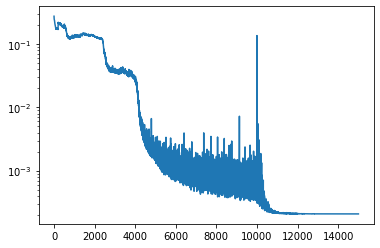

In [7]:
plt.semilogy(h.history['loss'] + h2.history['loss'])

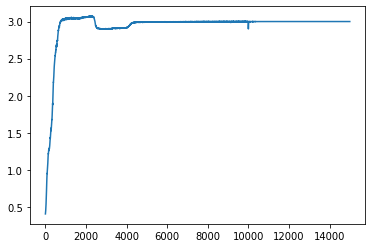

In [8]:
plt.plot(h.history['parameter_OmegaParam'] + h2.history['parameter_OmegaParam'])

In [10]:
# sn.clear_session()
T = sn.Variable('T')
U = sn.Functional('U', T, 4*[20], 'sin')
OmegaParam2 = sn.Parameter(np.random.rand(), inputs=T, name='OmegaParam2' )
L1 = sn.diff(U, T, order=2) + OmegaParam2**2*U - F0*sn.sin(OmegaBar*T)

In [11]:
Model = sn.SciModel([T], [sn.Data(U), sn.PDE(L1)], optimizer='adam')

In [12]:
H = Model.train(
    t_data, 
    [u_data, 'zeros'], 
    epochs=10000, 
    reduce_lr_after=200,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1,
    log_parameters=[OmegaParam2]
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [8783.501, 1.0]
Epoch 1/10000
2000/2000 [==============================] - 0s 43us/sample - loss: 238.2540 - U_loss: 0.0175 - sub_1_loss: 84.3341
Epoch 2/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 58.2182 - U_loss: 0.0040 - sub_1_loss: 23.1149
Epoch 3/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 29.0225 - U_loss: 0.0017 - sub_1_loss: 13.7593
Epoch 4/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 16.5792 - U_loss: 7.8720e-04 - sub_1_loss: 9.6647
Epoch 5/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 11.3468 - U_loss: 5.4403e-04 - sub_1_loss: 6.5683
Epoch 6/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1029 - U_loss: 3.4285e-04 - sub_1_loss: 5.0914
Epoch 7/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2410 - U_loss: 2.3707e-04 - sub_1_loss: 4.1587
Epoch 8/10000
20

2000/2000 [==============================] - 0s 17us/sample - loss: 0.4812 - U_loss: 2.7437e-06 - sub_1_loss: 0.4571
Epoch 63/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.4738 - U_loss: 2.3435e-06 - sub_1_loss: 0.4533
Epoch 64/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.4629 - U_loss: 2.1524e-06 - sub_1_loss: 0.4440
Epoch 65/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.4577 - U_loss: 2.1872e-06 - sub_1_loss: 0.4385
Epoch 66/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.4505 - U_loss: 2.1606e-06 - sub_1_loss: 0.4315
Epoch 67/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.4447 - U_loss: 1.9674e-06 - sub_1_loss: 0.4274
Epoch 68/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.4343 - U_loss: 1.8269e-06 - sub_1_loss: 0.4182
Epoch 69/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.4203 -

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0969 - U_loss: 5.7629e-07 - sub_1_loss: 0.0924
Epoch 123/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0937 - U_loss: 6.2394e-07 - sub_1_loss: 0.0887
Epoch 124/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0905 - U_loss: 8.0615e-07 - sub_1_loss: 0.0842
Epoch 125/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0914 - U_loss: 1.0009e-06 - sub_1_loss: 0.0835
Epoch 126/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0865 - U_loss: 9.8385e-07 - sub_1_loss: 0.0787
Epoch 127/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0789 - U_loss: 5.8781e-07 - sub_1_loss: 0.0742
Epoch 128/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0765 - U_loss: 6.1229e-07 - sub_1_loss: 0.0716
Epoch 129/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0099 - U_loss: 1.9754e-07 - sub_1_loss: 0.0084
Epoch 184/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0099 - U_loss: 2.0368e-07 - sub_1_loss: 0.0083
Epoch 185/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0094 - U_loss: 1.6550e-07 - sub_1_loss: 0.0081
Epoch 186/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0106 - U_loss: 3.1937e-07 - sub_1_loss: 0.0081
Epoch 187/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0101 - U_loss: 2.9171e-07 - sub_1_loss: 0.0078
Epoch 188/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0091 - U_loss: 1.5658e-07 - sub_1_loss: 0.0078
Epoch 189/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0088 - U_loss: 1.6067e-07 - sub_1_loss: 0.0075
Epoch 190/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0097 - U_loss: 6.5796e-07 - sub_1_loss: 0.0051
Epoch 244/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0078 - U_loss: 4.7012e-07 - sub_1_loss: 0.0044
Epoch 245/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0074 - U_loss: 4.3825e-07 - sub_1_loss: 0.0043
Epoch 246/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0080 - U_loss: 5.0402e-07 - sub_1_loss: 0.0044
Epoch 247/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0110 - U_loss: 8.8583e-07 - sub_1_loss: 0.0047
Epoch 248/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0106 - U_loss: 8.3639e-07 - sub_1_loss: 0.0047
Epoch 249/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0101 - U_loss: 7.8059e-07 - sub_1_loss: 0.0045
Epoch 250/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0051 - U_loss: 4.0858e-07 - sub_1_loss: 0.0025
Epoch 304/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0060 - U_loss: 4.8885e-07 - sub_1_loss: 0.0029
Epoch 305/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0063 - U_loss: 5.5662e-07 - sub_1_loss: 0.0027
Epoch 306/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0082 - U_loss: 8.1969e-07 - sub_1_loss: 0.0030
Epoch 307/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0071 - U_loss: 6.8858e-07 - sub_1_loss: 0.0027
Epoch 308/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0089 - U_loss: 9.0319e-07 - sub_1_loss: 0.0031
Epoch 309/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0170 - U_loss: 1.8844e-06 - sub_1_loss: 0.0049
Epoch 310/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0415 - U_loss: 5.2402e-06 - sub_1_loss: 0.0080
Epoch 365/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0595 - U_loss: 7.4988e-06 - sub_1_loss: 0.0115
Epoch 366/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0479 - U_loss: 5.8214e-06 - sub_1_loss: 0.0106
Epoch 367/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0278 - U_loss: 3.4251e-06 - sub_1_loss: 0.0058
Epoch 368/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0240 - U_loss: 2.7398e-06 - sub_1_loss: 0.0064
Epoch 369/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0229 - U_loss: 2.6348e-06 - sub_1_loss: 0.0060
Epoch 370/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0718 - U_loss: 9.1505e-06 - sub_1_loss: 0.0132
Epoch 371/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0417 - U_loss: 5.7366e-06 - sub_1_loss: 0.0087
Epoch 425/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0509 - U_loss: 7.3041e-06 - sub_1_loss: 0.0088
Epoch 426/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0600 - U_loss: 8.4043e-06 - sub_1_loss: 0.0116
Epoch 427/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0584 - U_loss: 7.9844e-06 - sub_1_loss: 0.0123
Epoch 428/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0402 - U_loss: 5.3179e-06 - sub_1_loss: 0.0095
Epoch 429/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0237 - U_loss: 3.3652e-06 - sub_1_loss: 0.0043
Epoch 430/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0143 - U_loss: 1.8837e-06 - sub_1_loss: 0.0035
Epoch 431/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0175 - U_loss: 2.4278e-06 - sub_1_loss: 0.0035
Epoch 486/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0225 - U_loss: 3.1145e-06 - sub_1_loss: 0.0045
Epoch 487/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0301 - U_loss: 4.0301e-06 - sub_1_loss: 0.0068
Epoch 488/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0620 - U_loss: 8.6482e-06 - sub_1_loss: 0.0122
Epoch 489/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0587 - U_loss: 7.6728e-06 - sub_1_loss: 0.0145
Epoch 490/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0462 - U_loss: 6.3164e-06 - sub_1_loss: 0.0098
Epoch 491/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0413 - U_loss: 5.7188e-06 - sub_1_loss: 0.0083
Epoch 492/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0462 - U_loss: 7.3566e-06 - sub_1_loss: 0.0080
Epoch 545/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0840 - U_loss: 1.4053e-05 - sub_1_loss: 0.0111
Epoch 546/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1084 - U_loss: 1.7223e-05 - sub_1_loss: 0.0191
Epoch 547/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0644 - U_loss: 9.8491e-06 - sub_1_loss: 0.0133
Epoch 548/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0475 - U_loss: 6.7685e-06 - sub_1_loss: 0.0124
Epoch 549/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 0.0309 - U_loss: 4.6404e-06 - sub_1_loss: 0.0069
Epoch 550/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0221 - U_loss: 3.2928e-06 - sub_1_loss: 0.0050
Epoch 551/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 0

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0062 - U_loss: 1.0848e-06 - sub_1_loss: 0.0012
Epoch 604/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0057 - U_loss: 9.9596e-07 - sub_1_loss: 0.0010
Epoch 605/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0043 - U_loss: 7.2714e-07 - sub_1_loss: 8.5589e-04
Epoch 606/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0055 - U_loss: 9.5419e-07 - sub_1_loss: 0.0011
Epoch 607/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0041 - U_loss: 6.7269e-07 - sub_1_loss: 9.9173e-04
Epoch 608/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0033 - U_loss: 5.6975e-07 - sub_1_loss: 6.2086e-04
Epoch 609/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0030 - U_loss: 4.7602e-07 - sub_1_loss: 7.5918e-04
Epoch 610/10000
2000/2000 [==============================] - 0s 12us/

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - U_loss: 2.6073e-07 - sub_1_loss: 4.7214e-04
Epoch 664/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0036 - U_loss: 6.0310e-07 - sub_1_loss: 7.4710e-04
Epoch 665/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0030 - U_loss: 4.9509e-07 - sub_1_loss: 7.1433e-04
Epoch 666/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - U_loss: 3.9796e-07 - sub_1_loss: 5.8405e-04
Epoch 667/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0043 - U_loss: 7.4807e-07 - sub_1_loss: 7.9906e-04
Epoch 668/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0104 - U_loss: 1.8226e-06 - sub_1_loss: 0.0019
Epoch 669/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0088 - U_loss: 1.5193e-06 - sub_1_loss: 0.0017
Epoch 670/10000
2000/2000 [==============================] - 0s 1

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0126 - U_loss: 2.4253e-06 - sub_1_loss: 0.0024
Epoch 723/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0043 - U_loss: 7.5353e-07 - sub_1_loss: 0.0012
Epoch 724/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0022 - U_loss: 3.7172e-07 - sub_1_loss: 5.9957e-04
Epoch 725/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - U_loss: 2.3719e-07 - sub_1_loss: 3.4342e-04
Epoch 726/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.7764e-04 - U_loss: 8.6644e-08 - sub_1_loss: 2.1348e-04
Epoch 727/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.5809e-04 - U_loss: 3.1990e-08 - sub_1_loss: 1.2364e-04
Epoch 728/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9491e-04 - U_loss: 2.0652e-08 - sub_1_loss: 1.0811e-04
Epoch 729/10000
2000/2000 [==========================

2000/2000 [==============================] - 0s 13us/sample - loss: 1.5607e-04 - U_loss: 1.5722e-08 - sub_1_loss: 8.9988e-05
Epoch 782/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9751e-04 - U_loss: 2.5218e-08 - sub_1_loss: 9.1520e-05
Epoch 783/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1328e-04 - U_loss: 2.8469e-08 - sub_1_loss: 9.3621e-05
Epoch 784/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.7646e-04 - U_loss: 2.0799e-08 - sub_1_loss: 8.9039e-05
Epoch 785/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1587e-04 - U_loss: 2.9606e-08 - sub_1_loss: 9.1431e-05
Epoch 786/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2631e-04 - U_loss: 3.0765e-08 - sub_1_loss: 9.7007e-05
Epoch 787/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5697e-04 - U_loss: 1.7036e-08 - sub_1_loss: 8.5373e-05
Epoch 788/10000
2000/2000 [==

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - U_loss: 2.7372e-07 - sub_1_loss: 3.4712e-04
Epoch 840/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - U_loss: 2.6709e-07 - sub_1_loss: 2.9194e-04
Epoch 841/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0013 - U_loss: 2.7240e-07 - sub_1_loss: 2.7511e-04
Epoch 842/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.2524e-04 - U_loss: 1.3528e-07 - sub_1_loss: 2.1349e-04
Epoch 843/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6904e-04 - U_loss: 6.2166e-08 - sub_1_loss: 1.3388e-04
Epoch 844/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2122e-04 - U_loss: 7.5625e-08 - sub_1_loss: 1.3515e-04
Epoch 845/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.6700e-04 - U_loss: 6.4350e-08 - sub_1_loss: 1.2358e-04
Epoch 846/10000
2000/2000 [==============

2000/2000 [==============================] - 0s 17us/sample - loss: 0.0012 - U_loss: 2.5646e-07 - sub_1_loss: 2.4653e-04
Epoch 900/10000
 100/2000 [>.............................] - ETA: 0s - loss: 6.1181e-04 - U_loss: 1.2201e-07 - sub_1_loss: 1.5027e-04
+ adaptive_weights at epoch 899: [3404.6821, 1.0]
2000/2000 [==============================] - 0s 24us/sample - loss: 0.0014 - U_loss: 2.7346e-07 - sub_1_loss: 3.3736e-04
Epoch 901/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - U_loss: 4.2467e-07 - sub_1_loss: 4.1001e-04
Epoch 902/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 0.0019 - U_loss: 4.5339e-07 - sub_1_loss: 3.3020e-04
Epoch 903/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.9950e-04 - U_loss: 1.7415e-07 - sub_1_loss: 2.0657e-04
Epoch 904/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.2955e-04 - U_loss: 2.0128e-07 - sub_1_loss: 2.4427e-04
Epoch 905/10000
20

2000/2000 [==============================] - 0s 19us/sample - loss: 4.8026e-04 - U_loss: 1.0864e-07 - sub_1_loss: 1.1039e-04
Epoch 958/10000
2000/2000 [==============================] - 0s 31us/sample - loss: 9.8367e-04 - U_loss: 2.3119e-07 - sub_1_loss: 1.9654e-04
Epoch 959/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0011 - U_loss: 2.6412e-07 - sub_1_loss: 1.9225e-04
Epoch 960/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0016 - U_loss: 3.8288e-07 - sub_1_loss: 3.1705e-04
Epoch 961/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0021 - U_loss: 5.0907e-07 - sub_1_loss: 3.7419e-04
Epoch 962/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0020 - U_loss: 4.5572e-07 - sub_1_loss: 4.4266e-04
Epoch 963/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0016 - U_loss: 3.6131e-07 - sub_1_loss: 3.9167e-04
Epoch 964/10000
2000/2000 [======================

2000/2000 [==============================] - 0s 12us/sample - loss: 3.0309e-05 - U_loss: 1.5354e-09 - sub_1_loss: 2.5604e-05
Epoch 1014/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 3.6376e-05 - U_loss: 3.0998e-09 - sub_1_loss: 2.6877e-05
Epoch 1015/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.1974e-05 - U_loss: 1.9883e-09 - sub_1_loss: 2.5881e-05
Epoch 1016/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0342e-05 - U_loss: 1.8983e-09 - sub_1_loss: 2.4525e-05
Epoch 1017/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 3.0323e-05 - U_loss: 2.0262e-09 - sub_1_loss: 2.4114e-05
Epoch 1018/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.0094e-05 - U_loss: 1.7401e-09 - sub_1_loss: 2.4761e-05
Epoch 1019/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.1301e-05 - U_loss: 2.2651e-09 - sub_1_loss: 2.4359e-05
Epoch 1020/10000
2000/2

Epoch 1071/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0026 - U_loss: 6.5472e-07 - sub_1_loss: 6.2597e-04
Epoch 1072/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0027 - U_loss: 6.9116e-07 - sub_1_loss: 5.4737e-04
Epoch 1073/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0029 - U_loss: 7.9529e-07 - sub_1_loss: 4.7219e-04
Epoch 1074/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0029 - U_loss: 7.9334e-07 - sub_1_loss: 4.5892e-04
Epoch 1075/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0024 - U_loss: 6.2386e-07 - sub_1_loss: 4.4388e-04
Epoch 1076/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - U_loss: 3.0926e-07 - sub_1_loss: 2.7646e-04
Epoch 1077/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.8542e-04 - U_loss: 2.2723e-07 - sub_1_loss: 1.8907e-04
Epoch 1078/10000
2000/2000 [==

2000/2000 [==============================] - 0s 13us/sample - loss: 5.2573e-04 - U_loss: 1.6078e-07 - sub_1_loss: 8.2264e-05
Epoch 1128/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0026 - U_loss: 8.1254e-07 - sub_1_loss: 3.2610e-04
Epoch 1129/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0042 - U_loss: 1.2886e-06 - sub_1_loss: 6.6531e-04
Epoch 1130/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0044 - U_loss: 1.2447e-06 - sub_1_loss: 9.6363e-04
Epoch 1131/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0038 - U_loss: 1.0465e-06 - sub_1_loss: 8.9859e-04
Epoch 1132/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0027 - U_loss: 7.1124e-07 - sub_1_loss: 6.9256e-04
Epoch 1133/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - U_loss: 6.7140e-07 - sub_1_loss: 5.7226e-04
Epoch 1134/10000
2000/2000 [===================

2000/2000 [==============================] - 0s 12us/sample - loss: 2.3138e-04 - U_loss: 6.4531e-08 - sub_1_loss: 5.3388e-05
Epoch 1186/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.4253e-04 - U_loss: 3.3003e-08 - sub_1_loss: 5.1498e-05
Epoch 1187/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.6392e-05 - U_loss: 1.9643e-08 - sub_1_loss: 3.2213e-05
Epoch 1188/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5664e-04 - U_loss: 4.2844e-08 - sub_1_loss: 3.8463e-05
Epoch 1189/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1715e-04 - U_loss: 6.1903e-08 - sub_1_loss: 4.6408e-05
Epoch 1190/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.2759e-04 - U_loss: 9.3858e-08 - sub_1_loss: 6.8708e-05
Epoch 1191/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8580e-04 - U_loss: 7.8713e-08 - sub_1_loss: 6.8698e-05
Epoch 1192/10000
2000/2

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1874e-05 - U_loss: 7.0458e-10 - sub_1_loss: 1.0125e-05
Epoch 1241/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.2400e-05 - U_loss: 8.5294e-10 - sub_1_loss: 1.0282e-05
Epoch 1242/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1646e-05 - U_loss: 6.1876e-10 - sub_1_loss: 1.0110e-05
Epoch 1243/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1234e-05 - U_loss: 5.6906e-10 - sub_1_loss: 9.8211e-06
Epoch 1244/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1957e-05 - U_loss: 9.2511e-10 - sub_1_loss: 9.6602e-06
Epoch 1245/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2135e-05 - U_loss: 1.0136e-09 - sub_1_loss: 9.6189e-06
Epoch 1246/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0892e-05 - U_loss: 5.5093e-10 - sub_1_loss: 9.5247e-06
Epoch 1247/10000
2000/2

2000/2000 [==============================] - 0s 13us/sample - loss: 1.2241e-04 - U_loss: 3.4446e-08 - sub_1_loss: 3.6898e-05
Epoch 1298/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7851e-04 - U_loss: 8.1084e-08 - sub_1_loss: 7.7206e-05
Epoch 1299/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.6273e-04 - U_loss: 6.7542e-08 - sub_1_loss: 9.5045e-05
Epoch 1300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 2.1332e-04 - U_loss: 5.4869e-08 - sub_1_loss: 7.7107e-05
+ adaptive_weights at epoch 1299: [2234.508, 1.0]
2000/2000 [==============================] - 0s 16us/sample - loss: 2.8729e-04 - U_loss: 8.7156e-08 - sub_1_loss: 7.0917e-05
Epoch 1301/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.4611e-04 - U_loss: 1.2113e-07 - sub_1_loss: 7.5458e-05
Epoch 1302/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.3394e-04 - U_loss: 1.1695e-07 - sub_1_loss: 7.2623e-

2000/2000 [==============================] - 0s 13us/sample - loss: 5.9184e-04 - U_loss: 2.1239e-07 - sub_1_loss: 1.1726e-04
Epoch 1354/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6950e-04 - U_loss: 1.6358e-07 - sub_1_loss: 1.0399e-04
Epoch 1355/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.5866e-04 - U_loss: 8.4404e-08 - sub_1_loss: 7.0057e-05
Epoch 1356/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9738e-04 - U_loss: 5.7721e-08 - sub_1_loss: 6.8402e-05
Epoch 1357/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.3299e-04 - U_loss: 1.1454e-07 - sub_1_loss: 7.7054e-05
Epoch 1358/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8433e-04 - U_loss: 8.9501e-08 - sub_1_loss: 8.4336e-05
Epoch 1359/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7608e-04 - U_loss: 5.6459e-08 - sub_1_loss: 4.9921e-05
Epoch 1360/10000
2000/2

2000/2000 [==============================] - 0s 13us/sample - loss: 1.3954e-05 - U_loss: 3.1167e-09 - sub_1_loss: 7.6853e-06
Epoch 1410/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.3465e-05 - U_loss: 3.2779e-09 - sub_1_loss: 6.8720e-06
Epoch 1411/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6099e-05 - U_loss: 4.0967e-09 - sub_1_loss: 7.8596e-06
Epoch 1412/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7417e-05 - U_loss: 4.0498e-09 - sub_1_loss: 9.2716e-06
Epoch 1413/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.7278e-05 - U_loss: 4.1531e-09 - sub_1_loss: 8.9254e-06
Epoch 1414/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.6340e-05 - U_loss: 4.1354e-09 - sub_1_loss: 8.0226e-06
Epoch 1415/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.4068e-05 - U_loss: 3.2636e-09 - sub_1_loss: 7.5042e-06
Epoch 1416/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 9.9092e-04 - U_loss: 3.4012e-07 - sub_1_loss: 3.0685e-04
Epoch 1467/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4278e-04 - U_loss: 1.8993e-07 - sub_1_loss: 1.6079e-04
Epoch 1468/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5844e-04 - U_loss: 2.0489e-07 - sub_1_loss: 1.4636e-04
Epoch 1469/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.8088e-04 - U_loss: 1.0429e-07 - sub_1_loss: 7.1134e-05
Epoch 1470/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.4891e-04 - U_loss: 5.2951e-08 - sub_1_loss: 4.2414e-05
Epoch 1471/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.5556e-04 - U_loss: 1.3833e-07 - sub_1_loss: 7.7342e-05
Epoch 1472/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.7163e-04 - U_loss: 9.7306e-08 - sub_1_loss: 7.5925e-05
Epoch 1473/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 5.6804e-05 - U_loss: 2.0672e-08 - sub_1_loss: 1.9382e-05
Epoch 1523/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6386e-05 - U_loss: 2.0462e-08 - sub_1_loss: 1.9346e-05
Epoch 1524/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1517e-05 - U_loss: 1.9327e-08 - sub_1_loss: 1.6530e-05
Epoch 1525/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6522e-05 - U_loss: 2.7164e-08 - sub_1_loss: 2.7350e-05
Epoch 1526/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3111e-05 - U_loss: 2.8478e-08 - sub_1_loss: 3.1559e-05
Epoch 1527/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1107e-04 - U_loss: 4.3732e-08 - sub_1_loss: 3.1907e-05
Epoch 1528/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1412e-04 - U_loss: 4.3272e-08 - sub_1_loss: 3.5792e-05
Epoch 1529/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 4.2882e-05 - U_loss: 1.4747e-08 - sub_1_loss: 1.6186e-05
Epoch 1580/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.9432e-05 - U_loss: 1.2707e-08 - sub_1_loss: 1.6429e-05
Epoch 1581/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4031e-05 - U_loss: 2.0604e-08 - sub_1_loss: 1.6734e-05
Epoch 1582/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4733e-04 - U_loss: 5.9879e-08 - sub_1_loss: 3.8933e-05
Epoch 1583/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.3012e-04 - U_loss: 1.3202e-07 - sub_1_loss: 9.1138e-05
Epoch 1584/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5183e-04 - U_loss: 2.5551e-07 - sub_1_loss: 1.8930e-04
Epoch 1585/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6920e-04 - U_loss: 3.2971e-07 - sub_1_loss: 1.7235e-04
Epoch 1586/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 4.0877e-06 - U_loss: 4.4437e-10 - sub_1_loss: 3.3636e-06
Epoch 1635/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5656e-06 - U_loss: 4.9575e-10 - sub_1_loss: 3.7578e-06
Epoch 1636/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3381e-06 - U_loss: 5.5917e-10 - sub_1_loss: 3.4270e-06
Epoch 1637/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.6789e-06 - U_loss: 5.4010e-10 - sub_1_loss: 3.7988e-06
Epoch 1638/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1536e-06 - U_loss: 5.0500e-10 - sub_1_loss: 3.3307e-06
Epoch 1639/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.7505e-06 - U_loss: 7.3445e-10 - sub_1_loss: 3.5537e-06
Epoch 1640/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3083e-06 - U_loss: 6.3088e-10 - sub_1_loss: 3.2803e-06
Epoch 1641/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 5.2455e-05 - U_loss: 2.1402e-08 - sub_1_loss: 1.7581e-05
Epoch 1692/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.4504e-05 - U_loss: 9.1455e-09 - sub_1_loss: 9.6020e-06
Epoch 1693/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.4689e-05 - U_loss: 8.7831e-09 - sub_1_loss: 1.0378e-05
Epoch 1694/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1850e-05 - U_loss: 1.7124e-08 - sub_1_loss: 1.3946e-05
Epoch 1695/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.1523e-05 - U_loss: 1.1011e-08 - sub_1_loss: 1.3582e-05
Epoch 1696/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.4866e-05 - U_loss: 1.4112e-08 - sub_1_loss: 1.1871e-05
Epoch 1697/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.7750e-05 - U_loss: 1.0959e-08 - sub_1_loss: 9.8931e-06
Epoch 1698/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0705e-05 - U_loss: 3.7772e-09 - sub_1_loss: 5.1654e-06
Epoch 1748/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.7715e-06 - U_loss: 2.8587e-09 - sub_1_loss: 5.5786e-06
Epoch 1749/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0997e-05 - U_loss: 4.1098e-09 - sub_1_loss: 4.9688e-06
Epoch 1750/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0420e-05 - U_loss: 3.6166e-09 - sub_1_loss: 5.1157e-06
Epoch 1751/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.2557e-06 - U_loss: 3.1787e-09 - sub_1_loss: 4.5934e-06
Epoch 1752/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1047e-05 - U_loss: 4.2435e-09 - sub_1_loss: 4.8236e-06
Epoch 1753/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.7609e-05 - U_loss: 7.6857e-09 - sub_1_loss: 6.3366e-06
Epoch 1754/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 8.1797e-06 - U_loss: 2.6622e-09 - sub_1_loss: 4.6646e-06
Epoch 1804/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.3322e-05 - U_loss: 5.5314e-09 - sub_1_loss: 6.0186e-06
Epoch 1805/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.5900e-05 - U_loss: 5.8275e-09 - sub_1_loss: 8.2052e-06
Epoch 1806/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3662e-05 - U_loss: 5.7071e-09 - sub_1_loss: 6.1264e-06
Epoch 1807/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3693e-05 - U_loss: 5.6764e-09 - sub_1_loss: 6.1980e-06
Epoch 1808/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.5134e-05 - U_loss: 6.1665e-09 - sub_1_loss: 6.9924e-06
Epoch 1809/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1777e-05 - U_loss: 4.6316e-09 - sub_1_loss: 5.6620e-06
Epoch 1810/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 3.6066e-06 - U_loss: 6.7592e-10 - sub_1_loss: 2.7141e-06
Epoch 1860/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 3.2742e-06 - U_loss: 5.1603e-10 - sub_1_loss: 2.5928e-06
Epoch 1861/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 3.6210e-06 - U_loss: 6.2639e-10 - sub_1_loss: 2.7939e-06
Epoch 1862/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.5016e-06 - U_loss: 5.9126e-10 - sub_1_loss: 2.7209e-06
Epoch 1863/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.2535e-06 - U_loss: 5.4096e-10 - sub_1_loss: 2.5393e-06
Epoch 1864/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.1404e-06 - U_loss: 4.9466e-10 - sub_1_loss: 2.4872e-06
Epoch 1865/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.0058e-06 - U_loss: 1.0120e-09 - sub_1_loss: 2.6696e-06
Epoch 1866/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3407e-06 - U_loss: 1.8432e-09 - sub_1_loss: 3.1500e-06
Epoch 1916/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.3002e-06 - U_loss: 2.5990e-09 - sub_1_loss: 5.2111e-06
Epoch 1917/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.4458e-06 - U_loss: 2.1133e-09 - sub_1_loss: 3.9340e-06
Epoch 1918/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.2536e-06 - U_loss: 2.5374e-09 - sub_1_loss: 4.2379e-06
Epoch 1919/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.2085e-06 - U_loss: 3.8261e-09 - sub_1_loss: 3.6611e-06
Epoch 1920/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.5324e-06 - U_loss: 2.1948e-09 - sub_1_loss: 3.9238e-06
Epoch 1921/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.2695e-06 - U_loss: 1.2054e-09 - sub_1_loss: 2.8369e-06
Epoch 1922/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 6.0939e-06 - U_loss: 2.2955e-09 - sub_1_loss: 3.3656e-06
Epoch 1973/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.7585e-06 - U_loss: 3.4767e-09 - sub_1_loss: 4.6262e-06
Epoch 1974/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.2999e-06 - U_loss: 2.7265e-09 - sub_1_loss: 4.0593e-06
Epoch 1975/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.0365e-06 - U_loss: 4.4277e-09 - sub_1_loss: 3.7740e-06
Epoch 1976/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4495e-05 - U_loss: 7.7189e-09 - sub_1_loss: 5.3213e-06
Epoch 1977/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.8864e-05 - U_loss: 8.4080e-09 - sub_1_loss: 8.8712e-06
Epoch 1978/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.8539e-05 - U_loss: 1.3055e-08 - sub_1_loss: 1.3022e-05
Epoch 1979/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 1.0753e-05 - U_loss: 5.0208e-09 - sub_1_loss: 5.3803e-06
Epoch 2029/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1712e-05 - U_loss: 5.7912e-09 - sub_1_loss: 5.5151e-06
Epoch 2030/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1246e-05 - U_loss: 5.9793e-09 - sub_1_loss: 4.8480e-06
Epoch 2031/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.6963e-05 - U_loss: 9.4590e-09 - sub_1_loss: 6.8416e-06
Epoch 2032/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1763e-05 - U_loss: 5.7133e-09 - sub_1_loss: 5.6495e-06
Epoch 2033/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1648e-05 - U_loss: 5.9987e-09 - sub_1_loss: 5.2290e-06
Epoch 2034/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.4961e-06 - U_loss: 4.5148e-09 - sub_1_loss: 4.6654e-06
Epoch 2035/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 2.3850e-06 - U_loss: 4.6470e-10 - sub_1_loss: 1.8877e-06
Epoch 2085/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.8258e-06 - U_loss: 7.8248e-10 - sub_1_loss: 1.9886e-06
Epoch 2086/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.5646e-06 - U_loss: 7.2538e-10 - sub_1_loss: 1.7884e-06
Epoch 2087/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.2535e-06 - U_loss: 4.1229e-10 - sub_1_loss: 1.8123e-06
Epoch 2088/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.2964e-06 - U_loss: 4.3106e-10 - sub_1_loss: 1.8351e-06
Epoch 2089/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.3040e-06 - U_loss: 5.1682e-10 - sub_1_loss: 1.7510e-06
Epoch 2090/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.2579e-06 - U_loss: 4.3315e-10 - sub_1_loss: 1.7944e-06
Epoch 2091/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 3.1828e-06 - U_loss: 1.0354e-09 - sub_1_loss: 2.1856e-06
Epoch 2141/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.5440e-06 - U_loss: 1.1770e-09 - sub_1_loss: 2.4103e-06
Epoch 2142/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.3669e-06 - U_loss: 1.5393e-09 - sub_1_loss: 2.8843e-06
Epoch 2143/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 4.3334e-06 - U_loss: 1.8326e-09 - sub_1_loss: 2.5683e-06
Epoch 2144/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.8830e-06 - U_loss: 1.6378e-09 - sub_1_loss: 2.3056e-06
Epoch 2145/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.5703e-06 - U_loss: 1.0622e-09 - sub_1_loss: 2.5472e-06
Epoch 2146/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.3720e-06 - U_loss: 1.3821e-09 - sub_1_loss: 3.0408e-06
Epoch 2147/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.2304e-06 - U_loss: 1.9365e-09 - sub_1_loss: 3.3651e-06
Epoch 2198/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.6588e-06 - U_loss: 1.7081e-09 - sub_1_loss: 3.0136e-06
Epoch 2199/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.2450e-06 - U_loss: 1.4846e-09 - sub_1_loss: 2.8151e-06
Epoch 2200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 7.2476e-06 - U_loss: 3.1895e-09 - sub_1_loss: 4.1755e-06
+ adaptive_weights at epoch 2199: [867.15485, 1.0]
2000/2000 [==============================] - 0s 21us/sample - loss: 7.3145e-06 - U_loss: 3.7354e-09 - sub_1_loss: 3.7166e-06
Epoch 2201/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.4963e-06 - U_loss: 1.6405e-09 - sub_1_loss: 2.0738e-06
Epoch 2202/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.9001e-06 - U_loss: 1.0594e-09 - sub_1_loss: 1.9814e

2000/2000 [==============================] - 0s 17us/sample - loss: 1.4760e-06 - U_loss: 2.3494e-10 - sub_1_loss: 1.2723e-06
Epoch 2253/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4957e-06 - U_loss: 1.9243e-10 - sub_1_loss: 1.3288e-06
Epoch 2254/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4558e-06 - U_loss: 1.6971e-10 - sub_1_loss: 1.3086e-06
Epoch 2255/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.5871e-06 - U_loss: 2.4492e-10 - sub_1_loss: 1.3747e-06
Epoch 2256/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.6991e-06 - U_loss: 2.8875e-10 - sub_1_loss: 1.4487e-06
Epoch 2257/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4775e-06 - U_loss: 1.8292e-10 - sub_1_loss: 1.3189e-06
Epoch 2258/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.5853e-06 - U_loss: 3.1442e-10 - sub_1_loss: 1.3127e-06
Epoch 2259/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 1.8644e-06 - U_loss: 4.8871e-10 - sub_1_loss: 1.4827e-06
Epoch 2309/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.1255e-06 - U_loss: 6.1684e-10 - sub_1_loss: 1.6437e-06
Epoch 2310/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.7253e-06 - U_loss: 4.6162e-10 - sub_1_loss: 1.3646e-06
Epoch 2311/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.5547e-06 - U_loss: 3.0850e-10 - sub_1_loss: 1.3137e-06
Epoch 2312/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.6423e-06 - U_loss: 3.4666e-10 - sub_1_loss: 1.3715e-06
Epoch 2313/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.8659e-06 - U_loss: 4.4499e-10 - sub_1_loss: 1.5183e-06
Epoch 2314/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.1375e-06 - U_loss: 6.2731e-10 - sub_1_loss: 1.6474e-06
Epoch 2315/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 2.2867e-06 - U_loss: 6.1099e-10 - sub_1_loss: 1.8094e-06
Epoch 2366/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.7334e-06 - U_loss: 3.7632e-10 - sub_1_loss: 1.4394e-06
Epoch 2367/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.5872e-06 - U_loss: 3.1849e-10 - sub_1_loss: 1.3384e-06
Epoch 2368/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.7785e-06 - U_loss: 4.4224e-10 - sub_1_loss: 1.4330e-06
Epoch 2369/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.2128e-06 - U_loss: 7.0095e-10 - sub_1_loss: 1.6652e-06
Epoch 2370/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.7748e-06 - U_loss: 3.9442e-10 - sub_1_loss: 1.4666e-06
Epoch 2371/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.7938e-06 - U_loss: 3.6651e-10 - sub_1_loss: 1.5074e-06
Epoch 2372/10000
2000/2

2000/2000 [==============================] - 0s 25us/sample - loss: 2.1148e-06 - U_loss: 6.6228e-10 - sub_1_loss: 1.6486e-06
Epoch 2422/10000
2000/2000 [==============================] - 0s 31us/sample - loss: 2.3834e-06 - U_loss: 9.0598e-10 - sub_1_loss: 1.7456e-06
Epoch 2423/10000
2000/2000 [==============================] - 0s 25us/sample - loss: 2.2464e-06 - U_loss: 8.4028e-10 - sub_1_loss: 1.6549e-06
Epoch 2424/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 2.0364e-06 - U_loss: 6.7631e-10 - sub_1_loss: 1.5603e-06
Epoch 2425/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.6477e-06 - U_loss: 3.6145e-10 - sub_1_loss: 1.3933e-06
Epoch 2426/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 1.7917e-06 - U_loss: 5.4628e-10 - sub_1_loss: 1.4071e-06
Epoch 2427/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.8162e-06 - U_loss: 4.8391e-10 - sub_1_loss: 1.4756e-06
Epoch 2428/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 1.2932e-06 - U_loss: 1.6319e-10 - sub_1_loss: 1.1783e-06
Epoch 2478/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.3160e-06 - U_loss: 2.3556e-10 - sub_1_loss: 1.1502e-06
Epoch 2479/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2805e-06 - U_loss: 2.1858e-10 - sub_1_loss: 1.1266e-06
Epoch 2480/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.2052e-06 - U_loss: 1.3363e-10 - sub_1_loss: 1.1112e-06
Epoch 2481/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.2150e-06 - U_loss: 1.0832e-10 - sub_1_loss: 1.1387e-06
Epoch 2482/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.1466e-06 - U_loss: 1.1197e-10 - sub_1_loss: 1.0678e-06
Epoch 2483/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2658e-06 - U_loss: 1.6925e-10 - sub_1_loss: 1.1467e-06
Epoch 2484/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 1.3282e-06 - U_loss: 2.2623e-10 - sub_1_loss: 1.1848e-06
Epoch 2534/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.2920e-06 - U_loss: 2.3295e-10 - sub_1_loss: 1.1443e-06
Epoch 2535/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1531e-06 - U_loss: 1.1011e-10 - sub_1_loss: 1.0833e-06
Epoch 2536/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1841e-06 - U_loss: 1.4037e-10 - sub_1_loss: 1.0951e-06
Epoch 2537/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.2017e-06 - U_loss: 1.3931e-10 - sub_1_loss: 1.1133e-06
Epoch 2538/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.2128e-06 - U_loss: 1.7547e-10 - sub_1_loss: 1.1016e-06
Epoch 2539/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.3620e-06 - U_loss: 3.0997e-10 - sub_1_loss: 1.1655e-06
Epoch 2540/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.3010e-06 - U_loss: 3.0922e-10 - sub_1_loss: 1.1049e-06
Epoch 2591/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2381e-06 - U_loss: 2.1293e-10 - sub_1_loss: 1.1031e-06
Epoch 2592/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.2693e-06 - U_loss: 2.0062e-10 - sub_1_loss: 1.1421e-06
Epoch 2593/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.2082e-06 - U_loss: 2.3291e-10 - sub_1_loss: 1.0606e-06
Epoch 2594/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1809e-06 - U_loss: 1.7978e-10 - sub_1_loss: 1.0669e-06
Epoch 2595/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3184e-06 - U_loss: 2.5871e-10 - sub_1_loss: 1.1544e-06
Epoch 2596/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.2011e-06 - U_loss: 2.0906e-10 - sub_1_loss: 1.0686e-06
Epoch 2597/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.2142e-06 - U_loss: 2.2714e-10 - sub_1_loss: 1.0845e-06
Epoch 2647/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2394e-06 - U_loss: 1.7848e-10 - sub_1_loss: 1.1375e-06
Epoch 2648/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3383e-06 - U_loss: 3.0574e-10 - sub_1_loss: 1.1637e-06
Epoch 2649/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.1315e-06 - U_loss: 1.6993e-10 - sub_1_loss: 1.0345e-06
Epoch 2650/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 1.3543e-06 - U_loss: 2.9291e-10 - sub_1_loss: 1.1871e-06
Epoch 2651/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.5406e-06 - U_loss: 4.3775e-10 - sub_1_loss: 1.2906e-06
Epoch 2652/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.2953e-06 - U_loss: 2.5270e-10 - sub_1_loss: 1.1510e-06
Epoch 2653/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 1.1857e-06 - U_loss: 1.8924e-10 - sub_1_loss: 1.0883e-06
Epoch 2703/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1430e-06 - U_loss: 1.1394e-10 - sub_1_loss: 1.0844e-06
Epoch 2704/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1012e-06 - U_loss: 1.3321e-10 - sub_1_loss: 1.0326e-06
Epoch 2705/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1608e-06 - U_loss: 1.9862e-10 - sub_1_loss: 1.0586e-06
Epoch 2706/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2321e-06 - U_loss: 2.0863e-10 - sub_1_loss: 1.1247e-06
Epoch 2707/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2611e-06 - U_loss: 3.1831e-10 - sub_1_loss: 1.0972e-06
Epoch 2708/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.4009e-06 - U_loss: 3.8167e-10 - sub_1_loss: 1.2043e-06
Epoch 2709/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 1.3315e-06 - U_loss: 3.7583e-10 - sub_1_loss: 1.1380e-06
Epoch 2760/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2895e-06 - U_loss: 3.6393e-10 - sub_1_loss: 1.1021e-06
Epoch 2761/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.1627e-06 - U_loss: 2.3968e-10 - sub_1_loss: 1.0393e-06
Epoch 2762/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2569e-06 - U_loss: 3.2111e-10 - sub_1_loss: 1.0916e-06
Epoch 2763/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.4796e-06 - U_loss: 4.2482e-10 - sub_1_loss: 1.2609e-06
Epoch 2764/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3252e-06 - U_loss: 2.8757e-10 - sub_1_loss: 1.1771e-06
Epoch 2765/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3675e-06 - U_loss: 4.0421e-10 - sub_1_loss: 1.1594e-06
Epoch 2766/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.6067e-06 - U_loss: 5.7771e-10 - sub_1_loss: 1.3389e-06
Epoch 2816/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.4806e-06 - U_loss: 4.6468e-10 - sub_1_loss: 1.2651e-06
Epoch 2817/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2985e-06 - U_loss: 4.4067e-10 - sub_1_loss: 1.0941e-06
Epoch 2818/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.2676e-06 - U_loss: 3.2936e-10 - sub_1_loss: 1.1148e-06
Epoch 2819/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1946e-06 - U_loss: 2.5567e-10 - sub_1_loss: 1.0760e-06
Epoch 2820/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2737e-06 - U_loss: 3.3384e-10 - sub_1_loss: 1.1189e-06
Epoch 2821/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2096e-06 - U_loss: 2.8027e-10 - sub_1_loss: 1.0796e-06
Epoch 2822/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.4652e-06 - U_loss: 4.5131e-10 - sub_1_loss: 1.2559e-06
Epoch 2873/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2194e-06 - U_loss: 2.5628e-10 - sub_1_loss: 1.1005e-06
Epoch 2874/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.2601e-06 - U_loss: 2.3610e-10 - sub_1_loss: 1.1506e-06
Epoch 2875/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.3006e-06 - U_loss: 3.4347e-10 - sub_1_loss: 1.1413e-06
Epoch 2876/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1642e-06 - U_loss: 2.6686e-10 - sub_1_loss: 1.0404e-06
Epoch 2877/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1497e-06 - U_loss: 2.3336e-10 - sub_1_loss: 1.0415e-06
Epoch 2878/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1581e-06 - U_loss: 2.1587e-10 - sub_1_loss: 1.0580e-06
Epoch 2879/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.2936e-06 - U_loss: 4.1273e-10 - sub_1_loss: 1.1211e-06
Epoch 2929/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.2443e-06 - U_loss: 3.5546e-10 - sub_1_loss: 1.0958e-06
Epoch 2930/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.1684e-06 - U_loss: 3.4911e-10 - sub_1_loss: 1.0225e-06
Epoch 2931/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1458e-06 - U_loss: 4.0025e-10 - sub_1_loss: 9.7853e-07
Epoch 2932/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1247e-06 - U_loss: 3.0545e-10 - sub_1_loss: 9.9702e-07
Epoch 2933/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1914e-06 - U_loss: 3.0603e-10 - sub_1_loss: 1.0636e-06
Epoch 2934/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1689e-06 - U_loss: 2.6893e-10 - sub_1_loss: 1.0565e-06
Epoch 2935/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.1576e-06 - U_loss: 2.9873e-10 - sub_1_loss: 1.0328e-06
Epoch 2986/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2146e-06 - U_loss: 4.3567e-10 - sub_1_loss: 1.0325e-06
Epoch 2987/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.3118e-06 - U_loss: 4.6093e-10 - sub_1_loss: 1.1192e-06
Epoch 2988/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 1.2750e-06 - U_loss: 2.6497e-10 - sub_1_loss: 1.1642e-06
Epoch 2989/10000
2000/2000 [==============================] - 0s 24us/sample - loss: 1.1841e-06 - U_loss: 3.8290e-10 - sub_1_loss: 1.0241e-06
Epoch 2990/10000
2000/2000 [==============================] - 0s 23us/sample - loss: 1.3436e-06 - U_loss: 4.1559e-10 - sub_1_loss: 1.1699e-06
Epoch 2991/10000
2000/2000 [==============================] - 0s 24us/sample - loss: 1.1512e-06 - U_loss: 2.3773e-10 - sub_1_loss: 1.0519e-06
Epoch 2992/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.1071e-06 - U_loss: 2.7543e-10 - sub_1_loss: 1.0033e-06
Epoch 3042/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.2861e-06 - U_loss: 3.5313e-10 - sub_1_loss: 1.1531e-06
Epoch 03042: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
2000/2000 [==============================] - 0s 19us/sample - loss: 1.1305e-06 - U_loss: 2.6537e-10 - sub_1_loss: 1.0306e-06
Epoch 3043/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.0045e-06 - U_loss: 1.4077e-10 - sub_1_loss: 9.5152e-07
Epoch 3044/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.9816e-07 - U_loss: 9.7408e-11 - sub_1_loss: 8.6148e-07
Epoch 3045/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.8548e-07 - U_loss: 9.2848e-11 - sub_1_loss: 8.5051e-07
Epoch 3046/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.8745e-07 - U_loss: 1.1

2000/2000 [==============================] - 0s 17us/sample - loss: 9.1614e-07 - U_loss: 1.2990e-10 - sub_1_loss: 8.6722e-07
Epoch 3098/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.9857e-07 - U_loss: 1.0810e-10 - sub_1_loss: 9.5785e-07
Epoch 3099/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.4121e-07 - U_loss: 1.1043e-10 - sub_1_loss: 8.9962e-07
Epoch 3100/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.2773e-06 - U_loss: 5.5077e-11 - sub_1_loss: 1.2566e-06
+ adaptive_weights at epoch 3099: [339.975, 1.0]
2000/2000 [==============================] - 0s 22us/sample - loss: 9.5323e-07 - U_loss: 9.6805e-11 - sub_1_loss: 9.1677e-07
Epoch 3101/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.4570e-07 - U_loss: 1.5602e-10 - sub_1_loss: 8.9266e-07
Epoch 3102/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.5969e-07 - U_loss: 1.2074e-10 - sub_1_loss: 9.1865e-0

2000/2000 [==============================] - 0s 18us/sample - loss: 9.3425e-07 - U_loss: 1.4588e-10 - sub_1_loss: 8.8466e-07
Epoch 3154/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.8754e-07 - U_loss: 1.3698e-10 - sub_1_loss: 9.4097e-07
Epoch 3155/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.9092e-07 - U_loss: 1.8125e-10 - sub_1_loss: 9.2930e-07
Epoch 3156/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.1020e-07 - U_loss: 1.4574e-10 - sub_1_loss: 8.6065e-07
Epoch 3157/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.0979e-07 - U_loss: 1.2690e-10 - sub_1_loss: 8.6665e-07
Epoch 3158/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.4594e-07 - U_loss: 1.4099e-10 - sub_1_loss: 8.9801e-07
Epoch 3159/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.0231e-06 - U_loss: 1.5743e-10 - sub_1_loss: 9.6954e-07
Epoch 3160/10000
2000/2

2000/2000 [==============================] - 0s 22us/sample - loss: 8.9686e-07 - U_loss: 1.6213e-10 - sub_1_loss: 8.4716e-07
Epoch 3210/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 9.8253e-07 - U_loss: 1.9282e-10 - sub_1_loss: 9.2343e-07
Epoch 3211/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 9.1351e-07 - U_loss: 1.0082e-10 - sub_1_loss: 8.8261e-07
Epoch 3212/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 9.4383e-07 - U_loss: 1.1974e-10 - sub_1_loss: 9.0713e-07
Epoch 3213/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 9.9234e-07 - U_loss: 2.9165e-10 - sub_1_loss: 9.0294e-07
Epoch 3214/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 9.2239e-07 - U_loss: 1.7097e-10 - sub_1_loss: 8.6999e-07
Epoch 3215/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 9.1398e-07 - U_loss: 1.3034e-10 - sub_1_loss: 8.7403e-07
Epoch 3216/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0193e-06 - U_loss: 2.1976e-10 - sub_1_loss: 9.5194e-07
Epoch 3267/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.1707e-07 - U_loss: 1.1213e-10 - sub_1_loss: 8.8270e-07
Epoch 3268/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.1036e-07 - U_loss: 1.5893e-10 - sub_1_loss: 8.6164e-07
Epoch 3269/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.9309e-07 - U_loss: 1.0512e-10 - sub_1_loss: 8.6087e-07
Epoch 3270/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.4235e-07 - U_loss: 1.4008e-10 - sub_1_loss: 8.9942e-07
Epoch 3271/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.6265e-07 - U_loss: 1.6002e-10 - sub_1_loss: 9.1360e-07
Epoch 3272/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.1466e-07 - U_loss: 1.7298e-10 - sub_1_loss: 8.6164e-07
Epoch 3273/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 9.3090e-07 - U_loss: 1.8649e-10 - sub_1_loss: 8.7930e-07
Epoch 3323/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.9163e-07 - U_loss: 1.1635e-10 - sub_1_loss: 8.5945e-07
Epoch 3324/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.8848e-07 - U_loss: 1.7627e-10 - sub_1_loss: 8.3971e-07
Epoch 3325/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.9786e-07 - U_loss: 1.7368e-10 - sub_1_loss: 8.4981e-07
Epoch 3326/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.3024e-07 - U_loss: 1.7966e-10 - sub_1_loss: 8.8054e-07
Epoch 3327/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.9696e-07 - U_loss: 2.1993e-10 - sub_1_loss: 9.3611e-07
Epoch 3328/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.1673e-07 - U_loss: 1.8488e-10 - sub_1_loss: 8.6558e-07
Epoch 3329/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 8.8722e-07 - U_loss: 1.2873e-10 - sub_1_loss: 8.5160e-07
Epoch 3380/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 9.0276e-07 - U_loss: 1.4919e-10 - sub_1_loss: 8.6149e-07
Epoch 3381/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 8.8959e-07 - U_loss: 1.4848e-10 - sub_1_loss: 8.4851e-07
Epoch 3382/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 9.0027e-07 - U_loss: 1.3275e-10 - sub_1_loss: 8.6354e-07
Epoch 3383/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 8.8545e-07 - U_loss: 2.2345e-10 - sub_1_loss: 8.2363e-07
Epoch 3384/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.3316e-07 - U_loss: 2.0802e-10 - sub_1_loss: 8.7561e-07
Epoch 3385/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.9300e-07 - U_loss: 2.2116e-10 - sub_1_loss: 9.3182e-07
Epoch 3386/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 1.0717e-06 - U_loss: 3.0180e-10 - sub_1_loss: 9.9598e-07
Epoch 3436/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.2531e-07 - U_loss: 2.3227e-10 - sub_1_loss: 8.6703e-07
Epoch 3437/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.5492e-07 - U_loss: 9.5722e-11 - sub_1_loss: 8.3090e-07
Epoch 3438/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.6194e-07 - U_loss: 1.3257e-10 - sub_1_loss: 8.2868e-07
Epoch 3439/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.4392e-07 - U_loss: 1.0037e-10 - sub_1_loss: 8.1874e-07
Epoch 3440/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.4809e-07 - U_loss: 1.2021e-10 - sub_1_loss: 8.1793e-07
Epoch 3441/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.1433e-07 - U_loss: 1.7441e-10 - sub_1_loss: 8.7057e-07
Epoch 3442/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 8.8372e-07 - U_loss: 1.3562e-10 - sub_1_loss: 8.4969e-07
Epoch 3493/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 8.8769e-07 - U_loss: 1.2332e-10 - sub_1_loss: 8.5675e-07
Epoch 3494/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.5182e-07 - U_loss: 2.9830e-10 - sub_1_loss: 8.7698e-07
Epoch 3495/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.5998e-07 - U_loss: 2.5829e-10 - sub_1_loss: 8.9517e-07
Epoch 3496/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.5355e-07 - U_loss: 1.5855e-10 - sub_1_loss: 9.1377e-07
Epoch 3497/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.9589e-07 - U_loss: 3.0170e-10 - sub_1_loss: 9.2019e-07
Epoch 3498/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.0767e-07 - U_loss: 1.6579e-10 - sub_1_loss: 8.6608e-07
Epoch 3499/10000
2000/2

2000/2000 [==============================] - 0s 20us/sample - loss: 8.8542e-07 - U_loss: 1.8265e-10 - sub_1_loss: 8.4396e-07
Epoch 3549/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.7521e-07 - U_loss: 1.6690e-10 - sub_1_loss: 8.3733e-07
Epoch 3550/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.5252e-07 - U_loss: 1.7556e-10 - sub_1_loss: 8.1267e-07
Epoch 3551/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.0818e-07 - U_loss: 1.3226e-10 - sub_1_loss: 8.7816e-07
Epoch 3552/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.6199e-07 - U_loss: 1.8388e-10 - sub_1_loss: 9.2026e-07
Epoch 3553/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.7866e-07 - U_loss: 1.6996e-10 - sub_1_loss: 8.4008e-07
Epoch 3554/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 8.2101e-07 - U_loss: 8.4532e-11 - sub_1_loss: 8.0183e-07
Epoch 3555/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 9.2551e-07 - U_loss: 1.7285e-10 - sub_1_loss: 8.8996e-07
Epoch 3605/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.2608e-07 - U_loss: 1.7466e-10 - sub_1_loss: 8.9016e-07
Epoch 3606/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.7345e-07 - U_loss: 1.5226e-10 - sub_1_loss: 8.4213e-07
Epoch 3607/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.6008e-07 - U_loss: 1.6566e-10 - sub_1_loss: 8.2601e-07
Epoch 3608/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.6226e-07 - U_loss: 1.4259e-10 - sub_1_loss: 8.3293e-07
Epoch 3609/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.2996e-07 - U_loss: 1.6108e-10 - sub_1_loss: 7.9683e-07
Epoch 3610/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 8.2166e-07 - U_loss: 1.7940e-10 - sub_1_loss: 7.8476e-07
Epoch 3611/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 9.1596e-07 - U_loss: 2.3820e-10 - sub_1_loss: 8.6697e-07
Epoch 3662/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.4825e-07 - U_loss: 2.3632e-10 - sub_1_loss: 7.9965e-07
Epoch 3663/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.2581e-07 - U_loss: 1.7559e-10 - sub_1_loss: 8.8970e-07
Epoch 3664/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.9176e-07 - U_loss: 2.5301e-10 - sub_1_loss: 9.3973e-07
Epoch 3665/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.3437e-07 - U_loss: 2.2713e-10 - sub_1_loss: 8.8766e-07
Epoch 3666/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.0818e-07 - U_loss: 2.2836e-10 - sub_1_loss: 8.6122e-07
Epoch 3667/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.8394e-07 - U_loss: 2.2071e-10 - sub_1_loss: 8.3855e-07
Epoch 3668/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 9.1491e-07 - U_loss: 2.0104e-10 - sub_1_loss: 8.7710e-07
Epoch 3718/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.9415e-07 - U_loss: 2.7781e-10 - sub_1_loss: 8.4191e-07
Epoch 3719/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.4658e-07 - U_loss: 2.0317e-10 - sub_1_loss: 8.0837e-07
Epoch 3720/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5348e-07 - U_loss: 1.9598e-10 - sub_1_loss: 8.1662e-07
Epoch 3721/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.7980e-07 - U_loss: 1.7550e-10 - sub_1_loss: 8.4680e-07
Epoch 3722/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.3155e-07 - U_loss: 1.3065e-10 - sub_1_loss: 8.0699e-07
Epoch 3723/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.3885e-07 - U_loss: 1.4023e-10 - sub_1_loss: 8.1248e-07
Epoch 3724/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 8.5100e-07 - U_loss: 1.6460e-10 - sub_1_loss: 8.2005e-07
Epoch 3775/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5905e-07 - U_loss: 3.0116e-10 - sub_1_loss: 8.0241e-07
Epoch 3776/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.2849e-07 - U_loss: 1.4118e-10 - sub_1_loss: 8.0194e-07
Epoch 3777/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.0428e-07 - U_loss: 1.1700e-10 - sub_1_loss: 7.8228e-07
Epoch 3778/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.9021e-07 - U_loss: 2.1400e-10 - sub_1_loss: 8.4996e-07
Epoch 3779/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.9269e-07 - U_loss: 3.0705e-10 - sub_1_loss: 9.3495e-07
Epoch 3780/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.8430e-07 - U_loss: 2.1897e-10 - sub_1_loss: 8.4312e-07
Epoch 3781/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 8.6220e-07 - U_loss: 2.6679e-10 - sub_1_loss: 8.1626e-07
Epoch 3831/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0154e-06 - U_loss: 3.5974e-10 - sub_1_loss: 9.5350e-07
Epoch 3832/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5558e-07 - U_loss: 2.6003e-10 - sub_1_loss: 8.1080e-07
Epoch 3833/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.2904e-07 - U_loss: 2.7619e-10 - sub_1_loss: 8.8149e-07
Epoch 3834/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.0569e-07 - U_loss: 3.0881e-10 - sub_1_loss: 8.5252e-07
Epoch 3835/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.3328e-07 - U_loss: 1.9783e-10 - sub_1_loss: 7.9921e-07
Epoch 3836/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.3325e-07 - U_loss: 1.7554e-10 - sub_1_loss: 8.0303e-07
Epoch 3837/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 9.0006e-07 - U_loss: 2.3671e-10 - sub_1_loss: 8.5930e-07
Epoch 3888/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.2411e-07 - U_loss: 2.4128e-10 - sub_1_loss: 7.8256e-07
Epoch 3889/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.3538e-07 - U_loss: 1.9021e-10 - sub_1_loss: 8.0263e-07
Epoch 3890/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.5968e-07 - U_loss: 1.7708e-10 - sub_1_loss: 8.2919e-07
Epoch 3891/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.6755e-07 - U_loss: 1.9851e-10 - sub_1_loss: 9.3337e-07
Epoch 3892/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.3087e-07 - U_loss: 2.0190e-10 - sub_1_loss: 7.9611e-07
Epoch 3893/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.9029e-07 - U_loss: 1.2419e-10 - sub_1_loss: 7.6890e-07
Epoch 3894/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 9.0765e-07 - U_loss: 3.0240e-10 - sub_1_loss: 8.6011e-07
Epoch 3944/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.2677e-07 - U_loss: 4.0719e-10 - sub_1_loss: 8.6275e-07
Epoch 3945/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.1034e-07 - U_loss: 2.5803e-10 - sub_1_loss: 8.6977e-07
Epoch 3946/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.8599e-07 - U_loss: 3.2553e-10 - sub_1_loss: 8.3481e-07
Epoch 3947/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.0040e-07 - U_loss: 2.0408e-10 - sub_1_loss: 8.6831e-07
Epoch 3948/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.3851e-07 - U_loss: 1.7927e-10 - sub_1_loss: 8.1033e-07
Epoch 3949/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.0080e-07 - U_loss: 1.7981e-10 - sub_1_loss: 7.7253e-07
Epoch 3950/10000
2000/2

 100/2000 [>.............................] - ETA: 0s - loss: 8.5014e-07 - U_loss: 1.5278e-10 - sub_1_loss: 8.2611e-07
+ adaptive_weights at epoch 3999: [143.37859, 1.0]
2000/2000 [==============================] - 0s 21us/sample - loss: 8.6865e-07 - U_loss: 2.0102e-10 - sub_1_loss: 8.3704e-07
Epoch 4001/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.1107e-07 - U_loss: 2.2990e-10 - sub_1_loss: 7.7810e-07
Epoch 4002/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.7534e-07 - U_loss: 1.3942e-10 - sub_1_loss: 7.5535e-07
Epoch 4003/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.7542e-07 - U_loss: 1.2371e-10 - sub_1_loss: 7.5768e-07
Epoch 4004/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.6704e-07 - U_loss: 9.6796e-11 - sub_1_loss: 7.5316e-07
Epoch 4005/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.5771e-07 - U_loss: 1.0229e-10 - sub_1_loss: 7.4304e

2000/2000 [==============================] - 0s 18us/sample - loss: 8.0856e-07 - U_loss: 1.7118e-10 - sub_1_loss: 7.8401e-07
Epoch 4057/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.4607e-07 - U_loss: 3.1604e-10 - sub_1_loss: 9.0076e-07
Epoch 4058/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 8.4988e-07 - U_loss: 2.1265e-10 - sub_1_loss: 8.1939e-07
Epoch 4059/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.0008e-06 - U_loss: 3.9095e-10 - sub_1_loss: 9.4471e-07
Epoch 4060/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0421e-06 - U_loss: 4.8324e-10 - sub_1_loss: 9.7285e-07
Epoch 4061/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.1634e-07 - U_loss: 1.6131e-10 - sub_1_loss: 7.9321e-07
Epoch 4062/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.4873e-07 - U_loss: 2.5783e-10 - sub_1_loss: 8.1176e-07
Epoch 4063/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 9.1641e-07 - U_loss: 2.2884e-10 - sub_1_loss: 8.8647e-07
Epoch 4113/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.2448e-07 - U_loss: 1.3900e-10 - sub_1_loss: 8.0630e-07
Epoch 4114/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5556e-07 - U_loss: 1.7624e-10 - sub_1_loss: 8.3251e-07
Epoch 4115/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.1697e-07 - U_loss: 2.1096e-10 - sub_1_loss: 7.8938e-07
Epoch 4116/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.1317e-07 - U_loss: 2.1930e-10 - sub_1_loss: 7.8448e-07
Epoch 4117/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 7.8568e-07 - U_loss: 2.0821e-10 - sub_1_loss: 7.5845e-07
Epoch 4118/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5226e-07 - U_loss: 2.6152e-10 - sub_1_loss: 8.1805e-07
Epoch 4119/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 8.4630e-07 - U_loss: 2.4214e-10 - sub_1_loss: 8.1463e-07
Epoch 4170/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.4152e-07 - U_loss: 2.4481e-10 - sub_1_loss: 8.0950e-07
Epoch 4171/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.9264e-07 - U_loss: 1.3012e-10 - sub_1_loss: 7.7562e-07
Epoch 4172/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.2878e-07 - U_loss: 2.6471e-10 - sub_1_loss: 7.9416e-07
Epoch 4173/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.1760e-07 - U_loss: 2.5665e-10 - sub_1_loss: 7.8403e-07
Epoch 4174/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.1997e-07 - U_loss: 2.1199e-10 - sub_1_loss: 7.9224e-07
Epoch 4175/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.0996e-07 - U_loss: 2.5482e-10 - sub_1_loss: 7.7662e-07
Epoch 4176/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 7.8777e-07 - U_loss: 2.2571e-10 - sub_1_loss: 7.6029e-07
Epoch 4226/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.0797e-07 - U_loss: 1.6355e-10 - sub_1_loss: 7.8806e-07
Epoch 4227/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.9118e-07 - U_loss: 2.1810e-10 - sub_1_loss: 8.6463e-07
Epoch 4228/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.1930e-07 - U_loss: 2.5690e-10 - sub_1_loss: 8.8802e-07
Epoch 4229/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 8.4030e-07 - U_loss: 2.5039e-10 - sub_1_loss: 8.0982e-07
Epoch 4230/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.4492e-07 - U_loss: 3.6557e-10 - sub_1_loss: 8.0041e-07
Epoch 4231/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.5079e-07 - U_loss: 3.6717e-10 - sub_1_loss: 9.0609e-07
Epoch 4232/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 7.8496e-07 - U_loss: 1.7826e-10 - sub_1_loss: 7.6325e-07
Epoch 4283/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.0388e-07 - U_loss: 2.6565e-10 - sub_1_loss: 7.7154e-07
Epoch 4284/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.6599e-07 - U_loss: 2.3934e-10 - sub_1_loss: 8.3685e-07
Epoch 4285/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.9064e-07 - U_loss: 2.5158e-10 - sub_1_loss: 7.6001e-07
Epoch 4286/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.7395e-07 - U_loss: 2.8959e-10 - sub_1_loss: 7.3870e-07
Epoch 4287/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.5733e-07 - U_loss: 1.5124e-10 - sub_1_loss: 7.3892e-07
Epoch 4288/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.4595e-07 - U_loss: 2.0041e-10 - sub_1_loss: 8.2155e-07
Epoch 4289/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 7.5264e-07 - U_loss: 2.1172e-10 - sub_1_loss: 7.2909e-07
Epoch 4339/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.9871e-07 - U_loss: 2.8121e-10 - sub_1_loss: 7.6742e-07
Epoch 4340/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5336e-07 - U_loss: 2.5591e-10 - sub_1_loss: 8.2488e-07
Epoch 4341/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 8.2737e-07 - U_loss: 2.2809e-10 - sub_1_loss: 8.0199e-07
Epoch 4342/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.6747e-07 - U_loss: 1.6753e-10 - sub_1_loss: 7.4883e-07
Epoch 4343/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.8762e-07 - U_loss: 2.4799e-10 - sub_1_loss: 7.6003e-07
Epoch 4344/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 7.9788e-07 - U_loss: 2.1795e-10 - sub_1_loss: 7.7363e-07
Epoch 4345/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.6497e-07 - U_loss: 3.7617e-11 - sub_1_loss: 6.6079e-07
Epoch 4395/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9135e-07 - U_loss: 6.3262e-11 - sub_1_loss: 6.8432e-07
Epoch 4396/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8477e-07 - U_loss: 8.3748e-11 - sub_1_loss: 6.7545e-07
Epoch 4397/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.0986e-07 - U_loss: 1.0410e-10 - sub_1_loss: 6.9828e-07
Epoch 4398/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9139e-07 - U_loss: 1.2755e-10 - sub_1_loss: 6.7720e-07
Epoch 4399/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.7973e-07 - U_loss: 4.0214e-11 - sub_1_loss: 6.7526e-07
Epoch 4400/10000
 100/2000 [>.............................] - ETA: 0s - loss: 6.9040e-07 - U_loss: 4.8843e-11 - sub_1_loss: 6.8497e-07
+ adaptive_weights at epoch 43

2000/2000 [==============================] - 0s 15us/sample - loss: 6.7612e-07 - U_loss: 5.4791e-11 - sub_1_loss: 6.7039e-07
Epoch 4451/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.2058e-07 - U_loss: 8.1387e-11 - sub_1_loss: 7.1206e-07
Epoch 4452/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.6639e-07 - U_loss: 1.5572e-10 - sub_1_loss: 7.5010e-07
Epoch 4453/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1453e-07 - U_loss: 7.8996e-11 - sub_1_loss: 7.0627e-07
Epoch 4454/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8911e-07 - U_loss: 8.9929e-11 - sub_1_loss: 6.7970e-07
Epoch 4455/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9272e-07 - U_loss: 9.6877e-11 - sub_1_loss: 6.8259e-07
Epoch 4456/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.0419e-07 - U_loss: 8.1100e-11 - sub_1_loss: 6.9571e-07
Epoch 4457/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.8570e-07 - U_loss: 1.0220e-10 - sub_1_loss: 6.7579e-07
Epoch 4507/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.8111e-07 - U_loss: 1.1242e-10 - sub_1_loss: 6.7021e-07
Epoch 4508/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.9033e-07 - U_loss: 9.3987e-11 - sub_1_loss: 6.8121e-07
Epoch 4509/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.0085e-07 - U_loss: 1.9383e-10 - sub_1_loss: 6.8205e-07
Epoch 4510/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1757e-07 - U_loss: 1.1083e-10 - sub_1_loss: 7.0683e-07
Epoch 4511/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9703e-07 - U_loss: 7.2814e-11 - sub_1_loss: 6.8997e-07
Epoch 4512/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 6.9429e-07 - U_loss: 7.0041e-11 - sub_1_loss: 6.8750e-07
Epoch 4513/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 7.0232e-07 - U_loss: 9.3237e-11 - sub_1_loss: 6.9329e-07
Epoch 4564/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1537e-07 - U_loss: 9.5785e-11 - sub_1_loss: 7.0608e-07
Epoch 4565/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.3033e-07 - U_loss: 1.2683e-10 - sub_1_loss: 7.1803e-07
Epoch 4566/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1333e-07 - U_loss: 9.5206e-11 - sub_1_loss: 7.0410e-07
Epoch 4567/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8116e-07 - U_loss: 9.5164e-11 - sub_1_loss: 6.7193e-07
Epoch 4568/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.7132e-07 - U_loss: 1.0047e-10 - sub_1_loss: 6.6158e-07
Epoch 4569/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8810e-07 - U_loss: 8.6043e-11 - sub_1_loss: 6.7976e-07
Epoch 4570/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.8550e-07 - U_loss: 1.5696e-10 - sub_1_loss: 6.7118e-07
Epoch 4620/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.2118e-07 - U_loss: 1.2729e-10 - sub_1_loss: 7.0957e-07
Epoch 4621/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.2737e-07 - U_loss: 1.7801e-10 - sub_1_loss: 7.1113e-07
Epoch 4622/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.6972e-07 - U_loss: 8.6542e-11 - sub_1_loss: 6.6183e-07
Epoch 4623/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.7450e-07 - U_loss: 1.2590e-10 - sub_1_loss: 6.6301e-07
Epoch 4624/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.6096e-07 - U_loss: 6.5632e-11 - sub_1_loss: 6.5497e-07
Epoch 4625/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.6056e-07 - U_loss: 9.3006e-11 - sub_1_loss: 6.5208e-07
Epoch 4626/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.8377e-07 - U_loss: 8.9029e-11 - sub_1_loss: 6.7565e-07
Epoch 4677/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1653e-07 - U_loss: 1.1685e-10 - sub_1_loss: 7.0587e-07
Epoch 4678/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1195e-07 - U_loss: 1.0129e-10 - sub_1_loss: 7.0271e-07
Epoch 4679/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.5267e-07 - U_loss: 5.7659e-11 - sub_1_loss: 6.4741e-07
Epoch 4680/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.9226e-07 - U_loss: 8.5154e-11 - sub_1_loss: 6.8449e-07
Epoch 4681/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1761e-07 - U_loss: 1.5069e-10 - sub_1_loss: 7.0386e-07
Epoch 4682/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8912e-07 - U_loss: 1.1917e-10 - sub_1_loss: 6.7825e-07
Epoch 4683/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.8345e-07 - U_loss: 5.1812e-11 - sub_1_loss: 6.7902e-07
Epoch 4733/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8022e-07 - U_loss: 9.0511e-11 - sub_1_loss: 6.7248e-07
Epoch 4734/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8193e-07 - U_loss: 1.2463e-10 - sub_1_loss: 6.7127e-07
Epoch 4735/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1197e-07 - U_loss: 1.1243e-10 - sub_1_loss: 7.0236e-07
Epoch 4736/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.0349e-07 - U_loss: 1.9733e-10 - sub_1_loss: 6.8662e-07
Epoch 4737/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1049e-07 - U_loss: 9.9607e-11 - sub_1_loss: 7.0198e-07
Epoch 4738/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8566e-07 - U_loss: 1.0782e-10 - sub_1_loss: 6.7644e-07
Epoch 4739/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 7.3758e-07 - U_loss: 1.0364e-10 - sub_1_loss: 7.2871e-07
Epoch 4790/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.0434e-07 - U_loss: 9.9903e-11 - sub_1_loss: 6.9580e-07
Epoch 4791/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7778e-07 - U_loss: 1.1729e-10 - sub_1_loss: 6.6775e-07
Epoch 4792/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.8250e-07 - U_loss: 1.7927e-10 - sub_1_loss: 6.6717e-07
Epoch 4793/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7317e-07 - U_loss: 7.2402e-11 - sub_1_loss: 6.6698e-07
Epoch 4794/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8555e-07 - U_loss: 8.1392e-11 - sub_1_loss: 6.7859e-07
Epoch 4795/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6995e-07 - U_loss: 8.4216e-11 - sub_1_loss: 6.6275e-07
Epoch 4796/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.7395e-07 - U_loss: 7.4462e-11 - sub_1_loss: 6.6805e-07
Epoch 4846/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7559e-07 - U_loss: 8.2906e-11 - sub_1_loss: 6.6903e-07
Epoch 4847/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.9969e-07 - U_loss: 1.1733e-10 - sub_1_loss: 6.9041e-07
Epoch 4848/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6941e-07 - U_loss: 1.2878e-10 - sub_1_loss: 6.5922e-07
Epoch 4849/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7911e-07 - U_loss: 1.1123e-10 - sub_1_loss: 6.7030e-07
Epoch 4850/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.4945e-07 - U_loss: 1.0366e-10 - sub_1_loss: 6.4125e-07
Epoch 4851/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7899e-07 - U_loss: 6.5122e-11 - sub_1_loss: 6.7384e-07
Epoch 4852/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.7008e-07 - U_loss: 7.6344e-11 - sub_1_loss: 6.6438e-07
Epoch 4902/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6448e-07 - U_loss: 8.4826e-11 - sub_1_loss: 6.5814e-07
Epoch 4903/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8210e-07 - U_loss: 1.2742e-10 - sub_1_loss: 6.7258e-07
Epoch 4904/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.4821e-07 - U_loss: 7.8141e-11 - sub_1_loss: 6.4237e-07
Epoch 4905/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7598e-07 - U_loss: 9.0804e-11 - sub_1_loss: 6.6919e-07
Epoch 4906/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5731e-07 - U_loss: 9.1099e-11 - sub_1_loss: 6.5050e-07
Epoch 4907/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8360e-07 - U_loss: 1.0389e-10 - sub_1_loss: 6.7584e-07
Epoch 4908/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.7859e-07 - U_loss: 1.0159e-10 - sub_1_loss: 6.7100e-07
Epoch 4959/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1366e-07 - U_loss: 9.5718e-11 - sub_1_loss: 7.0651e-07
Epoch 4960/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1030e-07 - U_loss: 1.6252e-10 - sub_1_loss: 6.9816e-07
Epoch 4961/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.2370e-07 - U_loss: 1.4054e-10 - sub_1_loss: 7.1320e-07
Epoch 4962/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.0911e-07 - U_loss: 1.5316e-10 - sub_1_loss: 6.9766e-07
Epoch 4963/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6561e-07 - U_loss: 8.9080e-11 - sub_1_loss: 6.5895e-07
Epoch 4964/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9231e-07 - U_loss: 2.2616e-10 - sub_1_loss: 6.7542e-07
Epoch 4965/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 7.3120e-07 - U_loss: 1.4352e-10 - sub_1_loss: 7.2139e-07
Epoch 5015/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7696e-07 - U_loss: 8.7201e-11 - sub_1_loss: 6.7100e-07
Epoch 5016/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8641e-07 - U_loss: 1.0790e-10 - sub_1_loss: 6.7903e-07
Epoch 5017/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.6943e-07 - U_loss: 9.8821e-11 - sub_1_loss: 6.6267e-07
Epoch 5018/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.6918e-07 - U_loss: 1.2690e-10 - sub_1_loss: 6.6051e-07
Epoch 5019/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6003e-07 - U_loss: 9.8139e-11 - sub_1_loss: 6.5332e-07
Epoch 5020/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3944e-07 - U_loss: 6.6550e-11 - sub_1_loss: 6.3489e-07
Epoch 5021/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.2146e-07 - U_loss: 3.9348e-11 - sub_1_loss: 6.1876e-07
Epoch 5071/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3879e-07 - U_loss: 2.6884e-11 - sub_1_loss: 6.3695e-07
Epoch 5072/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2384e-07 - U_loss: 4.2523e-11 - sub_1_loss: 6.2093e-07
Epoch 5073/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4503e-07 - U_loss: 4.6881e-11 - sub_1_loss: 6.4182e-07
Epoch 5074/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0262e-07 - U_loss: 2.2349e-11 - sub_1_loss: 6.0109e-07
Epoch 5075/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3073e-07 - U_loss: 5.6806e-11 - sub_1_loss: 6.2684e-07
Epoch 5076/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.0648e-07 - U_loss: 6.4857e-11 - sub_1_loss: 6.0205e-07
Epoch 5077/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.3703e-07 - U_loss: 3.0821e-11 - sub_1_loss: 6.3491e-07
Epoch 5127/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2498e-07 - U_loss: 4.1047e-11 - sub_1_loss: 6.2217e-07
Epoch 5128/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3788e-07 - U_loss: 5.8378e-11 - sub_1_loss: 6.3388e-07
Epoch 5129/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1729e-07 - U_loss: 4.8218e-11 - sub_1_loss: 6.1399e-07
Epoch 5130/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1756e-07 - U_loss: 3.7395e-11 - sub_1_loss: 6.1499e-07
Epoch 5131/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1736e-07 - U_loss: 3.7527e-11 - sub_1_loss: 6.1478e-07
Epoch 5132/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1630e-07 - U_loss: 5.2227e-11 - sub_1_loss: 6.1272e-07
Epoch 5133/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.2118e-07 - U_loss: 3.7550e-11 - sub_1_loss: 6.1861e-07
Epoch 5184/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3448e-07 - U_loss: 5.9127e-11 - sub_1_loss: 6.3042e-07
Epoch 5185/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2694e-07 - U_loss: 4.0599e-11 - sub_1_loss: 6.2416e-07
Epoch 5186/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3190e-07 - U_loss: 4.3907e-11 - sub_1_loss: 6.2889e-07
Epoch 5187/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2110e-07 - U_loss: 4.5610e-11 - sub_1_loss: 6.1798e-07
Epoch 5188/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1113e-07 - U_loss: 3.2296e-11 - sub_1_loss: 6.0891e-07
Epoch 5189/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1863e-07 - U_loss: 2.4910e-11 - sub_1_loss: 6.1692e-07
Epoch 5190/10000
2000/2

2000/2000 [==============================] - 0s 14us/sample - loss: 6.0647e-07 - U_loss: 4.7120e-11 - sub_1_loss: 6.0342e-07
Epoch 5240/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0660e-07 - U_loss: 2.6826e-11 - sub_1_loss: 6.0486e-07
Epoch 5241/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1545e-07 - U_loss: 2.9282e-11 - sub_1_loss: 6.1355e-07
Epoch 5242/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1373e-07 - U_loss: 3.2102e-11 - sub_1_loss: 6.1164e-07
Epoch 5243/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1211e-07 - U_loss: 2.1743e-11 - sub_1_loss: 6.1070e-07
Epoch 5244/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2149e-07 - U_loss: 5.6099e-11 - sub_1_loss: 6.1786e-07
Epoch 5245/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2317e-07 - U_loss: 6.8581e-11 - sub_1_loss: 6.1872e-07
Epoch 5246/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 6.1637e-07 - U_loss: 5.2486e-11 - sub_1_loss: 6.1297e-07
Epoch 5297/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.2238e-07 - U_loss: 3.4174e-11 - sub_1_loss: 6.2017e-07
Epoch 5298/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0927e-07 - U_loss: 2.8906e-11 - sub_1_loss: 6.0739e-07
Epoch 5299/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.2506e-07 - U_loss: 2.1572e-11 - sub_1_loss: 6.2366e-07
Epoch 5300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 5.6750e-07 - U_loss: 2.0552e-11 - sub_1_loss: 5.6617e-07
+ adaptive_weights at epoch 5299: [60.09679, 1.0]
2000/2000 [==============================] - 0s 20us/sample - loss: 6.0919e-07 - U_loss: 5.6935e-11 - sub_1_loss: 6.0550e-07
Epoch 5301/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.3121e-07 - U_loss: 4.0596e-11 - sub_1_loss: 6.2877e-

2000/2000 [==============================] - 0s 16us/sample - loss: 6.1511e-07 - U_loss: 4.8455e-11 - sub_1_loss: 6.1219e-07
Epoch 5353/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1048e-07 - U_loss: 6.9868e-11 - sub_1_loss: 6.0628e-07
Epoch 5354/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1138e-07 - U_loss: 2.1006e-11 - sub_1_loss: 6.1012e-07
Epoch 5355/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1384e-07 - U_loss: 2.6714e-11 - sub_1_loss: 6.1224e-07
Epoch 5356/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0999e-07 - U_loss: 2.0771e-11 - sub_1_loss: 6.0874e-07
Epoch 5357/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0400e-07 - U_loss: 3.0995e-11 - sub_1_loss: 6.0214e-07
Epoch 5358/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0868e-07 - U_loss: 2.6974e-11 - sub_1_loss: 6.0706e-07
Epoch 5359/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.2075e-07 - U_loss: 4.1696e-11 - sub_1_loss: 6.1820e-07
Epoch 5409/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1824e-07 - U_loss: 4.0731e-11 - sub_1_loss: 6.1575e-07
Epoch 5410/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1745e-07 - U_loss: 5.3509e-11 - sub_1_loss: 6.1417e-07
Epoch 5411/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1759e-07 - U_loss: 5.4252e-11 - sub_1_loss: 6.1427e-07
Epoch 5412/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0182e-07 - U_loss: 3.7115e-11 - sub_1_loss: 5.9955e-07
Epoch 5413/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1570e-07 - U_loss: 4.3389e-11 - sub_1_loss: 6.1305e-07
Epoch 5414/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1213e-07 - U_loss: 5.1732e-11 - sub_1_loss: 6.0896e-07
Epoch 5415/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.0648e-07 - U_loss: 5.4259e-11 - sub_1_loss: 6.0316e-07
Epoch 5466/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0822e-07 - U_loss: 3.0258e-11 - sub_1_loss: 6.0637e-07
Epoch 5467/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0230e-07 - U_loss: 4.3532e-11 - sub_1_loss: 5.9963e-07
Epoch 5468/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1629e-07 - U_loss: 3.7779e-11 - sub_1_loss: 6.1397e-07
Epoch 5469/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1676e-07 - U_loss: 4.9618e-11 - sub_1_loss: 6.1373e-07
Epoch 5470/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.2656e-07 - U_loss: 3.6439e-11 - sub_1_loss: 6.2433e-07
Epoch 5471/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0341e-07 - U_loss: 4.1782e-11 - sub_1_loss: 6.0086e-07
Epoch 5472/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.1914e-07 - U_loss: 5.9803e-11 - sub_1_loss: 6.1530e-07
Epoch 5522/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.2722e-07 - U_loss: 4.9584e-11 - sub_1_loss: 6.2404e-07
Epoch 5523/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0657e-07 - U_loss: 7.1576e-11 - sub_1_loss: 6.0198e-07
Epoch 5524/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1940e-07 - U_loss: 6.6637e-11 - sub_1_loss: 6.1512e-07
Epoch 5525/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0902e-07 - U_loss: 3.1610e-11 - sub_1_loss: 6.0699e-07
Epoch 5526/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1537e-07 - U_loss: 4.0544e-11 - sub_1_loss: 6.1277e-07
Epoch 5527/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0449e-07 - U_loss: 3.5657e-11 - sub_1_loss: 6.0220e-07
Epoch 5528/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.9969e-07 - U_loss: 3.3273e-11 - sub_1_loss: 5.9756e-07
Epoch 5579/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0766e-07 - U_loss: 4.6282e-11 - sub_1_loss: 6.0469e-07
Epoch 5580/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3091e-07 - U_loss: 1.1422e-10 - sub_1_loss: 6.2357e-07
Epoch 5581/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 6.3495e-07 - U_loss: 6.1576e-11 - sub_1_loss: 6.3099e-07
Epoch 5582/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.2692e-07 - U_loss: 3.6713e-11 - sub_1_loss: 6.2457e-07
Epoch 5583/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0670e-07 - U_loss: 7.7572e-11 - sub_1_loss: 6.0172e-07
Epoch 5584/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.9676e-07 - U_loss: 3.9899e-11 - sub_1_loss: 5.9419e-07
Epoch 5585/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 6.2352e-07 - U_loss: 5.8661e-11 - sub_1_loss: 6.1987e-07
Epoch 5635/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.2716e-07 - U_loss: 6.3724e-11 - sub_1_loss: 6.2319e-07
Epoch 5636/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.2545e-07 - U_loss: 8.7474e-11 - sub_1_loss: 6.2001e-07
Epoch 5637/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0533e-07 - U_loss: 4.5848e-11 - sub_1_loss: 6.0247e-07
Epoch 5638/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0206e-07 - U_loss: 4.2544e-11 - sub_1_loss: 5.9942e-07
Epoch 5639/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9902e-07 - U_loss: 3.3268e-11 - sub_1_loss: 5.9695e-07
Epoch 5640/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1492e-07 - U_loss: 7.9374e-11 - sub_1_loss: 6.0998e-07
Epoch 5641/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 6.1775e-07 - U_loss: 4.7586e-11 - sub_1_loss: 6.1479e-07
Epoch 5692/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.1679e-07 - U_loss: 3.8320e-11 - sub_1_loss: 6.1441e-07
Epoch 5693/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.1277e-07 - U_loss: 3.7906e-11 - sub_1_loss: 6.1041e-07
Epoch 5694/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 6.0072e-07 - U_loss: 4.3646e-11 - sub_1_loss: 5.9800e-07
Epoch 5695/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0560e-07 - U_loss: 3.2460e-11 - sub_1_loss: 6.0358e-07
Epoch 5696/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.9609e-07 - U_loss: 3.9896e-11 - sub_1_loss: 5.9361e-07
Epoch 5697/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.2786e-07 - U_loss: 7.4384e-11 - sub_1_loss: 6.2324e-07
Epoch 5698/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.9622e-07 - U_loss: 4.6874e-11 - sub_1_loss: 5.9327e-07
Epoch 5748/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0055e-07 - U_loss: 7.0590e-11 - sub_1_loss: 5.9611e-07
Epoch 5749/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9675e-07 - U_loss: 3.3926e-11 - sub_1_loss: 5.9462e-07
Epoch 5750/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9774e-07 - U_loss: 2.6130e-11 - sub_1_loss: 5.9609e-07
Epoch 5751/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0165e-07 - U_loss: 5.3475e-11 - sub_1_loss: 5.9829e-07
Epoch 5752/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9482e-07 - U_loss: 4.3056e-11 - sub_1_loss: 5.9211e-07
Epoch 5753/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.1826e-07 - U_loss: 5.2644e-11 - sub_1_loss: 6.1495e-07
Epoch 5754/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 6.0854e-07 - U_loss: 7.4647e-11 - sub_1_loss: 6.0402e-07
Epoch 5804/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.9316e-07 - U_loss: 4.0466e-11 - sub_1_loss: 5.9072e-07
Epoch 5805/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.9865e-07 - U_loss: 4.8493e-11 - sub_1_loss: 5.9572e-07
Epoch 5806/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9785e-07 - U_loss: 3.8183e-11 - sub_1_loss: 5.9554e-07
Epoch 5807/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0252e-07 - U_loss: 2.9040e-11 - sub_1_loss: 6.0076e-07
Epoch 5808/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.2532e-07 - U_loss: 5.4391e-11 - sub_1_loss: 6.2203e-07
Epoch 5809/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.1940e-07 - U_loss: 5.0212e-11 - sub_1_loss: 6.1636e-07
Epoch 5810/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.9925e-07 - U_loss: 3.8936e-11 - sub_1_loss: 5.9689e-07
Epoch 5861/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9714e-07 - U_loss: 3.3453e-11 - sub_1_loss: 5.9512e-07
Epoch 5862/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0744e-07 - U_loss: 3.6682e-11 - sub_1_loss: 6.0522e-07
Epoch 5863/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0065e-07 - U_loss: 2.7144e-11 - sub_1_loss: 5.9900e-07
Epoch 5864/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9799e-07 - U_loss: 2.9150e-11 - sub_1_loss: 5.9623e-07
Epoch 5865/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.8604e-07 - U_loss: 5.1807e-11 - sub_1_loss: 5.8291e-07
Epoch 5866/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9513e-07 - U_loss: 2.7026e-11 - sub_1_loss: 5.9350e-07
Epoch 5867/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 5.9848e-07 - U_loss: 4.7848e-11 - sub_1_loss: 5.9554e-07
Epoch 5917/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 5.8926e-07 - U_loss: 4.0993e-11 - sub_1_loss: 5.8674e-07
Epoch 5918/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.9178e-07 - U_loss: 4.9324e-11 - sub_1_loss: 5.8875e-07
Epoch 5919/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9390e-07 - U_loss: 3.4840e-11 - sub_1_loss: 5.9176e-07
Epoch 5920/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0168e-07 - U_loss: 4.1922e-11 - sub_1_loss: 5.9911e-07
Epoch 5921/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.9573e-07 - U_loss: 4.8875e-11 - sub_1_loss: 5.9273e-07
Epoch 5922/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8662e-07 - U_loss: 2.2605e-11 - sub_1_loss: 5.8523e-07
Epoch 5923/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 5.9360e-07 - U_loss: 2.7512e-11 - sub_1_loss: 5.9191e-07
Epoch 5974/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0784e-07 - U_loss: 2.9042e-11 - sub_1_loss: 6.0606e-07
Epoch 5975/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0434e-07 - U_loss: 4.5310e-11 - sub_1_loss: 6.0156e-07
Epoch 5976/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 6.2931e-07 - U_loss: 4.1731e-11 - sub_1_loss: 6.2674e-07
Epoch 5977/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.1306e-07 - U_loss: 3.5322e-11 - sub_1_loss: 6.1089e-07
Epoch 5978/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0711e-07 - U_loss: 4.3119e-11 - sub_1_loss: 6.0446e-07
Epoch 5979/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.8621e-07 - U_loss: 2.5416e-11 - sub_1_loss: 5.8465e-07
Epoch 5980/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 6.0444e-07 - U_loss: 4.2999e-11 - sub_1_loss: 6.0182e-07
Epoch 6030/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9541e-07 - U_loss: 5.8342e-11 - sub_1_loss: 5.9186e-07
Epoch 6031/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8664e-07 - U_loss: 2.6204e-11 - sub_1_loss: 5.8505e-07
Epoch 6032/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9461e-07 - U_loss: 6.3611e-11 - sub_1_loss: 5.9073e-07
Epoch 6033/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0025e-07 - U_loss: 5.3583e-11 - sub_1_loss: 5.9699e-07
Epoch 6034/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1024e-07 - U_loss: 4.1110e-11 - sub_1_loss: 6.0774e-07
Epoch 6035/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.0253e-07 - U_loss: 3.8410e-11 - sub_1_loss: 6.0019e-07
Epoch 6036/10000
2000/2

2000/2000 [==============================] - 0s 23us/sample - loss: 6.0590e-07 - U_loss: 5.0356e-11 - sub_1_loss: 6.0283e-07
Epoch 6087/10000
2000/2000 [==============================] - 0s 28us/sample - loss: 5.9774e-07 - U_loss: 4.4502e-11 - sub_1_loss: 5.9503e-07
Epoch 6088/10000
2000/2000 [==============================] - 0s 24us/sample - loss: 6.0937e-07 - U_loss: 4.9785e-11 - sub_1_loss: 6.0634e-07
Epoch 6089/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 6.0239e-07 - U_loss: 3.0155e-11 - sub_1_loss: 6.0055e-07
Epoch 6090/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 5.9245e-07 - U_loss: 2.6191e-11 - sub_1_loss: 5.9085e-07
Epoch 6091/10000
2000/2000 [==============================] - 0s 23us/sample - loss: 5.9162e-07 - U_loss: 3.8254e-11 - sub_1_loss: 5.8929e-07
Epoch 6092/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.9089e-07 - U_loss: 3.0040e-11 - sub_1_loss: 5.8907e-07
Epoch 6093/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.9654e-07 - U_loss: 2.2993e-11 - sub_1_loss: 5.9516e-07
Epoch 6143/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.1188e-07 - U_loss: 4.8864e-11 - sub_1_loss: 6.0895e-07
Epoch 6144/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 6.1544e-07 - U_loss: 5.1962e-11 - sub_1_loss: 6.1232e-07
Epoch 6145/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0033e-07 - U_loss: 3.4949e-11 - sub_1_loss: 5.9823e-07
Epoch 6146/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.8523e-07 - U_loss: 3.8160e-11 - sub_1_loss: 5.8294e-07
Epoch 6147/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.9274e-07 - U_loss: 3.5718e-11 - sub_1_loss: 5.9060e-07
Epoch 6148/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.1245e-07 - U_loss: 7.6655e-11 - sub_1_loss: 6.0785e-07
Epoch 6149/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 6.0247e-07 - U_loss: 4.6613e-11 - sub_1_loss: 5.9967e-07
Epoch 6200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 7.2810e-07 - U_loss: 6.7990e-11 - sub_1_loss: 7.2402e-07
+ adaptive_weights at epoch 6199: [62.138283, 1.0]
2000/2000 [==============================] - 0s 21us/sample - loss: 6.0351e-07 - U_loss: 3.6515e-11 - sub_1_loss: 6.0132e-07
Epoch 6201/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8373e-07 - U_loss: 2.6935e-11 - sub_1_loss: 5.8206e-07
Epoch 6202/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8569e-07 - U_loss: 3.2591e-11 - sub_1_loss: 5.8366e-07
Epoch 6203/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9691e-07 - U_loss: 3.5378e-11 - sub_1_loss: 5.9472e-07
Epoch 6204/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0423e-07 - U_loss: 6.4630e-11 - sub_1_loss: 6.0021e

2000/2000 [==============================] - 0s 18us/sample - loss: 5.8955e-07 - U_loss: 2.5396e-11 - sub_1_loss: 5.8797e-07
Epoch 6256/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.9495e-07 - U_loss: 3.6065e-11 - sub_1_loss: 5.9271e-07
Epoch 6257/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8520e-07 - U_loss: 5.6933e-11 - sub_1_loss: 5.8166e-07
Epoch 6258/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9177e-07 - U_loss: 5.1687e-11 - sub_1_loss: 5.8856e-07
Epoch 6259/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8290e-07 - U_loss: 2.6850e-11 - sub_1_loss: 5.8124e-07
Epoch 6260/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8073e-07 - U_loss: 2.6825e-11 - sub_1_loss: 5.7907e-07
Epoch 6261/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8345e-07 - U_loss: 3.0727e-11 - sub_1_loss: 5.8154e-07
Epoch 6262/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.9466e-07 - U_loss: 4.0468e-11 - sub_1_loss: 5.9220e-07
Epoch 6312/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.0288e-07 - U_loss: 7.8854e-11 - sub_1_loss: 5.9810e-07
Epoch 6313/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8077e-07 - U_loss: 4.2486e-11 - sub_1_loss: 5.7820e-07
Epoch 6314/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9472e-07 - U_loss: 3.6588e-11 - sub_1_loss: 5.9249e-07
Epoch 6315/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8916e-07 - U_loss: 3.7892e-11 - sub_1_loss: 5.8686e-07
Epoch 6316/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0289e-07 - U_loss: 4.4011e-11 - sub_1_loss: 6.0022e-07
Epoch 6317/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.1299e-07 - U_loss: 3.6001e-11 - sub_1_loss: 6.1081e-07
Epoch 6318/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 6.0619e-07 - U_loss: 6.1461e-11 - sub_1_loss: 6.0246e-07
Epoch 6369/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7752e-07 - U_loss: 2.7969e-11 - sub_1_loss: 5.7583e-07
Epoch 6370/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7941e-07 - U_loss: 3.6564e-11 - sub_1_loss: 5.7719e-07
Epoch 6371/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 6.0428e-07 - U_loss: 4.9404e-11 - sub_1_loss: 6.0128e-07
Epoch 6372/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8746e-07 - U_loss: 2.6555e-11 - sub_1_loss: 5.8584e-07
Epoch 6373/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8489e-07 - U_loss: 3.4719e-11 - sub_1_loss: 5.8278e-07
Epoch 6374/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9181e-07 - U_loss: 3.2761e-11 - sub_1_loss: 5.8982e-07
Epoch 6375/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.6105e-07 - U_loss: 9.4948e-12 - sub_1_loss: 5.6045e-07
Epoch 6424/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6426e-07 - U_loss: 2.0144e-11 - sub_1_loss: 5.6298e-07
Epoch 6425/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7553e-07 - U_loss: 4.3315e-11 - sub_1_loss: 5.7278e-07
Epoch 6426/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6611e-07 - U_loss: 1.8056e-11 - sub_1_loss: 5.6496e-07
Epoch 6427/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7139e-07 - U_loss: 1.7884e-11 - sub_1_loss: 5.7026e-07
Epoch 6428/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7131e-07 - U_loss: 2.3045e-11 - sub_1_loss: 5.6985e-07
Epoch 6429/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.6859e-07 - U_loss: 8.8799e-12 - sub_1_loss: 5.6803e-07
Epoch 6430/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.7040e-07 - U_loss: 1.2253e-11 - sub_1_loss: 5.6962e-07
Epoch 6481/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6501e-07 - U_loss: 1.8077e-11 - sub_1_loss: 5.6386e-07
Epoch 6482/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6239e-07 - U_loss: 1.0696e-11 - sub_1_loss: 5.6171e-07
Epoch 6483/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7392e-07 - U_loss: 1.7564e-11 - sub_1_loss: 5.7280e-07
Epoch 6484/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6591e-07 - U_loss: 1.8172e-11 - sub_1_loss: 5.6475e-07
Epoch 6485/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5732e-07 - U_loss: 1.1493e-11 - sub_1_loss: 5.5659e-07
Epoch 6486/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7050e-07 - U_loss: 1.5506e-11 - sub_1_loss: 5.6952e-07
Epoch 6487/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 5.6855e-07 - U_loss: 1.5611e-11 - sub_1_loss: 5.6760e-07
Epoch 6537/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6004e-07 - U_loss: 1.4508e-11 - sub_1_loss: 5.5916e-07
Epoch 6538/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6465e-07 - U_loss: 1.3351e-11 - sub_1_loss: 5.6384e-07
Epoch 6539/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6537e-07 - U_loss: 1.6223e-11 - sub_1_loss: 5.6439e-07
Epoch 6540/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6693e-07 - U_loss: 7.5970e-12 - sub_1_loss: 5.6647e-07
Epoch 6541/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5900e-07 - U_loss: 1.7074e-11 - sub_1_loss: 5.5796e-07
Epoch 6542/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6688e-07 - U_loss: 2.3556e-11 - sub_1_loss: 5.6545e-07
Epoch 6543/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.6972e-07 - U_loss: 1.9945e-11 - sub_1_loss: 5.6851e-07
Epoch 6594/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6485e-07 - U_loss: 9.5603e-12 - sub_1_loss: 5.6427e-07
Epoch 6595/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.6547e-07 - U_loss: 1.1454e-11 - sub_1_loss: 5.6477e-07
Epoch 6596/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7204e-07 - U_loss: 2.9624e-11 - sub_1_loss: 5.7024e-07
Epoch 6597/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6804e-07 - U_loss: 2.9927e-11 - sub_1_loss: 5.6622e-07
Epoch 6598/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6497e-07 - U_loss: 1.3421e-11 - sub_1_loss: 5.6415e-07
Epoch 6599/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7232e-07 - U_loss: 1.6356e-11 - sub_1_loss: 5.7133e-07
Epoch 6600/10000
 100/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.6040e-07 - U_loss: 1.6751e-11 - sub_1_loss: 5.5941e-07
Epoch 6650/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6609e-07 - U_loss: 1.3605e-11 - sub_1_loss: 5.6528e-07
Epoch 6651/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7381e-07 - U_loss: 1.5768e-11 - sub_1_loss: 5.7287e-07
Epoch 6652/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.7095e-07 - U_loss: 1.3099e-11 - sub_1_loss: 5.7017e-07
Epoch 6653/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.6443e-07 - U_loss: 1.1002e-11 - sub_1_loss: 5.6378e-07
Epoch 6654/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6511e-07 - U_loss: 1.9785e-11 - sub_1_loss: 5.6393e-07
Epoch 6655/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5720e-07 - U_loss: 9.6812e-12 - sub_1_loss: 5.5663e-07
Epoch 6656/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.7206e-07 - U_loss: 1.6129e-11 - sub_1_loss: 5.7108e-07
Epoch 6706/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7021e-07 - U_loss: 1.4539e-11 - sub_1_loss: 5.6933e-07
Epoch 6707/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5576e-07 - U_loss: 1.2816e-11 - sub_1_loss: 5.5499e-07
Epoch 6708/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6504e-07 - U_loss: 9.7596e-12 - sub_1_loss: 5.6444e-07
Epoch 6709/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.6162e-07 - U_loss: 1.8130e-11 - sub_1_loss: 5.6053e-07
Epoch 6710/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5884e-07 - U_loss: 1.3218e-11 - sub_1_loss: 5.5804e-07
Epoch 6711/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6325e-07 - U_loss: 1.8294e-11 - sub_1_loss: 5.6215e-07
Epoch 6712/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.5595e-07 - U_loss: 7.3675e-12 - sub_1_loss: 5.5550e-07
Epoch 6763/10000
 100/2000 [>.............................] - ETA: 0s - loss: 4.4661e-07 - U_loss: 1.2346e-11 - sub_1_loss: 4.4586e-07
Epoch 06763: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.
2000/2000 [==============================] - 0s 17us/sample - loss: 5.6503e-07 - U_loss: 1.2153e-11 - sub_1_loss: 5.6429e-07
Epoch 6764/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4922e-07 - U_loss: 4.2973e-12 - sub_1_loss: 5.4895e-07
Epoch 6765/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5029e-07 - U_loss: 4.1353e-12 - sub_1_loss: 5.5003e-07
Epoch 6766/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5076e-07 - U_loss: 4.8770e-12 - sub_1_loss: 5.5046e-07
Epoch 6767/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5087e-07 - U_loss: 5.

2000/2000 [==============================] - 0s 16us/sample - loss: 5.5461e-07 - U_loss: 5.7893e-12 - sub_1_loss: 5.5427e-07
Epoch 6818/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4585e-07 - U_loss: 3.5209e-12 - sub_1_loss: 5.4565e-07
Epoch 6819/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4835e-07 - U_loss: 3.7692e-12 - sub_1_loss: 5.4813e-07
Epoch 6820/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4812e-07 - U_loss: 3.5233e-12 - sub_1_loss: 5.4792e-07
Epoch 6821/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5169e-07 - U_loss: 3.4562e-12 - sub_1_loss: 5.5149e-07
Epoch 6822/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5191e-07 - U_loss: 7.5198e-12 - sub_1_loss: 5.5147e-07
Epoch 6823/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4993e-07 - U_loss: 7.0285e-12 - sub_1_loss: 5.4952e-07
Epoch 6824/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 5.5038e-07 - U_loss: 6.5400e-12 - sub_1_loss: 5.5000e-07
Epoch 6875/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.5399e-07 - U_loss: 1.0738e-11 - sub_1_loss: 5.5337e-07
Epoch 6876/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.5279e-07 - U_loss: 7.7902e-12 - sub_1_loss: 5.5234e-07
Epoch 6877/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4965e-07 - U_loss: 2.6710e-12 - sub_1_loss: 5.4949e-07
Epoch 6878/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5171e-07 - U_loss: 5.2148e-12 - sub_1_loss: 5.5140e-07
Epoch 6879/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4887e-07 - U_loss: 4.6483e-12 - sub_1_loss: 5.4860e-07
Epoch 6880/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4885e-07 - U_loss: 3.3054e-12 - sub_1_loss: 5.4866e-07
Epoch 6881/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.5055e-07 - U_loss: 5.2024e-12 - sub_1_loss: 5.5026e-07
Epoch 6931/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4709e-07 - U_loss: 3.8628e-12 - sub_1_loss: 5.4687e-07
Epoch 6932/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4802e-07 - U_loss: 7.1399e-12 - sub_1_loss: 5.4762e-07
Epoch 6933/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4743e-07 - U_loss: 9.2272e-12 - sub_1_loss: 5.4691e-07
Epoch 6934/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5098e-07 - U_loss: 4.2323e-12 - sub_1_loss: 5.5074e-07
Epoch 6935/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5049e-07 - U_loss: 3.3694e-12 - sub_1_loss: 5.5030e-07
Epoch 6936/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5161e-07 - U_loss: 6.1569e-12 - sub_1_loss: 5.5127e-07
Epoch 6937/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4639e-07 - U_loss: 4.3934e-12 - sub_1_loss: 5.4615e-07
Epoch 6988/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5047e-07 - U_loss: 3.5812e-12 - sub_1_loss: 5.5027e-07
Epoch 6989/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5124e-07 - U_loss: 7.9576e-12 - sub_1_loss: 5.5079e-07
Epoch 6990/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4780e-07 - U_loss: 1.0225e-11 - sub_1_loss: 5.4722e-07
Epoch 6991/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4819e-07 - U_loss: 6.6673e-12 - sub_1_loss: 5.4781e-07
Epoch 6992/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4821e-07 - U_loss: 6.5963e-12 - sub_1_loss: 5.4783e-07
Epoch 6993/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4704e-07 - U_loss: 3.1073e-12 - sub_1_loss: 5.4686e-07
Epoch 6994/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.4942e-07 - U_loss: 1.2183e-11 - sub_1_loss: 5.4868e-07
Epoch 7044/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4801e-07 - U_loss: 1.0352e-11 - sub_1_loss: 5.4739e-07
Epoch 7045/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5320e-07 - U_loss: 5.9650e-12 - sub_1_loss: 5.5284e-07
Epoch 7046/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4971e-07 - U_loss: 3.5905e-12 - sub_1_loss: 5.4950e-07
Epoch 7047/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5124e-07 - U_loss: 3.7378e-12 - sub_1_loss: 5.5101e-07
Epoch 7048/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4941e-07 - U_loss: 8.5871e-12 - sub_1_loss: 5.4889e-07
Epoch 7049/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5976e-07 - U_loss: 1.0973e-11 - sub_1_loss: 5.5910e-07
Epoch 7050/10000
2000/2

 100/2000 [>.............................] - ETA: 0s - loss: 5.4731e-07 - U_loss: 1.8801e-12 - sub_1_loss: 5.4720e-07
+ adaptive_weights at epoch 7099: [65.18167, 1.0]
2000/2000 [==============================] - 0s 20us/sample - loss: 5.4717e-07 - U_loss: 4.1184e-12 - sub_1_loss: 5.4692e-07
Epoch 7101/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5092e-07 - U_loss: 4.1513e-12 - sub_1_loss: 5.5064e-07
Epoch 7102/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4798e-07 - U_loss: 2.4158e-12 - sub_1_loss: 5.4782e-07
Epoch 7103/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4828e-07 - U_loss: 5.3795e-12 - sub_1_loss: 5.4793e-07
Epoch 7104/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4905e-07 - U_loss: 3.1650e-12 - sub_1_loss: 5.4884e-07
Epoch 7105/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4837e-07 - U_loss: 2.8368e-12 - sub_1_loss: 5.4819e-

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4946e-07 - U_loss: 6.8930e-12 - sub_1_loss: 5.4902e-07
Epoch 7157/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5125e-07 - U_loss: 8.4825e-12 - sub_1_loss: 5.5069e-07
Epoch 7158/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5058e-07 - U_loss: 4.7748e-12 - sub_1_loss: 5.5027e-07
Epoch 7159/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4911e-07 - U_loss: 6.7309e-12 - sub_1_loss: 5.4867e-07
Epoch 7160/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4937e-07 - U_loss: 5.0919e-12 - sub_1_loss: 5.4904e-07
Epoch 7161/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4808e-07 - U_loss: 3.8757e-12 - sub_1_loss: 5.4783e-07
Epoch 7162/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4869e-07 - U_loss: 5.6244e-12 - sub_1_loss: 5.4832e-07
Epoch 7163/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4723e-07 - U_loss: 6.2267e-12 - sub_1_loss: 5.4685e-07
Epoch 7213/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4530e-07 - U_loss: 2.8929e-12 - sub_1_loss: 5.4512e-07
Epoch 7214/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4793e-07 - U_loss: 4.0008e-12 - sub_1_loss: 5.4769e-07
Epoch 7215/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4768e-07 - U_loss: 5.8439e-12 - sub_1_loss: 5.4732e-07
Epoch 7216/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5180e-07 - U_loss: 5.4502e-12 - sub_1_loss: 5.5146e-07
Epoch 7217/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4623e-07 - U_loss: 2.9915e-12 - sub_1_loss: 5.4604e-07
Epoch 7218/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4889e-07 - U_loss: 4.4221e-12 - sub_1_loss: 5.4861e-07
Epoch 7219/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4830e-07 - U_loss: 7.2639e-12 - sub_1_loss: 5.4785e-07
Epoch 7270/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4807e-07 - U_loss: 4.4496e-12 - sub_1_loss: 5.4779e-07
Epoch 7271/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4755e-07 - U_loss: 5.8936e-12 - sub_1_loss: 5.4718e-07
Epoch 7272/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4867e-07 - U_loss: 4.8077e-12 - sub_1_loss: 5.4837e-07
Epoch 7273/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5140e-07 - U_loss: 1.1990e-11 - sub_1_loss: 5.5065e-07
Epoch 7274/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4840e-07 - U_loss: 1.3504e-11 - sub_1_loss: 5.4756e-07
Epoch 7275/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4738e-07 - U_loss: 3.9655e-12 - sub_1_loss: 5.4713e-07
Epoch 7276/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4354e-07 - U_loss: 2.3820e-12 - sub_1_loss: 5.4339e-07
Epoch 7326/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4581e-07 - U_loss: 1.9094e-12 - sub_1_loss: 5.4569e-07
Epoch 7327/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4346e-07 - U_loss: 1.7940e-12 - sub_1_loss: 5.4336e-07
Epoch 7328/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4734e-07 - U_loss: 2.8640e-12 - sub_1_loss: 5.4717e-07
Epoch 7329/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5131e-07 - U_loss: 5.7328e-12 - sub_1_loss: 5.5097e-07
Epoch 7330/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5656e-07 - U_loss: 8.4503e-12 - sub_1_loss: 5.5605e-07
Epoch 7331/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4588e-07 - U_loss: 3.8434e-12 - sub_1_loss: 5.4565e-07
Epoch 7332/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4557e-07 - U_loss: 7.3790e-12 - sub_1_loss: 5.4513e-07
Epoch 7383/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4884e-07 - U_loss: 6.9962e-12 - sub_1_loss: 5.4843e-07
Epoch 7384/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4930e-07 - U_loss: 4.1584e-12 - sub_1_loss: 5.4905e-07
Epoch 7385/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4861e-07 - U_loss: 6.2910e-12 - sub_1_loss: 5.4823e-07
Epoch 7386/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4410e-07 - U_loss: 4.8519e-12 - sub_1_loss: 5.4381e-07
Epoch 7387/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4600e-07 - U_loss: 7.1554e-12 - sub_1_loss: 5.4557e-07
Epoch 7388/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4807e-07 - U_loss: 4.4229e-12 - sub_1_loss: 5.4781e-07
Epoch 7389/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4846e-07 - U_loss: 5.7624e-12 - sub_1_loss: 5.4808e-07
Epoch 7439/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4710e-07 - U_loss: 3.0636e-12 - sub_1_loss: 5.4690e-07
Epoch 7440/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4386e-07 - U_loss: 2.9581e-12 - sub_1_loss: 5.4366e-07
Epoch 7441/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4733e-07 - U_loss: 3.6759e-12 - sub_1_loss: 5.4709e-07
Epoch 7442/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4495e-07 - U_loss: 4.9331e-12 - sub_1_loss: 5.4463e-07
Epoch 7443/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4588e-07 - U_loss: 5.4237e-12 - sub_1_loss: 5.4552e-07
Epoch 7444/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4472e-07 - U_loss: 5.3842e-12 - sub_1_loss: 5.4436e-07
Epoch 7445/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4553e-07 - U_loss: 3.5551e-12 - sub_1_loss: 5.4530e-07
Epoch 7496/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4477e-07 - U_loss: 2.0542e-12 - sub_1_loss: 5.4463e-07
Epoch 7497/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4526e-07 - U_loss: 3.7787e-12 - sub_1_loss: 5.4502e-07
Epoch 7498/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4372e-07 - U_loss: 4.6060e-12 - sub_1_loss: 5.4341e-07
Epoch 7499/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4808e-07 - U_loss: 9.8914e-12 - sub_1_loss: 5.4744e-07
Epoch 7500/10000
 100/2000 [>.............................] - ETA: 0s - loss: 5.6631e-07 - U_loss: 4.2413e-12 - sub_1_loss: 5.6603e-07
+ adaptive_weights at epoch 7499: [62.59494, 1.0]
2000/2000 [==============================] - 0s 21us/sample - loss: 5.4638e-07 - U_loss: 6.8912e-12 - sub_1_loss: 5.4592e-

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4118e-07 - U_loss: 2.1269e-12 - sub_1_loss: 5.4105e-07
Epoch 7552/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4468e-07 - U_loss: 3.7350e-12 - sub_1_loss: 5.4444e-07
Epoch 7553/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4798e-07 - U_loss: 5.4587e-12 - sub_1_loss: 5.4764e-07
Epoch 7554/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5072e-07 - U_loss: 3.4583e-12 - sub_1_loss: 5.5051e-07
Epoch 7555/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4351e-07 - U_loss: 3.4594e-12 - sub_1_loss: 5.4330e-07
Epoch 7556/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4654e-07 - U_loss: 4.1431e-12 - sub_1_loss: 5.4628e-07
Epoch 7557/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4468e-07 - U_loss: 5.1264e-12 - sub_1_loss: 5.4436e-07
Epoch 7558/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.4726e-07 - U_loss: 5.3394e-12 - sub_1_loss: 5.4692e-07
Epoch 7608/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4479e-07 - U_loss: 5.2281e-12 - sub_1_loss: 5.4445e-07
Epoch 7609/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4464e-07 - U_loss: 4.2285e-12 - sub_1_loss: 5.4437e-07
Epoch 7610/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4727e-07 - U_loss: 6.0650e-12 - sub_1_loss: 5.4688e-07
Epoch 7611/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.5091e-07 - U_loss: 5.0926e-12 - sub_1_loss: 5.5058e-07
Epoch 7612/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4669e-07 - U_loss: 3.0420e-12 - sub_1_loss: 5.4650e-07
Epoch 7613/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4366e-07 - U_loss: 6.1940e-12 - sub_1_loss: 5.4326e-07
Epoch 7614/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4186e-07 - U_loss: 4.6530e-12 - sub_1_loss: 5.4156e-07
Epoch 7665/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4557e-07 - U_loss: 6.3441e-12 - sub_1_loss: 5.4516e-07
Epoch 7666/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4275e-07 - U_loss: 4.6090e-12 - sub_1_loss: 5.4245e-07
Epoch 7667/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4346e-07 - U_loss: 2.7338e-12 - sub_1_loss: 5.4329e-07
Epoch 7668/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4680e-07 - U_loss: 3.5833e-12 - sub_1_loss: 5.4657e-07
Epoch 7669/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4114e-07 - U_loss: 4.3851e-12 - sub_1_loss: 5.4086e-07
Epoch 7670/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4371e-07 - U_loss: 4.3623e-12 - sub_1_loss: 5.4343e-07
Epoch 7671/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4213e-07 - U_loss: 3.3890e-12 - sub_1_loss: 5.4192e-07
Epoch 7721/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4350e-07 - U_loss: 4.4774e-12 - sub_1_loss: 5.4323e-07
Epoch 7722/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4381e-07 - U_loss: 3.2974e-12 - sub_1_loss: 5.4361e-07
Epoch 7723/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4595e-07 - U_loss: 4.2333e-12 - sub_1_loss: 5.4569e-07
Epoch 7724/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4291e-07 - U_loss: 3.4722e-12 - sub_1_loss: 5.4270e-07
Epoch 7725/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4558e-07 - U_loss: 2.8747e-12 - sub_1_loss: 5.4540e-07
Epoch 7726/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4359e-07 - U_loss: 3.7679e-12 - sub_1_loss: 5.4336e-07
Epoch 7727/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4323e-07 - U_loss: 3.7935e-12 - sub_1_loss: 5.4300e-07
Epoch 7778/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4375e-07 - U_loss: 3.0401e-12 - sub_1_loss: 5.4356e-07
Epoch 7779/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4542e-07 - U_loss: 2.9793e-12 - sub_1_loss: 5.4524e-07
Epoch 7780/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4740e-07 - U_loss: 3.2847e-12 - sub_1_loss: 5.4720e-07
Epoch 7781/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4249e-07 - U_loss: 4.3089e-12 - sub_1_loss: 5.4223e-07
Epoch 7782/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.4594e-07 - U_loss: 6.1988e-12 - sub_1_loss: 5.4557e-07
Epoch 7783/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4752e-07 - U_loss: 9.4310e-12 - sub_1_loss: 5.4695e-07
Epoch 7784/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4109e-07 - U_loss: 3.4484e-12 - sub_1_loss: 5.4088e-07
Epoch 7834/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4457e-07 - U_loss: 5.4568e-12 - sub_1_loss: 5.4424e-07
Epoch 7835/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4190e-07 - U_loss: 2.7271e-12 - sub_1_loss: 5.4174e-07
Epoch 7836/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4879e-07 - U_loss: 4.1212e-12 - sub_1_loss: 5.4854e-07
Epoch 7837/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4599e-07 - U_loss: 6.7912e-12 - sub_1_loss: 5.4559e-07
Epoch 7838/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4394e-07 - U_loss: 5.0229e-12 - sub_1_loss: 5.4364e-07
Epoch 7839/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4273e-07 - U_loss: 4.7527e-12 - sub_1_loss: 5.4245e-07
Epoch 7840/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 5.4143e-07 - U_loss: 3.4384e-12 - sub_1_loss: 5.4122e-07
Epoch 7891/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4663e-07 - U_loss: 6.1236e-12 - sub_1_loss: 5.4626e-07
Epoch 7892/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.4470e-07 - U_loss: 4.3031e-12 - sub_1_loss: 5.4444e-07
Epoch 7893/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.4422e-07 - U_loss: 4.1915e-12 - sub_1_loss: 5.4397e-07
Epoch 7894/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4333e-07 - U_loss: 7.3237e-12 - sub_1_loss: 5.4289e-07
Epoch 7895/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4447e-07 - U_loss: 4.1008e-12 - sub_1_loss: 5.4423e-07
Epoch 7896/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.4237e-07 - U_loss: 2.1993e-12 - sub_1_loss: 5.4224e-07
Epoch 7897/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3992e-07 - U_loss: 4.4968e-12 - sub_1_loss: 5.3966e-07
Epoch 7947/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4102e-07 - U_loss: 3.7136e-12 - sub_1_loss: 5.4081e-07
Epoch 7948/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4197e-07 - U_loss: 3.6814e-12 - sub_1_loss: 5.4175e-07
Epoch 7949/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4774e-07 - U_loss: 6.1732e-12 - sub_1_loss: 5.4738e-07
Epoch 7950/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4363e-07 - U_loss: 3.9780e-12 - sub_1_loss: 5.4341e-07
Epoch 7951/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4536e-07 - U_loss: 4.3528e-12 - sub_1_loss: 5.4511e-07
Epoch 7952/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4372e-07 - U_loss: 2.3686e-12 - sub_1_loss: 5.4358e-07
Epoch 7953/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4381e-07 - U_loss: 5.0910e-12 - sub_1_loss: 5.4352e-07
Epoch 8003/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4368e-07 - U_loss: 6.7161e-12 - sub_1_loss: 5.4331e-07
Epoch 8004/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4153e-07 - U_loss: 3.4757e-12 - sub_1_loss: 5.4134e-07
Epoch 8005/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4238e-07 - U_loss: 2.1958e-12 - sub_1_loss: 5.4226e-07
Epoch 8006/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4611e-07 - U_loss: 3.3607e-12 - sub_1_loss: 5.4593e-07
Epoch 8007/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4454e-07 - U_loss: 6.1528e-12 - sub_1_loss: 5.4420e-07
Epoch 8008/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4374e-07 - U_loss: 4.0547e-12 - sub_1_loss: 5.4352e-07
Epoch 8009/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.5127e-07 - U_loss: 7.0056e-12 - sub_1_loss: 5.5088e-07
Epoch 8060/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4529e-07 - U_loss: 6.2540e-12 - sub_1_loss: 5.4494e-07
Epoch 8061/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4421e-07 - U_loss: 5.3306e-12 - sub_1_loss: 5.4391e-07
Epoch 8062/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4266e-07 - U_loss: 5.4608e-12 - sub_1_loss: 5.4235e-07
Epoch 8063/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4224e-07 - U_loss: 4.6594e-12 - sub_1_loss: 5.4198e-07
Epoch 8064/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4283e-07 - U_loss: 5.6507e-12 - sub_1_loss: 5.4252e-07
Epoch 8065/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4155e-07 - U_loss: 4.9455e-12 - sub_1_loss: 5.4127e-07
Epoch 8066/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.3945e-07 - U_loss: 4.1826e-12 - sub_1_loss: 5.3921e-07
Epoch 8116/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4109e-07 - U_loss: 9.9398e-12 - sub_1_loss: 5.4052e-07
Epoch 8117/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4268e-07 - U_loss: 5.5718e-12 - sub_1_loss: 5.4236e-07
Epoch 8118/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4328e-07 - U_loss: 6.0855e-12 - sub_1_loss: 5.4293e-07
Epoch 8119/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4251e-07 - U_loss: 7.1620e-12 - sub_1_loss: 5.4210e-07
Epoch 8120/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4032e-07 - U_loss: 3.5157e-12 - sub_1_loss: 5.4012e-07
Epoch 8121/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4094e-07 - U_loss: 3.1479e-12 - sub_1_loss: 5.4076e-07
Epoch 8122/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4103e-07 - U_loss: 3.1887e-12 - sub_1_loss: 5.4085e-07
Epoch 8173/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4073e-07 - U_loss: 2.3944e-12 - sub_1_loss: 5.4059e-07
Epoch 8174/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4112e-07 - U_loss: 2.4843e-12 - sub_1_loss: 5.4098e-07
Epoch 8175/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4383e-07 - U_loss: 4.7349e-12 - sub_1_loss: 5.4356e-07
Epoch 8176/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4450e-07 - U_loss: 4.0964e-12 - sub_1_loss: 5.4426e-07
Epoch 8177/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4219e-07 - U_loss: 3.8174e-12 - sub_1_loss: 5.4197e-07
Epoch 8178/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4216e-07 - U_loss: 5.4603e-12 - sub_1_loss: 5.4185e-07
Epoch 8179/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4468e-07 - U_loss: 4.0715e-12 - sub_1_loss: 5.4446e-07
Epoch 8229/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4633e-07 - U_loss: 6.4742e-12 - sub_1_loss: 5.4597e-07
Epoch 8230/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4889e-07 - U_loss: 5.8356e-12 - sub_1_loss: 5.4857e-07
Epoch 8231/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3847e-07 - U_loss: 6.1649e-12 - sub_1_loss: 5.3814e-07
Epoch 8232/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4236e-07 - U_loss: 4.1841e-12 - sub_1_loss: 5.4213e-07
Epoch 8233/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4270e-07 - U_loss: 4.4332e-12 - sub_1_loss: 5.4246e-07
Epoch 8234/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4567e-07 - U_loss: 5.2696e-12 - sub_1_loss: 5.4539e-07
Epoch 8235/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4367e-07 - U_loss: 8.3569e-12 - sub_1_loss: 5.4322e-07
Epoch 8286/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4725e-07 - U_loss: 6.9343e-12 - sub_1_loss: 5.4688e-07
Epoch 8287/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4303e-07 - U_loss: 4.2327e-12 - sub_1_loss: 5.4280e-07
Epoch 8288/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4019e-07 - U_loss: 5.8750e-12 - sub_1_loss: 5.3987e-07
Epoch 8289/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4000e-07 - U_loss: 5.0046e-12 - sub_1_loss: 5.3972e-07
Epoch 8290/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4252e-07 - U_loss: 4.0011e-12 - sub_1_loss: 5.4231e-07
Epoch 8291/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4225e-07 - U_loss: 5.1415e-12 - sub_1_loss: 5.4197e-07
Epoch 8292/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4281e-07 - U_loss: 2.8654e-12 - sub_1_loss: 5.4266e-07
Epoch 8342/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4569e-07 - U_loss: 1.1198e-11 - sub_1_loss: 5.4509e-07
Epoch 8343/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4016e-07 - U_loss: 7.3837e-12 - sub_1_loss: 5.3977e-07
Epoch 8344/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3703e-07 - U_loss: 8.4556e-12 - sub_1_loss: 5.3657e-07
Epoch 8345/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4433e-07 - U_loss: 5.7437e-12 - sub_1_loss: 5.4402e-07
Epoch 8346/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4197e-07 - U_loss: 5.9260e-12 - sub_1_loss: 5.4165e-07
Epoch 8347/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4138e-07 - U_loss: 3.1675e-12 - sub_1_loss: 5.4121e-07
Epoch 8348/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3844e-07 - U_loss: 2.7016e-12 - sub_1_loss: 5.3829e-07
Epoch 8399/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4261e-07 - U_loss: 6.6558e-12 - sub_1_loss: 5.4226e-07
Epoch 8400/10000
 100/2000 [>.............................] - ETA: 0s - loss: 3.4016e-07 - U_loss: 3.2953e-12 - sub_1_loss: 3.3999e-07
+ adaptive_weights at epoch 8399: [51.97854, 1.0]
2000/2000 [==============================] - 0s 20us/sample - loss: 5.4174e-07 - U_loss: 7.0045e-12 - sub_1_loss: 5.4136e-07
Epoch 8401/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3864e-07 - U_loss: 5.1945e-12 - sub_1_loss: 5.3837e-07
Epoch 8402/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3859e-07 - U_loss: 6.1426e-12 - sub_1_loss: 5.3827e-07
Epoch 8403/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3956e-07 - U_loss: 5.2570e-12 - sub_1_loss: 5.3929e-

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3989e-07 - U_loss: 4.6221e-12 - sub_1_loss: 5.3965e-07
Epoch 8455/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4354e-07 - U_loss: 5.8055e-12 - sub_1_loss: 5.4324e-07
Epoch 8456/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3877e-07 - U_loss: 4.7141e-12 - sub_1_loss: 5.3853e-07
Epoch 8457/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4188e-07 - U_loss: 4.5058e-12 - sub_1_loss: 5.4165e-07
Epoch 8458/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3731e-07 - U_loss: 2.6497e-12 - sub_1_loss: 5.3717e-07
Epoch 8459/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3968e-07 - U_loss: 2.6672e-12 - sub_1_loss: 5.3954e-07
Epoch 8460/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4193e-07 - U_loss: 7.6146e-12 - sub_1_loss: 5.4154e-07
Epoch 8461/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4436e-07 - U_loss: 4.1614e-12 - sub_1_loss: 5.4415e-07
Epoch 8511/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4225e-07 - U_loss: 6.5792e-12 - sub_1_loss: 5.4192e-07
Epoch 8512/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3761e-07 - U_loss: 4.4393e-12 - sub_1_loss: 5.3738e-07
Epoch 8513/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3937e-07 - U_loss: 7.6421e-12 - sub_1_loss: 5.3898e-07
Epoch 8514/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4408e-07 - U_loss: 7.9966e-12 - sub_1_loss: 5.4368e-07
Epoch 8515/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3869e-07 - U_loss: 9.6453e-12 - sub_1_loss: 5.3820e-07
Epoch 8516/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4130e-07 - U_loss: 1.0228e-11 - sub_1_loss: 5.4078e-07
Epoch 8517/10000
2000/2

2000/2000 [==============================] - 0s 20us/sample - loss: 5.4615e-07 - U_loss: 6.4282e-12 - sub_1_loss: 5.4582e-07
Epoch 8568/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3893e-07 - U_loss: 4.5000e-12 - sub_1_loss: 5.3870e-07
Epoch 8569/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 5.4211e-07 - U_loss: 4.7452e-12 - sub_1_loss: 5.4187e-07
Epoch 8570/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3939e-07 - U_loss: 9.2091e-12 - sub_1_loss: 5.3892e-07
Epoch 8571/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4063e-07 - U_loss: 6.8069e-12 - sub_1_loss: 5.4028e-07
Epoch 8572/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4001e-07 - U_loss: 4.5732e-12 - sub_1_loss: 5.3978e-07
Epoch 8573/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4069e-07 - U_loss: 4.5887e-12 - sub_1_loss: 5.4045e-07
Epoch 8574/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.4109e-07 - U_loss: 5.2453e-12 - sub_1_loss: 5.4082e-07
Epoch 8624/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3754e-07 - U_loss: 7.0005e-12 - sub_1_loss: 5.3718e-07
Epoch 8625/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4172e-07 - U_loss: 6.3783e-12 - sub_1_loss: 5.4139e-07
Epoch 8626/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3789e-07 - U_loss: 5.3995e-12 - sub_1_loss: 5.3761e-07
Epoch 8627/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4211e-07 - U_loss: 7.6157e-12 - sub_1_loss: 5.4171e-07
Epoch 8628/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4819e-07 - U_loss: 1.1200e-11 - sub_1_loss: 5.4761e-07
Epoch 8629/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3891e-07 - U_loss: 4.9246e-12 - sub_1_loss: 5.3865e-07
Epoch 8630/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3887e-07 - U_loss: 3.7604e-12 - sub_1_loss: 5.3868e-07
Epoch 8681/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.4035e-07 - U_loss: 5.9234e-12 - sub_1_loss: 5.4004e-07
Epoch 8682/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3779e-07 - U_loss: 4.3913e-12 - sub_1_loss: 5.3756e-07
Epoch 8683/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3859e-07 - U_loss: 4.4610e-12 - sub_1_loss: 5.3836e-07
Epoch 8684/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3670e-07 - U_loss: 2.8993e-12 - sub_1_loss: 5.3655e-07
Epoch 8685/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3721e-07 - U_loss: 3.1088e-12 - sub_1_loss: 5.3705e-07
Epoch 8686/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3667e-07 - U_loss: 2.9946e-12 - sub_1_loss: 5.3651e-07
Epoch 8687/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 5.4421e-07 - U_loss: 3.9688e-12 - sub_1_loss: 5.4400e-07
Epoch 8737/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4581e-07 - U_loss: 7.6687e-12 - sub_1_loss: 5.4541e-07
Epoch 8738/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.4189e-07 - U_loss: 7.5949e-12 - sub_1_loss: 5.4149e-07
Epoch 8739/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4285e-07 - U_loss: 8.4357e-12 - sub_1_loss: 5.4240e-07
Epoch 8740/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4422e-07 - U_loss: 7.5800e-12 - sub_1_loss: 5.4382e-07
Epoch 8741/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4762e-07 - U_loss: 9.5291e-12 - sub_1_loss: 5.4711e-07
Epoch 8742/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4230e-07 - U_loss: 9.3659e-12 - sub_1_loss: 5.4181e-07
Epoch 8743/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3872e-07 - U_loss: 5.2059e-12 - sub_1_loss: 5.3844e-07
Epoch 8794/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4035e-07 - U_loss: 3.2567e-12 - sub_1_loss: 5.4018e-07
Epoch 8795/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3895e-07 - U_loss: 3.4537e-12 - sub_1_loss: 5.3877e-07
Epoch 8796/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4238e-07 - U_loss: 6.0341e-12 - sub_1_loss: 5.4206e-07
Epoch 8797/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3936e-07 - U_loss: 8.6991e-12 - sub_1_loss: 5.3890e-07
Epoch 8798/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4192e-07 - U_loss: 8.1190e-12 - sub_1_loss: 5.4149e-07
Epoch 8799/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4403e-07 - U_loss: 6.7392e-12 - sub_1_loss: 5.4367e-07
Epoch 8800/10000
 100/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.3856e-07 - U_loss: 3.2458e-12 - sub_1_loss: 5.3840e-07
Epoch 8850/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3874e-07 - U_loss: 2.8602e-12 - sub_1_loss: 5.3860e-07
Epoch 8851/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4185e-07 - U_loss: 4.1719e-12 - sub_1_loss: 5.4163e-07
Epoch 8852/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3820e-07 - U_loss: 6.4026e-12 - sub_1_loss: 5.3786e-07
Epoch 8853/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4009e-07 - U_loss: 6.7187e-12 - sub_1_loss: 5.3974e-07
Epoch 8854/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3645e-07 - U_loss: 4.2342e-12 - sub_1_loss: 5.3623e-07
Epoch 8855/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.4096e-07 - U_loss: 6.9621e-12 - sub_1_loss: 5.4060e-07
Epoch 8856/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3797e-07 - U_loss: 4.2884e-12 - sub_1_loss: 5.3775e-07
Epoch 8906/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3900e-07 - U_loss: 3.5562e-12 - sub_1_loss: 5.3882e-07
Epoch 8907/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3875e-07 - U_loss: 7.0017e-12 - sub_1_loss: 5.3839e-07
Epoch 8908/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3669e-07 - U_loss: 3.8871e-12 - sub_1_loss: 5.3649e-07
Epoch 8909/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3976e-07 - U_loss: 6.1072e-12 - sub_1_loss: 5.3945e-07
Epoch 8910/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3751e-07 - U_loss: 4.1978e-12 - sub_1_loss: 5.3729e-07
Epoch 8911/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3694e-07 - U_loss: 3.9864e-12 - sub_1_loss: 5.3674e-07
Epoch 8912/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3692e-07 - U_loss: 6.7884e-12 - sub_1_loss: 5.3658e-07
Epoch 8963/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4051e-07 - U_loss: 6.0544e-12 - sub_1_loss: 5.4020e-07
Epoch 8964/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3614e-07 - U_loss: 5.6283e-12 - sub_1_loss: 5.3586e-07
Epoch 8965/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3569e-07 - U_loss: 4.0382e-12 - sub_1_loss: 5.3548e-07
Epoch 8966/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3656e-07 - U_loss: 3.3398e-12 - sub_1_loss: 5.3639e-07
Epoch 8967/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3728e-07 - U_loss: 4.5432e-12 - sub_1_loss: 5.3705e-07
Epoch 8968/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3394e-07 - U_loss: 5.1254e-12 - sub_1_loss: 5.3368e-07
Epoch 8969/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3669e-07 - U_loss: 5.6211e-12 - sub_1_loss: 5.3639e-07
Epoch 9019/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3644e-07 - U_loss: 5.2786e-12 - sub_1_loss: 5.3616e-07
Epoch 9020/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3907e-07 - U_loss: 5.7843e-12 - sub_1_loss: 5.3877e-07
Epoch 9021/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3606e-07 - U_loss: 6.2971e-12 - sub_1_loss: 5.3572e-07
Epoch 9022/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.4144e-07 - U_loss: 1.0066e-11 - sub_1_loss: 5.4091e-07
Epoch 9023/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3960e-07 - U_loss: 4.1654e-12 - sub_1_loss: 5.3938e-07
Epoch 9024/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3528e-07 - U_loss: 3.1358e-12 - sub_1_loss: 5.3512e-07
Epoch 9025/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3592e-07 - U_loss: 3.1630e-12 - sub_1_loss: 5.3575e-07
Epoch 9076/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3500e-07 - U_loss: 4.8134e-12 - sub_1_loss: 5.3474e-07
Epoch 9077/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3618e-07 - U_loss: 4.8447e-12 - sub_1_loss: 5.3592e-07
Epoch 9078/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3734e-07 - U_loss: 4.9338e-12 - sub_1_loss: 5.3708e-07
Epoch 9079/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3455e-07 - U_loss: 2.7813e-12 - sub_1_loss: 5.3440e-07
Epoch 9080/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3984e-07 - U_loss: 5.0963e-12 - sub_1_loss: 5.3957e-07
Epoch 9081/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4154e-07 - U_loss: 6.0228e-12 - sub_1_loss: 5.4122e-07
Epoch 9082/10000
2000/2

2000/2000 [==============================] - 0s 15us/sample - loss: 5.3757e-07 - U_loss: 5.2389e-12 - sub_1_loss: 5.3728e-07
Epoch 9132/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3701e-07 - U_loss: 3.8532e-12 - sub_1_loss: 5.3680e-07
Epoch 9133/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3558e-07 - U_loss: 5.0132e-12 - sub_1_loss: 5.3531e-07
Epoch 9134/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3352e-07 - U_loss: 4.4352e-12 - sub_1_loss: 5.3327e-07
Epoch 9135/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3679e-07 - U_loss: 3.0524e-12 - sub_1_loss: 5.3662e-07
Epoch 9136/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3973e-07 - U_loss: 6.9026e-12 - sub_1_loss: 5.3935e-07
Epoch 9137/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3277e-07 - U_loss: 3.9179e-12 - sub_1_loss: 5.3256e-07
Epoch 9138/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3737e-07 - U_loss: 6.3530e-12 - sub_1_loss: 5.3702e-07
Epoch 9189/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3402e-07 - U_loss: 6.8359e-12 - sub_1_loss: 5.3365e-07
Epoch 9190/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3725e-07 - U_loss: 3.8760e-12 - sub_1_loss: 5.3704e-07
Epoch 9191/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3877e-07 - U_loss: 3.7190e-12 - sub_1_loss: 5.3857e-07
Epoch 9192/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3490e-07 - U_loss: 3.7846e-12 - sub_1_loss: 5.3470e-07
Epoch 9193/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3545e-07 - U_loss: 5.7337e-12 - sub_1_loss: 5.3514e-07
Epoch 9194/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4134e-07 - U_loss: 4.1448e-12 - sub_1_loss: 5.4111e-07
Epoch 9195/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3304e-07 - U_loss: 3.9179e-12 - sub_1_loss: 5.3284e-07
Epoch 9245/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3348e-07 - U_loss: 4.4014e-12 - sub_1_loss: 5.3326e-07
Epoch 9246/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3672e-07 - U_loss: 3.3322e-12 - sub_1_loss: 5.3655e-07
Epoch 9247/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3619e-07 - U_loss: 3.9947e-12 - sub_1_loss: 5.3598e-07
Epoch 9248/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3309e-07 - U_loss: 5.4048e-12 - sub_1_loss: 5.3281e-07
Epoch 9249/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3458e-07 - U_loss: 2.0751e-12 - sub_1_loss: 5.3447e-07
Epoch 9250/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3838e-07 - U_loss: 4.1949e-12 - sub_1_loss: 5.3817e-07
Epoch 9251/10000
2000/2

Epoch 9301/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3648e-07 - U_loss: 3.5383e-12 - sub_1_loss: 5.3630e-07
Epoch 9302/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3681e-07 - U_loss: 5.5168e-12 - sub_1_loss: 5.3653e-07
Epoch 9303/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3436e-07 - U_loss: 2.6473e-12 - sub_1_loss: 5.3423e-07
Epoch 9304/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3687e-07 - U_loss: 2.8619e-12 - sub_1_loss: 5.3672e-07
Epoch 9305/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3849e-07 - U_loss: 7.0253e-12 - sub_1_loss: 5.3814e-07
Epoch 9306/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3596e-07 - U_loss: 3.1678e-12 - sub_1_loss: 5.3580e-07
Epoch 9307/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3573e-07 - U_loss: 3.6456e-12 - sub_1_loss: 5.3555e-07
Epoch 

2000/2000 [==============================] - 0s 21us/sample - loss: 5.3763e-07 - U_loss: 6.0855e-12 - sub_1_loss: 5.3732e-07
Epoch 9359/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.3567e-07 - U_loss: 3.3476e-12 - sub_1_loss: 5.3550e-07
Epoch 9360/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3488e-07 - U_loss: 3.6424e-12 - sub_1_loss: 5.3470e-07
Epoch 9361/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3544e-07 - U_loss: 8.7016e-12 - sub_1_loss: 5.3500e-07
Epoch 9362/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3398e-07 - U_loss: 7.3117e-12 - sub_1_loss: 5.3361e-07
Epoch 9363/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3377e-07 - U_loss: 5.9531e-12 - sub_1_loss: 5.3346e-07
Epoch 9364/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3447e-07 - U_loss: 3.5676e-12 - sub_1_loss: 5.3429e-07
Epoch 9365/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.3620e-07 - U_loss: 6.9415e-12 - sub_1_loss: 5.3585e-07
Epoch 9415/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3448e-07 - U_loss: 4.9015e-12 - sub_1_loss: 5.3424e-07
Epoch 9416/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3441e-07 - U_loss: 4.3957e-12 - sub_1_loss: 5.3419e-07
Epoch 9417/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3462e-07 - U_loss: 4.5272e-12 - sub_1_loss: 5.3439e-07
Epoch 9418/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3622e-07 - U_loss: 4.5441e-12 - sub_1_loss: 5.3599e-07
Epoch 9419/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3449e-07 - U_loss: 6.0895e-12 - sub_1_loss: 5.3419e-07
Epoch 9420/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3666e-07 - U_loss: 4.2923e-12 - sub_1_loss: 5.3644e-07
Epoch 9421/10000
2000/2

2000/2000 [==============================] - 0s 20us/sample - loss: 5.3266e-07 - U_loss: 4.1353e-12 - sub_1_loss: 5.3245e-07
Epoch 9472/10000
2000/2000 [==============================] - 0s 21us/sample - loss: 5.3223e-07 - U_loss: 6.6633e-12 - sub_1_loss: 5.3190e-07
Epoch 9473/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3615e-07 - U_loss: 4.9896e-12 - sub_1_loss: 5.3590e-07
Epoch 9474/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3653e-07 - U_loss: 3.1944e-12 - sub_1_loss: 5.3637e-07
Epoch 9475/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3301e-07 - U_loss: 3.0090e-12 - sub_1_loss: 5.3286e-07
Epoch 9476/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3750e-07 - U_loss: 1.0039e-11 - sub_1_loss: 5.3699e-07
Epoch 9477/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3448e-07 - U_loss: 4.8763e-12 - sub_1_loss: 5.3423e-07
Epoch 9478/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3651e-07 - U_loss: 3.2419e-12 - sub_1_loss: 5.3632e-07
Epoch 9528/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.4020e-07 - U_loss: 4.2914e-12 - sub_1_loss: 5.3995e-07
Epoch 9529/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3555e-07 - U_loss: 6.0564e-12 - sub_1_loss: 5.3520e-07
Epoch 9530/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3685e-07 - U_loss: 4.9817e-12 - sub_1_loss: 5.3657e-07
Epoch 9531/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3651e-07 - U_loss: 4.9793e-12 - sub_1_loss: 5.3622e-07
Epoch 9532/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3056e-07 - U_loss: 2.5893e-12 - sub_1_loss: 5.3041e-07
Epoch 9533/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3284e-07 - U_loss: 2.1341e-12 - sub_1_loss: 5.3271e-07
Epoch 9534/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 5.3465e-07 - U_loss: 6.6520e-12 - sub_1_loss: 5.3427e-07
Epoch 9585/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.3401e-07 - U_loss: 3.6036e-12 - sub_1_loss: 5.3381e-07
Epoch 9586/10000
2000/2000 [==============================] - 0s 22us/sample - loss: 5.3544e-07 - U_loss: 3.7093e-12 - sub_1_loss: 5.3522e-07
Epoch 9587/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3268e-07 - U_loss: 6.0215e-12 - sub_1_loss: 5.3233e-07
Epoch 9588/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3762e-07 - U_loss: 7.5544e-12 - sub_1_loss: 5.3718e-07
Epoch 9589/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3473e-07 - U_loss: 6.9505e-12 - sub_1_loss: 5.3433e-07
Epoch 9590/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3355e-07 - U_loss: 5.9625e-12 - sub_1_loss: 5.3321e-07
Epoch 9591/10000
2000/2

2000/2000 [==============================] - 0s 17us/sample - loss: 5.3261e-07 - U_loss: 3.8944e-12 - sub_1_loss: 5.3236e-07
Epoch 9641/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3494e-07 - U_loss: 5.7519e-12 - sub_1_loss: 5.3457e-07
Epoch 9642/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3762e-07 - U_loss: 7.8722e-12 - sub_1_loss: 5.3711e-07
Epoch 9643/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3379e-07 - U_loss: 6.1909e-12 - sub_1_loss: 5.3340e-07
Epoch 9644/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3304e-07 - U_loss: 6.8788e-12 - sub_1_loss: 5.3260e-07
Epoch 9645/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3437e-07 - U_loss: 7.8864e-12 - sub_1_loss: 5.3387e-07
Epoch 9646/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3439e-07 - U_loss: 5.0240e-12 - sub_1_loss: 5.3406e-07
Epoch 9647/10000
2000/2

2000/2000 [==============================] - 0s 22us/sample - loss: 5.3784e-07 - U_loss: 6.0909e-12 - sub_1_loss: 5.3745e-07
Epoch 9698/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.3460e-07 - U_loss: 3.1753e-12 - sub_1_loss: 5.3439e-07
Epoch 9699/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3321e-07 - U_loss: 3.2974e-12 - sub_1_loss: 5.3300e-07
Epoch 9700/10000
 100/2000 [>.............................] - ETA: 0s - loss: 4.7198e-07 - U_loss: 2.0444e-12 - sub_1_loss: 4.7185e-07
+ adaptive_weights at epoch 9699: [61.066658, 1.0]
2000/2000 [==============================] - 0s 24us/sample - loss: 5.3441e-07 - U_loss: 2.5800e-12 - sub_1_loss: 5.3424e-07
Epoch 9701/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 5.3208e-07 - U_loss: 4.5679e-12 - sub_1_loss: 5.3180e-07
Epoch 9702/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3307e-07 - U_loss: 2.4422e-12 - sub_1_loss: 5.3292e

2000/2000 [==============================] - 0s 16us/sample - loss: 5.3350e-07 - U_loss: 6.0946e-12 - sub_1_loss: 5.3313e-07
Epoch 9754/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3537e-07 - U_loss: 1.0238e-11 - sub_1_loss: 5.3475e-07
Epoch 9755/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3217e-07 - U_loss: 3.2444e-12 - sub_1_loss: 5.3197e-07
Epoch 9756/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3273e-07 - U_loss: 7.2577e-12 - sub_1_loss: 5.3229e-07
Epoch 9757/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3583e-07 - U_loss: 4.0033e-12 - sub_1_loss: 5.3559e-07
Epoch 9758/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3400e-07 - U_loss: 3.3662e-12 - sub_1_loss: 5.3380e-07
Epoch 9759/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3426e-07 - U_loss: 4.6807e-12 - sub_1_loss: 5.3398e-07
Epoch 9760/10000
2000/2

2000/2000 [==============================] - 0s 18us/sample - loss: 5.3037e-07 - U_loss: 4.0082e-12 - sub_1_loss: 5.3011e-07
Epoch 9810/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.3124e-07 - U_loss: 3.8998e-12 - sub_1_loss: 5.3098e-07
Epoch 9811/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.3008e-07 - U_loss: 1.9962e-12 - sub_1_loss: 5.2995e-07
Epoch 9812/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3187e-07 - U_loss: 4.4954e-12 - sub_1_loss: 5.3157e-07
Epoch 9813/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.3342e-07 - U_loss: 3.5958e-12 - sub_1_loss: 5.3318e-07
Epoch 9814/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.3484e-07 - U_loss: 5.6798e-12 - sub_1_loss: 5.3447e-07
Epoch 9815/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.2996e-07 - U_loss: 4.6644e-12 - sub_1_loss: 5.2966e-07
Epoch 9816/10000
2000/2

2000/2000 [==============================] - 0s 19us/sample - loss: 5.2698e-07 - U_loss: 1.0968e-12 - sub_1_loss: 5.2691e-07
Epoch 9866/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2946e-07 - U_loss: 2.2964e-12 - sub_1_loss: 5.2931e-07
Epoch 9867/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.2737e-07 - U_loss: 1.3436e-12 - sub_1_loss: 5.2728e-07
Epoch 9868/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.2685e-07 - U_loss: 1.1145e-12 - sub_1_loss: 5.2678e-07
Epoch 9869/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 5.2744e-07 - U_loss: 1.3270e-12 - sub_1_loss: 5.2736e-07
Epoch 9870/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.2791e-07 - U_loss: 1.8748e-12 - sub_1_loss: 5.2779e-07
Epoch 9871/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2849e-07 - U_loss: 3.7741e-12 - sub_1_loss: 5.2824e-07
Epoch 9872/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.3077e-07 - U_loss: 1.6777e-12 - sub_1_loss: 5.3066e-07
Epoch 9922/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2622e-07 - U_loss: 1.5652e-12 - sub_1_loss: 5.2612e-07
Epoch 9923/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2991e-07 - U_loss: 1.4544e-12 - sub_1_loss: 5.2982e-07
Epoch 9924/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2540e-07 - U_loss: 1.0468e-12 - sub_1_loss: 5.2534e-07
Epoch 9925/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.2760e-07 - U_loss: 1.6679e-12 - sub_1_loss: 5.2749e-07
Epoch 9926/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2677e-07 - U_loss: 1.6384e-12 - sub_1_loss: 5.2666e-07
Epoch 9927/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2713e-07 - U_loss: 1.0823e-12 - sub_1_loss: 5.2706e-07
Epoch 9928/10000
2000/2

2000/2000 [==============================] - 0s 16us/sample - loss: 5.2799e-07 - U_loss: 1.2345e-12 - sub_1_loss: 5.2791e-07
Epoch 9979/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2628e-07 - U_loss: 9.1533e-13 - sub_1_loss: 5.2622e-07
Epoch 9980/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2771e-07 - U_loss: 1.7791e-12 - sub_1_loss: 5.2759e-07
Epoch 9981/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2694e-07 - U_loss: 2.6022e-12 - sub_1_loss: 5.2677e-07
Epoch 9982/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2751e-07 - U_loss: 2.6928e-12 - sub_1_loss: 5.2733e-07
Epoch 9983/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2800e-07 - U_loss: 1.3299e-12 - sub_1_loss: 5.2791e-07
Epoch 9984/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.2651e-07 - U_loss: 1.0539e-12 - sub_1_loss: 5.2644e-07
Epoch 9985/10000
2000/2

In [13]:
# H2 = Model.train(
#     t_data, 
#     ['zeros', 'zeros', 'zeros'], 
#     epochs=5000, 
#     reduce_lr_after=100,
#     adaptive_weights=100, 
#     batch_size=100,
#     verbose=1,
#     log_parameters=[OmegaParam2]
# )

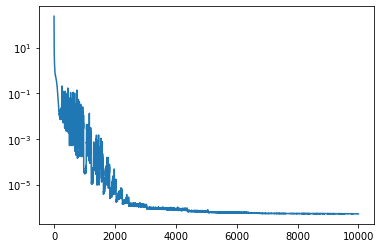

In [14]:
plt.semilogy(H.history['loss'])

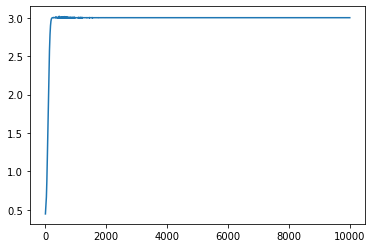

In [16]:
plt.plot(H.history['parameter_OmegaParam2'])

In [18]:
OmegaParam2.eval()

array([2.9999998], dtype=float32)

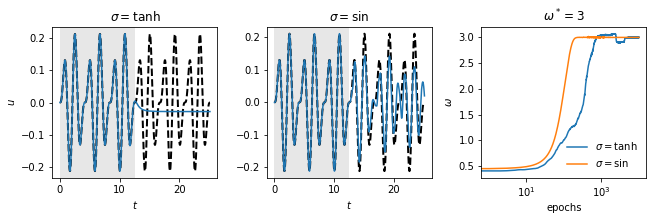

In [35]:
t_test = np.linspace(0, 4*np.pi, 1000)
t_test = np.linspace(0, 8*np.pi, 1000)

fig, ax = plt.subplots(1,3,figsize=(11,3))

# ax[0].axhspan(0, 1, facecolor='0.2', alpha=0.1)
ax[0].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[0].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[0].plot(t_test, u.eval(t_test), label='$\hat{u}: \mathrm{tanh}-4 \\times 20$') 
ax[0].set_title('$\\sigma = \mathrm{tanh}$')

ax[1].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[1].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[1].plot(t_test, U.eval(t_test), label='$\hat{u}: \\mathrm{sin}-4 \\times 20$') 
ax[1].set_title('$\\sigma = \mathrm{sin}$')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$u$')

ax[2].semilogx(h.history['parameter_epochs'], h.history['parameter_OmegaParam'], label='$\\sigma=\mathrm{tanh}$')
ax[2].semilogx(H.history['parameter_epochs'], H.history['parameter_OmegaParam2'], label='$\\sigma=\mathrm{sin}$')
ax[2].set_xlabel('epochs')
ax[2].set_ylabel('$\omega$')
ax[2].legend(loc='lower right', framealpha=0)
ax[2].set_title('$\\omega^* = 3$')

# ax[1].legend()
plt.subplots_adjust(0.1, 0.15, 0.85, 0.85, 0.3, 0.3)
plt.savefig('Forced-Vibration-Inversion.pdf', pdi=300)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(8,3))

# ax[0].plot(, '--k', lw=2, label='$u^*$') 
# ax[0].set_title('$\\sigma = \mathrm{tanh}$')

 
ax[1].plot(t_test, U.eval(t_test), label='$\hat{u}: \\mathrm{sin}-4 \\times 20$') 
ax[1].set_title('$\\sigma = \mathrm{sin}$')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$u$')

# ax[1].legend()
plt.subplots_adjust(0.1, 0.15, 0.85, 0.85, 0.3, 0.3)
plt.savefig('Forced-Vibration-Inversion.pdf', pdi=300)